# Source Finding Test Case – SRCNET v0.1 - using PyBDSF

This notebook serves as a test case for evaluating the source-finding using **PyBDSF** on a real-world radio continuum dataset from the **LoTSS** survey. The goal is to extract and visualise radio sources from a single-frequency 2D mosaic using PyBDSF’s Gaussian decomposition approach.

We use a small-area FITS mosaic from **LoTSS-DR2**, publicly available via the [LOFAR Surveys website](https://lofar-surveys.org/releases.html). The image has a resolution of ~6 arcsec and includes typical survey noise and structure.

---

### In this test we perform:

- FITS header inspection and editing
- Radio source detection:
  - Background estimation
  - RMS noise map creation
  - Island detection and Gaussian fitting
- Extraction of source and Gaussian component parameters (position, flux, shape, ect)
- Overlay of source positions on the original radio image
- Basic output validation through visual inspection by confirming source positions match radio emission regions that must the same as showed on the plot in the confluence page


### Expected outputs:
- Catalogues that contain information about the sources and the Gaussians.
- Each source and Gaussian contain basic information such as
  - RA, Dec
  - Peak and total flux
  - Source size and shape (major, minor axis, position angle)
  
### Outputs for validation: 
- Plot showing detected sources overlapping the radio maps


---


In [233]:
# Imports 

import bdsf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D
from astropy.table import Table
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize, ZScaleInterval, AsinhStretch, SqrtStretch

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [234]:
# Paths 

# Path to the FITS file (inside the container in this case)
fits_path = '/data/P020+39-mosaic-blanked.fits'
# Temporary patched copy (in a bind-mounted writable folder like /workspace)
patched_path = '/workspace/patched_mosaic.fits'

In [235]:
# PyBDSF requires information that needs to be added to the image header 
# Patch frequency info and save new file since it was not possible to to save the patched file in memory 

with fits.open(fits_path) as hdul:
    hdr = hdul[0].header
    print(hdul.info())
    # Inspect the header
    print(hdr)
    # Add minimal frequency axis headers
    hdr['CTYPE3'] = 'FREQ'
    hdr['CUNIT3'] = 'Hz'
    hdr['CRVAL3'] = 1.44e8
    hdr['CDELT3'] = 1.0
    hdr['CRPIX3'] = 1.0

    # Save the updated FITS file
    hdul.writeto(patched_path, overwrite=True)

Filename: /data/P020+39-mosaic-blanked.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   (8350, 8350)   float64   
None
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 8350                                                  NAXIS2  =                 8350                                                  WCSAXES =                    2                                                  CTYPE1  = 'RA---SIN'                                                            CTYPE2  = 'DEC--SIN'                                                            CUNIT1  = 'deg     '                                                            CUNIT2  = 'deg     '                                                            CRPIX1  =            

In [236]:
# Run PyBDSF

# Process the patched file with PyBDSF (this takes a about 5 minutes) 
# Got parameters from https://github.com/mhardcastle/ddf-pipeline/blob/5d11d5ec212da29826433fed44bab329c037855e/scripts/sourcefind.py

restfrq=143650000.0 #144000000.0
 
img = bdsf.process_image(patched_path, thresh_isl=3.0, thresh_pix=5, rms_box=(150,15), rms_map=True, mean_map='zero', ini_method='intensity', adaptive_rms_box=True, adaptive_thresh=150, rms_box_bright=(60,15), group_by_isl=False, group_tol=10.0, output_opts=True, output_all=False, atrous_do=True, atrous_jmax=4, flagging_opts=True, flag_maxsize_fwhm=0.5, advanced_opts=True, blank_limit=None, frequency=restfrq)
#img = bdsf.process_image(patched_path)

# Confirm success without matplotlib
print("Image shape:", img.ch0_arr.shape)
print("Beam:", img.beam)

--> Opened '/workspace/patched_mosaic.fits'
Image size .............................. : (8350, 8350) pixels
Number of channels ...................... : 1
Number of Stokes parameters ............. : 1
Beam shape (major, minor, pos angle) .... : (1.66667e-03, 1.66667e-03, 90) degrees
Frequency of image ...................... : 143.650 MHz
Number of blank pixels .................. : 15384119 (22.1%)
Flux from sum of (non-blank) pixels ..... : 66.468 Jy
--> Calculating background rms and mean images
--> Using adaptive scaling of rms_box
Using user-specified rms_box ............ : (60, 15) pixels (small scale)
Using user-specified rms_box ............ : (150, 15) pixels (large scale)
Number of sources using small scale ..... : 184
--> Using 2D map for background rms
--> Using constant background mean
Min/max values of background rms map .... : (7.47e-05, 9.07e-03) Jy/beam
Value of background mean ................ : 0.0 Jy/beam
--> Expected 5-sigma-clipped false detection rate < fdr_ratio
--

Fitting islands with Gaussians .......... : [|] 0/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


//Fitting islands with Gaussians .......... : [/] 1/4993

stty: 'standard input': Inappropriate ioctl for device


stty: 'standard input': Inappropriate ioctl for device


-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [/] 1/4993\Fitting islands with Gaussians .......... : [-] 2/4993Fitting islands with Gaussians .......... : [-] 2/4993

stty: 'standard input': Inappropriate ioctl for device


/

stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device: Inappropriate ioctl for device



///Fitting islands with Gaussians .......... : [\] 3/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-

stty: 'standard input'stty: : Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: : Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [/] 4/4993Fitting islands with Gaussians .......... : [/] 4/4993Fitting islands with Gaussians .......... : [/] 4/4993Fitting islands with Gaussians .......... : [/] 4/4993//

stty: 'standard input'stty: : Inappropriate ioctl for device'standard input'
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for devicestty: 
'standard input': Inappropriate ioctl for devicestty: 
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


///Fitting islands with Gaussians .......... : [-] 5/4993Fitting islands with Gaussians .......... : [-] 5/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\\\Fitting islands with Gaussians .......... : [/] 8/4993Fitting islands with Gaussians .......... : [/] 8/4993Fitting islands with Gaussians .......... : [/] 8/4993

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 8/4993Fitting islands with Gaussians .......... : [/] 8/4993Fitting islands with Gaussians .......... : [\] 10/4993Fitting islands with Gaussians .......... : [\] 10/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 10/4993/------\\\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 14/4993Fitting islands with Gaussians .......... : [-] 14/4993Fitting islands with Gaussians .......... : [\] 15/4993Fitting islands with Gaussians .......... : [-] 14/4993Fitting islands with Gaussians .......... : [-] 14/4993Fitting islands with Gaussians .......... : [-] 14/4993Fitting islands with Gaussians .......... : [/] 13/4993Fitting islands with Gaussians .......... : [-] 14/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 15/4993Fitting islands with Gaussians .......... : [\] 15/4993////////

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/-Fitting islands with Gaussians .......... : [/] 18/4993Fitting islands with Gaussians .......... : [/] 18/4993Fitting islands with Gaussians .......... : [/] 18/4993Fitting islands with Gaussians .......... : [/] 18/4993Fitting islands with Gaussians .......... : [/] 18/4993-Fitting islands with Gaussians .......... : [/] 18/4993\\

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 18/4993Fitting islands with Gaussians .......... : [/] 18/4993Fitting islands with Gaussians .......... : [/] 18/4993Fitting islands with Gaussians .......... : [-] 19/4993Fitting islands with Gaussians .......... : [-] 19/4993---------Fitting islands with Gaussians .......... : [\] 20/4993Fitting islands with Gaussians .......... : [\] 20/4993-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 25/4993Fitting islands with Gaussians .......... : [-] 25/4993|Fitting islands with Gaussians .......... : [-] 25/4993Fitting islands with Gaussians .......... : [-] 25/4993Fitting islands with Gaussians .......... : [-] 25/4993|Fitting islands with Gaussians .......... : [-] 25/4993Fitting islands with Gaussians .......... : [-] 25/4993Fitting islands with Gaussians .......... : [-] 25/4993

stty: 'standard input': Inappropriate ioctl for device


||Fitting islands with Gaussians .......... : [-] 25/4993Fitting islands with Gaussians .......... : [-] 25/4993Fitting islands with Gaussians .......... : [|] 28/4993Fitting islands with Gaussians .......... : [|] 28/4993|||/////////Fitting islands with Gaussians .......... : [|] 28/4993Fitting islands with Gaussians .......... : [|] 28/4993-Fitting islands with Gaussians .......... : [|] 30/4993|||Fitting islands with Gaussians .......... : [/] 34/4993Fitting islands with Gaussians .......... : [/] 34/4993Fitting islands with Gaussians .......... : [/] 34/4993Fitting islands with Gaussians .......... : [|] 33/4993Fitting islands with Gaussians .......... : [/] 34/4993Fitting islands with Gaussians .......... : [|] 33/4993Fitting islands with Gaussians .......... : [/] 34/4993Fitting islands with Gaussians .......... : [/] 34/4993Fitting islands with Gaussians .......... : [/] 34/4993Fitting islands with Gaussians .......... : [/] 34/4993Fitting islands with Gaussians .......... : [/]

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 51/4993/Fitting islands with Gaussians .......... : [\] 52/4993Fitting islands with Gaussians .......... : [\] 52/4993Fitting islands with Gaussians .......... : [\] 51/4993Fitting islands with Gaussians .......... : [\] 52/4993Fitting islands with Gaussians .......... : [\] 51/4993Fitting islands with Gaussians .......... : [\] 52/4993

stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [|] 53/4993-Fitting islands with Gaussians .......... : [\] 53/4993Fitting islands with Gaussians .......... : [/] 53/4993Fitting islands with Gaussians .......... : [/] 53/4993Fitting islands with Gaussians .......... : [/] 53/4993Fitting islands with Gaussians .......... : [/] 53/4993|Fitting islands with Gaussians .......... : [-] 54/4993Fitting islands with Gaussians .......... : [-] 54/4993|\///-//////Fitting islands with Gaussians .......... : [|] 55/4993/Fitting islands with Gaussians .......... : [|] 58/4993Fitting islands with Gaussians .......... : [\] 58/4993Fitting islands with Gaussians .......... : [/] 61/4993Fitting islands with Gaussians .......... : [/] 61/4993\\Fitting islands with Gaussians .......... : [-] 61/4993Fitting islands with Gaussians .......... : [/] 61/4993Fitting islands with Gaussians .......... : [/] 61/4993Fitting islands with Gaussians .......... : [/] 61/4993\Fitting islands with Gaussians .......... : [/

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [|] 53/4993Fitting islands with Gaussians .......... : [-] 73/4993Fitting islands with Gaussians .......... : [/] 72/4993\-|\|-Fitting islands with Gaussians .......... : [/] 72/4993Fitting islands with Gaussians .......... : [-] 73/4993--Fitting islands with Gaussians .......... : [\] 74/4993-Fitting islands with Gaussians .......... : [\] 78/4993Fitting islands with Gaussians .......... : [-] 73/4993Fitting islands with Gaussians .......... : [|] 79/4993Fitting islands with Gaussians .......... : [\] 79/4993Fitting islands with Gaussians .......... : [|] 80/4993Fitting islands with Gaussians .......... : [-] 81/4993|Fitting islands with Gaussians .......... : [-] 81/4993Fitting islands with Gaussians .......... : [-] 81/4993Fitting islands with Gaussians .......... : [-] 81/4993|-|////Fitting islands with Gaussians .......... : [|] 85/4993Fitting islands with Gaussians .......... : [|] 85/4993Fitting islands with Gaussians .......... : [|] 

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|Fitting islands with Gaussians .......... : [\] 104/4993//-\Fitting islands with Gaussians .......... : [/] 106/4993-Fitting islands with Gaussians .......... : [/] 106/4993\Fitting islands with Gaussians .......... : [|] 106/4993///Fitting islands with Gaussians .......... : [\] 108/4993Fitting islands with Gaussians .......... : [\] 108/4993/Fitting islands with Gaussians .......... : [/] 111/4993Fitting islands with Gaussians .......... : [/] 111/4993\Fitting islands with Gaussians .......... : [/] 111/4993\Fitting islands with Gaussians .......... : [\] 104/4993\\Fitting islands with Gaussians .......... : [/] 111/4993Fitting islands with Gaussians .......... : [\] 113/4993Fitting islands with Gaussians .......... : [\] 113/4993|/Fitting islands with Gaussians .......... : [-] 107/4993/Fitting islands with Gaussians .......... : [\] 113/4993Fitting islands with Gaussians .......... : [-] 107/4993--Fitting islands with Gaussians .......... : [|] 105/4993Fitting islands with Gaussia

stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

/-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 126/4993Fitting islands with Gaussians .......... : [-] 119/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 126/4993Fitting islands with Gaussians .......... : [\] 125/4993Fitting islands with Gaussians .......... : [|] 127/4993Fitting islands with Gaussians .......... : [|] 126/4993Fitting islands with Gaussians .......... : [|] 126/4993Fitting islands with Gaussians .......... : [-] 119/4993Fitting islands with Gaussians .......... : [-] 119/4993\Fitting islands with Gaussians .......... : [/] 127/4993\-/Fitting islands with Gaussians .......... : [\] 129/4993//Fitting islands with Gaussians .......... : [\] 130/4993-/-Fitting islands with Gaussians .......... : [|] 126/4993Fitting islands with Gaussians .......... : [/] 133/4993Fitting islands with Gaussians .......... : [/] 133/4993\Fitting islands with Gaussians .......... : [-] 133/4993Fitting islands with Gaussians .......... : [-] 133/4993Fitting islands with Gaussians .......... : [-] 134/4993Fitting islands with Gaussians .......... : [/] 133/4993//\Fitting islands with Gaussians ....

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: : Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

\Fitting islands with Gaussians .......... : [/] 137/4993Fitting islands with Gaussians .......... : [/] 133/4993//Fitting islands with Gaussians .......... : [-] 146/4993Fitting islands with Gaussians .......... : [-] 146/4993/-//Fitting islands with Gaussians .......... : [/] 149/4993-Fitting islands with Gaussians .......... : [/] 149/4993Fitting islands with Gaussians .......... : [\] 147/4993Fitting islands with Gaussians .......... : [-] 150/4993|///Fitting islands with Gaussians .......... : [/] 151/4993Fitting islands with Gaussians .......... : [/] 151/4993/\\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'

/Fitting islands with Gaussians .......... : [-] 152/4993Fitting islands with Gaussians .......... : [|] 154/4993Fitting islands with Gaussians .......... : [\] 157/4993Fitting islands with Gaussians .......... : [/] 155/4993Fitting islands with Gaussians .......... : [\] 157/4993-Fitting islands with Gaussians .......... : [/] 155/4993/Fitting islands with Gaussians .......... : [/] 155/4993Fitting islands with Gaussians .......... : [/] 155/4993--Fitting islands with Gaussians .......... : [/] 155/4993-\Fitting islands with Gaussians .......... : [-] 160/4993|Fitting islands with Gaussians .......... : [-] 163/4993Fitting islands with Gaussians .......... : [-] 164/4993Fitting islands with Gaussians .......... : [-] 160/4993-Fitting islands with Gaussians .......... : [\] 165/4993|Fitting islands with Gaussians .......... : [/] 163/4993/|---Fitting islands with Gaussians .......... : [-] 168/4993Fitting islands with Gaussians .......... : [|] 170/4993Fitting islands with Gaussians ..

: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inapprop

Fitting islands with Gaussians .......... : [|] 174/4993-Fitting islands with Gaussians .......... : [/] 175/4993Fitting islands with Gaussians .......... : [|] 170/4993Fitting islands with Gaussians .......... : [-] 176/4993\Fitting islands with Gaussians .......... : [-] 176/4993/---Fitting islands with Gaussians .......... : [-] 176/4993Fitting islands with Gaussians .......... : [\] 181/4993Fitting islands with Gaussians .......... : [-] 184/4993-Fitting islands with Gaussians .......... : [/] 179/4993Fitting islands with Gaussians .......... : [-] 184/4993Fitting islands with Gaussians .......... : [-] 184/4993||Fitting islands with Gaussians .......... : [/] 183/4993/-Fitting islands with Gaussians .......... : [-] 184/4993//Fitting islands with Gaussians .......... : [|] 187/4993Fitting islands with Gaussians .......... : [/] 187/4993|||Fitting islands with Gaussians .......... : [/] 191/4993Fitting islands with Gaussians .......... : [/] 191/4993//Fitting islands with Gaussians

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

/\-\\Fitting islands with Gaussians .......... : [|] 210/4993\Fitting islands with Gaussians .......... : [-] 200/4993\Fitting islands with Gaussians .......... : [|] 210/4993Fitting islands with Gaussians .......... : [\] 214/4993Fitting islands with Gaussians .......... : [|] 210/4993||Fitting islands with Gaussians .......... : [\] 214/4993Fitting islands with Gaussians .......... : [/] 212/4993Fitting islands with Gaussians .......... : [\] 214/4993-Fitting islands with Gaussians .......... : [|] 215/4993Fitting islands with Gaussians .......... : [/] 207/4993Fitting islands with Gaussians .......... : [\] 214/4993||Fitting islands with Gaussians .......... : [\] 214/4993/|Fitting islands with Gaussians .......... : [-] 212/4993\Fitting islands with Gaussians .......... : [|] 215/4993\Fitting islands with Gaussians .......... : [-] 217/4993Fitting islands with Gaussians .......... : [|] 220/4993|||Fitting islands with Gaussians .......... : [\] 223/4993/-Fitting islands with Gaussi

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: : Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'sta

-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 236/4993Fitting islands with Gaussians .......... : [/] 237/4993|Fitting islands with Gaussians .......... : [/] 221/4993Fitting islands with Gaussians .......... : [|] 236/4993-----

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 229/4993-Fitting islands with Gaussians .......... : [-] 230/4993Fitting islands with Gaussians .......... : [-] 238/4993Fitting islands with Gaussians .......... : [-] 242/4993Fitting islands with Gaussians .......... : [-] 242/4993|Fitting islands with Gaussians .......... : [-] 242/4993||||/Fitting islands with Gaussians .......... : [-] 242/4993-Fitting islands with Gaussians .......... : [|] 240/4993Fitting islands with Gaussians .......... : [|] 248/4993|Fitting islands with Gaussians .......... : [/] 249/4993Fitting islands with Gaussians .......... : [-] 242/4993|Fitting islands with Gaussians .......... : [-] 242/4993Fitting islands with Gaussians .......... : [-] 250/4993/-Fitting islands with Gaussians .......... : [|] 248/4993-|Fitting islands with Gaussians .......... : [|] 252/4993Fitting islands with Gaussians .......... : [|] 248/4993||Fitting islands with Gaussians .......... : [|] 248/4993/-Fitting islands with Gaussians

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|||||/////Fitting islands with Gaussians .......... : [|] 267/4993Fitting islands with Gaussians .......... : [|] 268/4993Fitting islands with Gaussians .......... : [|] 268/4993Fitting islands with Gaussians .......... : [|] 266/4993Fitting islands with Gaussians .......... : [|] 268/4993//Fitting islands with Gaussians .......... : [/] 268/4993Fitting islands with Gaussians .......... : [/] 268/4993Fitting islands with Gaussians .......... : [|] 268/4993Fitting islands with Gaussians .......... : [|] 268/4993Fitting islands with Gaussians .......... : [/] 268/4993Fitting islands with Gaussians .......... : [/] 268/4993Fitting islands with Gaussians .......... : [/] 268/4993Fitting islands with Gaussians .......... : [/] 268/4993Fitting islands with Gaussians .......... : [/] 268/4993|/\//////

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [\] 271/4993Fitting islands with Gaussians .......... : [/] 277/4993/Fitting islands with Gaussians .......... : [/] 277/4993Fitting islands with Gaussians .......... : [/] 277/4993/Fitting islands with Gaussians .......... : [/] 277/4993Fitting islands with Gaussians .......... : [/] 277/4993Fitting islands with Gaussians .......... : [/] 277/4993\|Fitting islands with Gaussians .......... : [/] 277/4993/Fitting islands with Gaussians .......... : [/] 277/4993//Fitting islands with Gaussians .......... : [|] 281/4993\\Fitting islands with Gaussians .......... : [|] 271/4993Fitting islands with Gaussians .......... : [/] 281/4993\Fitting islands with Gaussians .......... : [\] 280/4993|Fitting islands with Gaussians .......... : [/] 281/4993Fitting islands with Gaussians .......... : [/] 281/4993Fitting islands with Gaussians .......... : [/] 277/4993Fitting islands with Gaussians .......... : [\] 283/4993/Fitting islands with Gaussians .....

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [\] 300/4993\Fitting islands with Gaussians .......... : [\] 300/4993Fitting islands with Gaussians .......... : [/] 294/4993/Fitting islands with Gaussians .......... : [/] 302/4993Fitting islands with Gaussians .......... : [-] 305/4993Fitting islands with Gaussians .......... : [-] 304/4993-\Fitting islands with Gaussians .......... : [\] 305/4993|/Fitting islands with Gaussians .......... : [/] 302/4993//Fitting islands with Gaussians .......... : [-] 308/4993Fitting islands with Gaussians .......... : [\] 309/4993Fitting islands with Gaussians .......... : [|] 311/4993-Fitting islands with Gaussians .......... : [/] 294/4993\Fitting islands with Gaussians .......... : [/] 311/4993-Fitting islands with Gaussians .......... : [/] 311/4993Fitting islands with Gaussians .......... : [-] 312/4993||Fitting islands with Gaussians .......... : [/] 311/4993Fitting islands with Gaussians .......... : [\] 313/4993|Fitting islands with Gaussians ...

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device'standard input'
: Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [/] 325/4993Fitting islands with Gaussians .......... : [/] 325/4993Fitting islands with Gaussians .......... : [|] 328/4993Fitting islands with Gaussians .......... : [-] 326/4993Fitting islands with Gaussians .......... : [|] 328/4993//Fitting islands with Gaussians .......... : [/] 325/4993/-Fitting islands with Gaussians .......... : [/] 333/4993Fitting islands with Gaussians .......... : [/] 333/4993Fitting islands with Gaussians .......... : [/] 333/4993/|-\\Fitting islands with Gaussians .......... : [|] 328/4993Fitting islands with Gaussians .......... : [-] 324/4993Fitting islands with Gaussians .......... : [/] 333/4993/Fitting islands with Gaussians .......... : [-] 334/4993Fitting islands with Gaussians .......... : [|] 328/4993/Fitting islands with Gaussians .......... : [-] 334/4993/Fitting islands with Gaussians .......... : [\] 335/4993Fitting islands with Gaussians .......... : [\] 335/4993Fitting islands with Gaussians .....

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [/] 345/4993/Fitting islands with Gaussians .......... : [/] 345/4993/Fitting islands with Gaussians .......... : [|] 349/4993Fitting islands with Gaussians .......... : [|] 349/4993Fitting islands with Gaussians .......... : [|] 349/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 349/4993Fitting islands with Gaussians .......... : [-] 355/4993Fitting islands with Gaussians .......... : [/] 350/4993\\\\---Fitting islands with Gaussians .......... : [\] 356/4993Fitting islands with Gaussians .......... : [\] 356/4993-Fitting islands with Gaussians .......... : [\] 356/4993/Fitting islands with Gaussians .......... : [\] 356/4993Fitting islands with Gaussians .......... : [-] 359/4993Fitting islands with Gaussians .......... : [-] 359/4993Fitting islands with Gaussians .......... : [-] 359/4993|/Fitting islands with Gaussians .......... : [-] 359/4993---Fitting islands with Gaussians .......... : [|] 361/4993Fitting islands with Gaussians .......... : [/] 364/4993||Fitting islands with Gaussians .......... : [/] 350/4993Fitting islands with Gaussians .......... : [-] 364/4993/Fitting islands with Gaussians .......... : [-] 364/4993Fitting islands with Gaussians .......... : [|] 366/4993Fitting islands with Gaussians 

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [|] 370/4993|Fitting islands with Gaussians .......... : [/] 375/4993Fitting islands with Gaussians .......... : [/] 375/4993|Fitting islands with Gaussians .......... : [|] 378/4993Fitting islands with Gaussians .......... : [/] 350/4993-\|Fitting islands with Gaussians .......... : [-] 364/4993/Fitting islands with Gaussians .......... : [\] 381/4993-Fitting islands with Gaussians .......... : [-] 380/4993Fitting islands with Gaussians .......... : [/] 373/4993Fitting islands with Gaussians .......... : [/] 375/4993Fitting islands with Gaussians .......... : [|] 375/4993\|-|Fitting islands with Gaussians .......... : [/] 383/4993-Fitting islands with Gaussians .......... : [|] 386/4993\\Fitting islands with Gaussians .......... : [\] 385/4993Fitting islands with Gaussians .......... : [-] 384/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [-] 384/4993/-Fitting islands with Gaussians .......... : [-] 388/4993Fitting islands with Gaussians .......... : [|] 386/4993-Fitting islands with Gaussians .......... : [|] 378/4993||Fitting islands with Gaussians .......... : [/] 391/4993-Fitting islands with Gaussians .......... : [|] 383/4993|Fitting islands with Gaussians .......... : [/] 391/4993|Fitting islands with Gaussians .......... : [-] 392/4993-\\Fitting islands with Gaussians .......... : [-] 396/4993Fitting islands with Gaussians .......... : [\] 389/4993Fitting islands with Gaussians .......... : [\] 389/4993Fitting islands with Gaussians .......... : [|] 398/4993|//Fitting islands with Gaussians .......... : [|] 398/4993Fitting islands with Gaussians .......... : [|] 394/4993-Fitting islands with Gaussians .......... : [-] 400/4993Fitting islands with Gaussians .......... : [-] 392/4993Fitting islands with Gaussians .......... : [\] 401/4993\Fitting islands with Gaussians 

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 417/4993Fitting islands with Gaussians .......... : [-] 416/4993-Fitting islands with Gaussians .......... : [\] 417/4993Fitting islands with Gaussians .......... : [/] 415/4993||Fitting islands with Gaussians .......... : [-] 411/4993Fitting islands with Gaussians .......... : [-] 411/4993//|Fitting islands with Gaussians .......... : [-] 420/4993Fitting islands with Gaussians .......... : [|] 422/4993Fitting islands with Gaussians .......... : [|] 422/4993Fitting islands with Gaussians .......... : [|] 422/4993Fitting islands with Gaussians .......... : [/] 423/4993Fitting islands with Gaussians .......... : [/] 423/4993/|/||--\\\Fitting islands with Gaussians .......... : [|] 425/4993Fitting islands with Gaussians .......... : [|] 425/4993Fitting islands with Gaussians .......... : [|] 427/4993Fitting islands with Gaussians .......... : [-] 428/4993Fitting islands with Gaussians .......... : [\] 429/4993Fitting islands with Gaussians .

stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for devicestty: 'standard input': Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input'stty: : Inappropriate ioctl for device'standard input'
: Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'sta

--Fitting islands with Gaussians .......... : [|] 431/4993Fitting islands with Gaussians .......... : [\] 435/4993Fitting islands with Gaussians .......... : [|] 439/4993-Fitting islands with Gaussians .......... : [-] 441/4993-Fitting islands with Gaussians .......... : [-] 441/4993Fitting islands with Gaussians .......... : [-] 441/4993||-Fitting islands with Gaussians .......... : [-] 441/4993||/Fitting islands with Gaussians .......... : [|] 443/4993/Fitting islands with Gaussians .......... : [|] 439/4993-Fitting islands with Gaussians .......... : [|] 447/4993Fitting islands with Gaussians .......... : [|] 439/4993Fitting islands with Gaussians .......... : [/] 448/4993Fitting islands with Gaussians .......... : [-] 445/4993Fitting islands with Gaussians .......... : [|] 447/4993\Fitting islands with Gaussians .......... : [-] 449/4993||Fitting islands with Gaussians .......... : [\] 454/4993|Fitting islands with Gaussians .......... : [|] 455/4993\\\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 455/4993|\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 458/4993Fitting islands with Gaussians .......... : [|] 443/4993Fitting islands with Gaussians .......... : [/] 448/4993/\|Fitting islands with Gaussians .......... : [\] 458/4993Fitting islands with Gaussians .......... : [\] 454/4993|Fitting islands with Gaussians .......... : [\] 462/4993/Fitting islands with Gaussians .......... : [/] 460/4993/Fitting islands with Gaussians .......... : [|] 463/4993Fitting islands with Gaussians .......... : [|] 459/4993Fitting islands with Gaussians .......... : [|] 463/4993-||Fitting islands with Gaussians .......... : [|] 455/4993Fitting islands with Gaussians .......... : [/] 464/4993|//Fitting islands with Gaussians .......... : [|] 467/4993Fitting islands with Gaussians .......... : [-] 465/4993Fitting islands with Gaussians .......... : [|] 467/4993Fitting islands with Gaussians .......... : [/] 468/4993||/\Fitting islands with Gaussians .......... : [/] 468/4993|\Fitting islands with Gaussians

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|Fitting islands with Gaussians .......... : [|] 478/4993|-\Fitting islands with Gaussians .......... : [|] 478/4993|Fitting islands with Gaussians .......... : [-] 480/4993Fitting islands with Gaussians .......... : [|] 482/4993/Fitting islands with Gaussians .......... : [-] 483/4993Fitting islands with Gaussians .......... : [|] 482/4993/Fitting islands with Gaussians .......... : [|] 478/4993Fitting islands with Gaussians .......... : [/] 479/4993|Fitting islands with Gaussians .......... : [/] 486/4993\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/|Fitting islands with Gaussians .......... : [|] 489/4993|Fitting islands with Gaussians .......... : [/] 486/4993Fitting islands with Gaussians .......... : [\] 484/4993Fitting islands with Gaussians .......... : [|] 485/4993Fitting islands with Gaussians .......... : [\] 492/4993-/Fitting islands with Gaussians .......... : [/] 490/4993-Fitting islands with Gaussians .......... : [|] 489/4993|//Fitting islands with Gaussians .......... : [|] 497/4993-Fitting islands with Gaussians .......... : [|] 493/4993Fitting islands with Gaussians .......... : [/] 498/4993Fitting islands with Gaussians .......... : [/] 494/4993Fitting islands with Gaussians .......... : [-] 495/4993Fitting islands with Gaussians .......... : [-] 499/4993Fitting islands with Gaussians .......... : [-] 495/4993\/---Fitting islands with Gaussians .......... : [/] 498/4993\\Fitting islands with Gaussians .......... : [\] 500/4993||Fitting islands with Gaussians .......... : [/] 502/4993Fitting islands with Gaussian

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|-Fitting islands with Gaussians .......... : [\] 517/4993Fitting islands with Gaussians .......... : [|] 514/4993Fitting islands with Gaussians .......... : [-] 516/4993Fitting islands with Gaussians .......... : [|] 519/4993Fitting islands with Gaussians .......... : [/] 515/4993-\\\|Fitting islands with Gaussians .......... : [/] 515/4993|/Fitting islands with Gaussians .......... : [|] 526/4993Fitting islands with Gaussians .......... : [\] 525/4993Fitting islands with Gaussians .......... : [\] 513/4993Fitting islands with Gaussians .......... : [-] 524/4993Fitting islands with Gaussians .......... : [\] 525/4993|/Fitting islands with Gaussians .......... : [-] 520/4993-Fitting islands with Gaussians .......... : [|] 526/4993Fitting islands with Gaussians .......... : [|] 530/4993|//Fitting islands with Gaussians .......... : [/] 527/4993/Fitting islands with Gaussians .......... : [|] 533/4993Fitting islands with Gaussians .......... : [\] 525/4993Fitting islands with Gaussians .

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|///Fitting islands with Gaussians .......... : [-] 531/4993Fitting islands with Gaussians .......... : [|] 538/4993-Fitting islands with Gaussians .......... : [\] 536/4993Fitting islands with Gaussians .......... : [\] 532/4993/Fitting islands with Gaussians .......... : [/] 540/4993-/-Fitting islands with Gaussians .......... : [-] 540/4993--Fitting islands with Gaussians .......... : [/] 539/4993Fitting islands with Gaussians .......... : [-] 544/4993Fitting islands with Gaussians .......... : [-] 544/4993Fitting islands with Gaussians .......... : [-] 544/4993Fitting islands with Gaussians .......... : [/] 544/4993Fitting islands with Gaussians .......... : [/] 539/4993||Fitting islands with Gaussians .......... : [-] 544/4993Fitting islands with Gaussians .......... : [/] 543/4993-\||-Fitting islands with Gaussians .......... : [|] 546/4993--\Fitting islands with Gaussians .......... : [\] 549/4993Fitting islands with Gaussians .......... : [|] 551/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'sta

|Fitting islands with Gaussians .......... : [|] 551/4993Fitting islands with Gaussians .......... : [|] 546/4993Fitting islands with Gaussians .......... : [-] 551/4993Fitting islands with Gaussians .......... : [-] 551/4993Fitting islands with Gaussians .......... : [-] 548/4993Fitting islands with Gaussians .......... : [\] 552/4993-Fitting islands with Gaussians .......... : [|] 553/4993/|Fitting islands with Gaussians .......... : [-] 551/4993-\||

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 556/4993|Fitting islands with Gaussians .......... : [\] 561/4993-\Fitting islands with Gaussians .......... : [|] 551/4993Fitting islands with Gaussians .......... : [/] 559/4993||Fitting islands with Gaussians .......... : [|] 562/4993Fitting islands with Gaussians .......... : [-] 564/4993Fitting islands with Gaussians .......... : [|] 562/4993Fitting islands with Gaussians .......... : [|] 563/4993Fitting islands with Gaussians .......... : [\] 564/4993Fitting islands with Gaussians .......... : [|] 565/4993|//||Fitting islands with Gaussians .......... : [|] 569/4993Fitting islands with Gaussians .......... : [/] 570/4993Fitting islands with Gaussians .......... : [-] 560/4993Fitting islands with Gaussians .......... : [|] 572/4993/Fitting islands with Gaussians .......... : [|] 572/4993/-\||Fitting islands with Gaussians .......... : [/] 570/4993Fitting islands with Gaussians .......... : [/] 574/4993Fitting islands with Gaussians .

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|Fitting islands with Gaussians .......... : [\] 582/4993Fitting islands with Gaussians .......... : [/] 584/4993Fitting islands with Gaussians .......... : [\] 582/4993Fitting islands with Gaussians .......... : [|] 583/4993Fitting islands with Gaussians .......... : [/] 584/4993|||/Fitting islands with Gaussians .......... : [|] 588/4993/Fitting islands with Gaussians .......... : [|] 584/4993\Fitting islands with Gaussians .......... : [|] 591/4993Fitting islands with Gaussians .......... : [|] 591/4993Fitting islands with Gaussians .......... : [|] 591/4993///Fitting islands with Gaussians .......... : [\] 590/4993//Fitting islands with Gaussians .......... : [/] 596/4993Fitting islands with Gaussians .......... : [/] 596/4993Fitting islands with Gaussians .......... : [/] 596/4993Fitting islands with Gaussians .......... : [/] 592/4993Fitting islands with Gaussians .......... : [/] 596/4993Fitting islands with Gaussians .......... : [/] 596/4993-///Fitting islands with Gaussians .

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


||Fitting islands with Gaussians .......... : [/] 600/4993|Fitting islands with Gaussians .......... : [/] 600/4993Fitting islands with Gaussians .......... : [/] 600/4993/Fitting islands with Gaussians .......... : [\] 602/4993Fitting islands with Gaussians .......... : [\] 602/4993\\\Fitting islands with Gaussians .......... : [|] 603/4993

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Fitting islands with Gaussians .......... : [\] 1658/4993//Fitting islands with Gaussians .......... : [|] 1655/4993/-|-Fitting islands with Gaussians .......... : [/] 1660/4993|Fitting islands with Gaussians .......... : [/] 1660/4993Fitting islands with Gaussians .......... : [-] 1661/4993--Fitting islands with Gaussians .......... : [|] 1663/4993Fitting islands with Gaussians .......... : [|] 1663/4993\Fitting islands with Gaussians .......... : [-] 1661/4993Fitting islands with Gaussians .......... : [-] 1657/4993/

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 1665/4993-Fitting islands with Gaussians .......... : [-] 1665/4993-Fitting islands with Gaussians .......... : [\] 1666/4993-Fitting islands with Gaussians .......... : [/] 1660/4993|Fitting islands with Gaussians .......... : [/] 1668/4993Fitting islands with Gaussians .......... : [-] 1669/4993/Fitting islands with Gaussians .......... : [-] 1669/4993Fitting islands with Gaussians .......... : [|] 1671/4993\|Fitting islands with Gaussians .......... : [-] 1669/4993//Fitting islands with Gaussians .......... : [\] 1674/4993||Fitting islands with Gaussians .......... : [|] 1676/4993Fitting islands with Gaussians .......... : [/] 1672/4993/|/Fitting islands with Gaussians .......... : [/] 1676/4993Fitting islands with Gaussians .......... : [/] 1676/4993Fitting islands with Gaussians .......... : [|] 1679/4993Fitting islands with Gaussians .......... : [|] 1679/4993\Fitting islands with Gaussians .......... : [/] 1680/4993Fitting islands 

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

-\\\\\\Fitting islands with Gaussians .......... : [\] 1697/4993Fitting islands with Gaussians .......... : [\] 1697/4993Fitting islands with Gaussians .......... : [\] 1697/4993Fitting islands with Gaussians .......... : [-] 1696/4993Fitting islands with Gaussians .......... : [\] 1681/4993Fitting islands with Gaussians .......... : [\] 1697/4993Fitting islands with Gaussians .......... : [\] 1697/4993\-\//Fitting islands with Gaussians .......... : [-] 1700/4993Fitting islands with Gaussians .......... : [\] 1701/4993Fitting islands with Gaussians .......... : [/] 1703/4993--Fitting islands with Gaussians .......... : [\] 1697/4993Fitting islands with Gaussians .......... : [/] 1703/4993Fitting islands with Gaussians .......... : [\] 1701/4993\\\Fitting islands with Gaussians .......... : [\] 1709/4993Fitting islands with Gaussians .......... : [\] 1705/4993\Fitting islands with Gaussians .......... : [-] 1704/4993---Fitting islands with Gaussians .......... : [\] 1709/4993Fitting is

stty: stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [\] 1717/4993|//Fitting islands with Gaussians .......... : [/] 1719/4993Fitting islands with Gaussians .......... : [/] 1719/4993Fitting islands with Gaussians .......... : [|] 1718/4993\|/Fitting islands with Gaussians .......... : [-] 1700/4993//Fitting islands with Gaussians .......... : [\] 1721/4993Fitting islands with Gaussians .......... : [/] 1723/4993-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Fitting islands with Gaussians .......... : [/] 1723/4993Fitting islands with Gaussians .......... : [|] 1722/4993|-Fitting islands with Gaussians .......... : [\] 1725/4993Fitting islands with Gaussians .......... : [-] 1724/4993/Fitting islands with Gaussians .......... : [-] 1728/4993//-Fitting islands with Gaussians .......... : [/] 1723/4993Fitting islands with Gaussians .......... : [|] 1726/4993Fitting islands with Gaussians .......... : [/] 1730/4993-Fitting islands with Gaussians .......... : [-] 1731/4993//Fitting islands with Gaussians .......... : [/] 1730/4993-Fitting islands with Gaussians .......... : [/] 1734/4993Fitting islands with Gaussians .......... : [-] 1731/4993\Fitting islands with Gaussians .......... : [/] 1730/4993--Fitting islands with Gaussians .......... : [\] 1736/4993-Fitting islands with Gaussians .......... : [-] 1735/4993Fitting islands with Gaussians .......... : [-] 1738/4993

stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\|Fitting islands with Gaussians .......... : [\] 1740/4993Fitting islands with Gaussians .......... : [-] 1739/4993Fitting islands with Gaussians .......... : [|] 1741/4993-||Fitting islands with Gaussians .......... : [-] 1739/4993Fitting islands with Gaussians .......... : [-] 1743/4993Fitting islands with Gaussians .......... : [/] 1734/4993/Fitting islands with Gaussians .......... : [|] 1745/4993/Fitting islands with Gaussians .......... : [|] 1745/4993-Fitting islands with Gaussians .......... : [/] 1746/4993--Fitting islands with Gaussians .......... : [/] 1746/4993/--Fitting islands with Gaussians .......... : [-] 1747/4993Fitting islands with Gaussians .......... : [-] 1747/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 1750/4993Fitting islands with Gaussians .......... : [-] 1751/4993Fitting islands with Gaussians .......... : [-] 1747/4993Fitting islands with Gaussians .......... : [-] 1751/4993/-|Fitting islands with Gaussians .......... : [/] 1754/4993/|-Fitting islands with Gaussians .......... : [/] 1758/4993Fitting islands with Gaussians .......... : [|] 1757/4993Fitting islands with Gaussians .......... : [-] 1759/4993Fitting islands with Gaussians .......... : [-] 1755/4993\/--Fitting islands with Gaussians .......... : [|] 1757/4993Fitting islands with Gaussians .......... : [\] 1760/4993Fitting islands with Gaussians .......... : [-] 1763/4993-|Fitting islands with Gaussians .......... : [/] 1762/4993Fitting islands with Gaussians .......... : [-] 1763/4993|-\Fitting islands with Gaussians .......... : [|] 1765/4993\Fitting islands with Gaussians .......... : [|] 1765/4993-

stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [-] 1763/4993/-Fitting islands with Gaussians .......... : [|] 1769/4993Fitting islands with Gaussians .......... : [/] 1770/4993||Fitting islands with Gaussians .......... : [\] 1768/4993Fitting islands with Gaussians .......... : [-] 1771/4993Fitting islands with Gaussians .......... : [|] 1773/4993Fitting islands with Gaussians .......... : [-] 1767/4993Fitting islands with Gaussians .......... : [|] 1773/4993-\Fitting islands with Gaussians .......... : [\] 1768/4993|Fitting islands with Gaussians .......... : [-] 1775/4993Fitting islands with Gaussians .......... : [\] 1777/4993\Fitting islands with Gaussians .......... : [-] 1767/4993\\/Fitting islands with Gaussians .......... : [\] 1779/4993/Fitting islands with Gaussians .......... : [|] 1777/4993-Fitting islands with Gaussians .......... : [/] 1782/4993|Fitting islands with Gaussians .......... : [/] 1782/4993Fitting islands with Gaussians .......... : [-] 1783/4993Fitting islands 

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|\/Fitting islands with Gaussians .......... : [|] 1789/4993Fitting islands with Gaussians .......... : [|] 1789/4993\Fitting islands with Gaussians .......... : [\] 1788/4993Fitting islands with Gaussians .......... : [\] 1788/4993/

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 1794/4993Fitting islands with Gaussians .......... : [/] 1790/4993\\Fitting islands with Gaussians .......... : [\] 1792/4993Fitting islands with Gaussians .......... : [\] 1796/4993\///Fitting islands with Gaussians .......... : [\] 1796/4993Fitting islands with Gaussians .......... : [/] 1798/4993Fitting islands with Gaussians .......... : [/] 1798/4993|Fitting islands with Gaussians .......... : [\] 1796/4993Fitting islands with Gaussians .......... : [|] 1801/4993

stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for devicestty: 'standard input': Inappropriate ioctl for device



Fitting islands with Gaussians .......... : [/] 1798/4993/\Fitting islands with Gaussians .......... : [/] 1802/4993\|Fitting islands with Gaussians .......... : [\] 1804/4993Fitting islands with Gaussians .......... : [\] 1804/4993/Fitting islands with Gaussians .......... : [|] 1801/4993-\\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 1808/4993\Fitting islands with Gaussians .......... : [/] 1806/4993Fitting islands with Gaussians .......... : [\] 1808/4993Fitting islands with Gaussians .......... : [\] 1808/4993Fitting islands with Gaussians .......... : [-] 1807/4993/-|||Fitting islands with Gaussians .......... : [/] 1810/4993/Fitting islands with Gaussians .......... : [|] 1813/4993Fitting islands with Gaussians .......... : [|] 1813/4993Fitting islands with Gaussians .......... : [|] 1813/4993\\Fitting islands with Gaussians .......... : [\] 1816/4993Fitting islands with Gaussians .......... : [-] 1811/4993Fitting islands with Gaussians .......... : [/] 1814/4993Fitting islands with Gaussians .......... : [\] 1816/4993\\|\\|Fitting islands with Gaussians .......... : [|] 1817/4993Fitting islands with Gaussians .......... : [\] 1820/4993/Fitting islands with Gaussians .......... : [\] 1820/4993---

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for devicestty: 'standard input': Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 1820/4993Fitting islands with Gaussians .......... : [/] 1822/4993\Fitting islands with Gaussians .......... : [\] 1820/4993Fitting islands with Gaussians .......... : [-] 1823/4993Fitting islands with Gaussians .......... : [-] 1823/4993Fitting islands with Gaussians .......... : [-] 1823/4993|Fitting islands with Gaussians .......... : [|] 1821/4993|/Fitting islands with Gaussians .......... : [|] 1829/4993||Fitting islands with Gaussians .......... : [\] 1824/4993/Fitting islands with Gaussians .......... : [|] 1825/4993\Fitting islands with Gaussians .......... : [/] 1830/4993\Fitting islands with Gaussians .......... : [|] 1829/4993Fitting islands with Gaussians .......... : [\] 1832/4993/-\/Fitting islands with Gaussians .......... : [-] 1835/4993Fitting islands with Gaussians .......... : [\] 1832/4993Fitting islands with Gaussians .......... : [|] 1829/4993Fitting islands with Gaussians .......... : [/] 1830/4993Fitting islands wi

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for devicestty: 'stan

Fitting islands with Gaussians .......... : [/] 1842/4993Fitting islands with Gaussians .......... : [|] 1841/4993///Fitting islands with Gaussians .......... : [|] 1841/4993\\Fitting islands with Gaussians .......... : [/] 1846/4993\\Fitting islands with Gaussians .......... : [\] 1848/4993Fitting islands with Gaussians .......... : [/] 1846/4993Fitting islands with Gaussians .......... : [\] 1848/4993Fitting islands with Gaussians .......... : [\] 1848/4993/Fitting islands with Gaussians .......... : [\] 1844/4993|Fitting islands with Gaussians .......... : [/] 1846/4993|Fitting islands with Gaussians .......... : [/] 1850/4993/Fitting islands with Gaussians .......... : [|] 1853/4993\\\Fitting islands with Gaussians .......... : [|] 1853/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [\] 1856/4993-Fitting islands with Gaussians .......... : [\] 1856/4993/Fitting islands with Gaussians .......... : [/] 1854/4993Fitting islands with Gaussians .......... : [\] 1856/4993|Fitting islands with Gaussians .......... : [/] 1858/4993Fitting islands with Gaussians .......... : [/] 1856/4993|\\Fitting islands with Gaussians .......... : [|] 1862/4993\Fitting islands with Gaussians .......... : [-] 1859/4993Fitting islands with Gaussians .......... : [|] 1861/4993--Fitting islands with Gaussians .......... : [\] 1859/4993-Fitting islands with Gaussians .......... : [-] 1867/4993\Fitting islands with Gaussians .......... : [-] 1867/4993|Fitting islands with Gaussians .......... : [-] 1867/4993/Fitting islands with Gaussians .......... : [\] 1868/4993Fitting islands with Gaussians .......... : [\] 1864/4993Fitting islands with Gaussians .......... : [|] 1869/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [\] 1864/4993/-Fitting islands with Gaussians .......... : [/] 1874/4993Fitting islands with Gaussians .......... : [/] 1870/4993\\Fitting islands with Gaussians .......... : [/] 1874/4993Fitting islands with Gaussians .......... : [\] 1876/4993\|\Fitting islands with Gaussians .......... : [\] 1880/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 1877/4993Fitting islands with Gaussians .......... : [\] 1880/4993|Fitting islands with Gaussians .......... : [-] 1875/4993|Fitting islands with Gaussians .......... : [|] 1881/4993Fitting islands with Gaussians .......... : [|] 1881/4993/-//Fitting islands with Gaussians .......... : [/] 1882/4993Fitting islands with Gaussians .......... : [-] 1883/4993Fitting islands with Gaussians .......... : [/] 1886/4993Fitting islands with Gaussians .......... : [\] 1876/4993Fitting islands with Gaussians .......... : [/] 1886/4993-|//Fitting islands with Gaussians .......... : [-] 1887/4993-Fitting islands with Gaussians .......... : [/] 1890/4993Fitting islands with Gaussians .......... : [-] 1891/4993Fitting islands with Gaussians .......... : [/] 1890/4993/Fitting islands with Gaussians .......... : [|] 1889/4993--|\\Fitting islands with Gaussians .......... : [-] 1895/4993Fitting islands with Gaussians .......... : [/] 1894/4993||Fitting isla

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [\] 1896/4993Fitting islands with Gaussians .......... : [-] 1895/4993Fitting islands with Gaussians .......... : [\] 1896/4993\\Fitting islands with Gaussians .......... : [|] 1897/4993Fitting islands with Gaussians .......... : [|] 1897/4993/Fitting islands with Gaussians .......... : [|] 1897/4993---\Fitting islands with Gaussians .......... : [/] 1902/4993Fitting islands with Gaussians .......... : [-] 1903/4993Fitting islands with Gaussians .......... : [\] 1900/4993|Fitting islands with Gaussians .......... : [-] 1903/4993-\Fitting islands with Gaussians .......... : [\] 1900/4993Fitting islands with Gaussians .......... : [-] 1903/4993Fitting islands with Gaussians .......... : [\] 1908/4993--Fitting islands with Gaussians .......... : [-] 1907/4993-Fitting islands with Gaussians .......... : [|] 1905/4993||/Fitting islands with Gaussians .......... : [-] 1911/4993Fitting islands with Gaussians .......... : [\] 1904/4993Fitting island

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 1924/4993/-Fitting islands with Gaussians .......... : [\] 1925/4993-Fitting islands with Gaussians .......... : [-] 1924/4993Fitting islands with Gaussians .......... : [-] 1928/4993/Fitting islands with Gaussians .......... : [-] 1924/4993/Fitting islands with Gaussians .......... : [/] 1927/4993Fitting islands with Gaussians .......... : [/] 1931/4993\Fitting islands with Gaussians .......... : [\] 1922/4993Fitting islands with Gaussians .......... : [/] 1931/4993|/--\-Fitting islands with Gaussians .......... : [\] 1933/4993Fitting islands with Gaussians .......... : [-] 1937/4993\Fitting islands with Gaussians .......... : [/] 1936/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for devicestty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 1935/4993Fitting islands with Gaussians .......... : [\] 1933/4993Fitting islands with Gaussians .......... : [-] 1928/4993-Fitting islands with Gaussians .......... : [-] 1937/4993--Fitting islands with Gaussians .......... : [\] 1938/4993Fitting islands with Gaussians .......... : [-] 1937/4993||||Fitting islands with Gaussians .......... : [-] 1941/4993Fitting islands with Gaussians .......... : [-] 1941/4993Fitting islands with Gaussians .......... : [-] 1941/4993-Fitting islands with Gaussians .......... : [|] 1944/4993Fitting islands with Gaussians .......... : [|] 1944/4993Fitting islands with Gaussians .......... : [|] 1944/4993//-Fitting islands with Gaussians .......... : [-] 1946/4993\\/Fitting islands with Gaussians .......... : [/] 1949/4993Fitting islands with Gaussians .......... : [/] 1949/4993/Fitting islands with Gaussians .......... : [-] 1950/4993-Fitting islands with Gaussians .......... : [\] 1951/4993-Fitting island

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

\//Fitting islands with Gaussians .......... : [\] 1959/4993Fitting islands with Gaussians .......... : [\] 1959/4993/Fitting islands with Gaussians .......... : [\] 1959/4993Fitting islands with Gaussians .......... : [/] 1961/4993||Fitting islands with Gaussians .......... : [/] 1965/4993/Fitting islands with Gaussians .......... : [|] 1968/4993--Fitting islands with Gaussians .......... : [/] 1969/4993Fitting islands with Gaussians .......... : [|] 1968/4993/\Fitting islands with Gaussians .......... : [/] 1965/4993|Fitting islands with Gaussians .......... : [-] 1970/4993Fitting islands with Gaussians .......... : [-] 1970/4993/Fitting islands with Gaussians .......... : [\] 1971/4993Fitting islands with Gaussians .......... : [|] 1972/4993\Fitting islands with Gaussians .......... : [\] 1963/4993\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


--Fitting islands with Gaussians .......... : [/] 1973/4993Fitting islands with Gaussians .......... : [\] 1976/4993Fitting islands with Gaussians .......... : [\] 1976/4993Fitting islands with Gaussians .......... : [-] 1978/4993|||Fitting islands with Gaussians .......... : [/] 1965/4993-Fitting islands with Gaussians .......... : [-] 1978/4993Fitting islands with Gaussians .......... : [/] 1961/4993Fitting islands with Gaussians .......... : [|] 1980/4993Fitting islands with Gaussians .......... : [|] 1980/4993\\Fitting islands with Gaussians .......... : [-] 1982/4993\\Fitting islands with Gaussians .......... : [\] 1983/4993Fitting islands with Gaussians .......... : [|] 1979/4993Fitting islands with Gaussians .......... : [\] 1983/4993||Fitting islands with Gaussians .......... : [\] 1987/4993/Fitting islands with Gaussians .......... : [\] 1987/4993/-Fitting islands with Gaussians .......... : [|] 1988/4993Fitting islands with Gaussians .......... : [|] 1988/4993\Fitting islands

stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [/] 2002/4993Fitting islands with Gaussians .......... : [|] 1997/4993///Fitting islands with Gaussians .......... : [-] 2003/4993||Fitting islands with Gaussians .......... : [|] 1997/4993/Fitting islands with Gaussians .......... : [/] 2006/4993Fitting islands with Gaussians .......... : [/] 2006/4993Fitting islands with Gaussians .......... : [/] 2006/4993Fitting islands with Gaussians .......... : [|] 2009/4993Fitting islands with Gaussians .......... : [|] 2009/4993\-Fitting islands with Gaussians .......... : [/] 2010/4993-\Fitting islands with Gaussians .......... : [\] 2012/4993\Fitting islands with Gaussians .......... : [-] 2015/4993|Fitting islands with Gaussians .......... : [\] 2012/4993/Fitting islands with Gaussians .......... : [-] 2015/4993Fitting islands with Gaussians .......... : [\] 2016/4993\/-/Fitting islands with Gaussians .......... : [-] 2003/4993/Fitting islands with Gaussians .......... : [/] 2018/4993Fitting islan

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

//Fitting islands with Gaussians .......... : [|] 2025/4993Fitting islands with Gaussians .......... : [/] 2030/4993/--Fitting islands with Gaussians .......... : [/] 2034/4993Fitting islands with Gaussians .......... : [/] 2034/4993Fitting islands with Gaussians .......... : [/] 2034/4993Fitting islands with Gaussians .......... : [\] 2032/4993-Fitting islands with Gaussians .......... : [-] 2035/4993Fitting islands with Gaussians .......... : [-] 2035/4993//Fitting islands with Gaussians .......... : [-] 2035/4993/|--Fitting islands with Gaussians .......... : [/] 2038/4993-Fitting islands with Gaussians .......... : [/] 2038/4993-Fitting islands with Gaussians .......... : [|] 2042/4993Fitting islands with Gaussians .......... : [-] 2042/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 2042/4993Fitting islands with Gaussians .......... : [/] 2038/4993Fitting islands with Gaussians .......... : [-] 2042/4993Fitting islands with Gaussians .......... : [-] 2042/4993|\-\\\Fitting islands with Gaussians .......... : [|] 2044/4993|Fitting islands with Gaussians .......... : [-] 2047/4993Fitting islands with Gaussians .......... : [\] 2047/4993Fitting islands with Gaussians .......... : [\] 2047/4993Fitting islands with Gaussians .......... : [\] 2047/4993Fitting islands with Gaussians .......... : [\] 2047/4993\Fitting islands with Gaussians .......... : [|] 2048/4993|-Fitting islands with Gaussians .......... : [\] 2051/4993-Fitting islands with Gaussians .......... : [|] 2052/4993||Fitting islands with Gaussians .......... : [-] 2054/4993//Fitting islands with Gaussians .......... : [-] 2054/4993/Fitting islands with Gaussians .......... : [|] 2056/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\|Fitting islands with Gaussians .......... : [/] 2057/4993Fitting islands with Gaussians .......... : [/] 2057/4993Fitting islands with Gaussians .......... : [/] 2057/4993Fitting islands with Gaussians .......... : [|] 2060/4993Fitting islands with Gaussians .......... : [|] 2056/4993Fitting islands with Gaussians .......... : [\] 2059/4993|||//Fitting islands with Gaussians .......... : [|] 2064/4993Fitting islands with Gaussians .......... : [|] 2064/4993//Fitting islands with Gaussians .......... : [/] 2065/4993\Fitting islands with Gaussians .......... : [/] 2061/4993\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 2065/4993Fitting islands with Gaussians .......... : [\] 2067/4993/Fitting islands with Gaussians .......... : [\] 2067/4993\||Fitting islands with Gaussians .......... : [/] 2069/4993Fitting islands with Gaussians .......... : [\] 2067/4993///Fitting islands with Gaussians .......... : [|] 2072/4993--Fitting islands with Gaussians .......... : [|] 2071/4993\Fitting islands with Gaussians .......... : [/] 2073/4993Fitting islands with Gaussians .......... : [/] 2073/4993Fitting islands with Gaussians .......... : [/] 2073/4993Fitting islands with Gaussians .......... : [-] 2074/4993/Fitting islands with Gaussians .......... : [/] 2065/4993Fitting islands with Gaussians .......... : [-] 2074/4993||Fitting islands with Gaussians .......... : [/] 2077/4993Fitting islands with Gaussians .......... : [\] 2075/4993/-|-Fitting islands with Gaussians .......... : [|] 2064/4993Fitting islands with Gaussians .......... : [|] 2079/4993Fitting island

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 2090/4993Fitting islands with Gaussians .......... : [-] 2094/4993Fitting islands with Gaussians .......... : [-] 2094/4993|Fitting islands with Gaussians .......... : [-] 2094/4993/-Fitting islands with Gaussians .......... : [|] 2097/4993\Fitting islands with Gaussians .......... : [\] 2082/4993Fitting islands with Gaussians .......... : [/] 2097/4993|Fitting islands with Gaussians .......... : [-] 2098/4993-Fitting islands with Gaussians .......... : [-] 2085/4993\Fitting islands with Gaussians .......... : [-] 2094/4993Fitting islands with Gaussians .......... : [|] 2100/4993/-/Fitting islands with Gaussians .......... : [\] 2103/4993Fitting islands with Gaussians .......... : [/] 2105/4993-Fitting islands with Gaussians .......... : [\] 2099/4993Fitting islands with Gaussians .......... : [-] 2102/4993Fitting islands with Gaussians .......... : [-] 2106/4993/|/Fitting islands with Gaussians .......... : [-] 2106/4993Fitting islands w

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [\] 2119/4993/-Fitting islands with Gaussians .......... : [\] 2123/4993Fitting islands with Gaussians .......... : [\] 2119/4993-Fitting islands with Gaussians .......... : [-] 2122/4993\Fitting islands with Gaussians .......... : [\] 2123/4993Fitting islands with Gaussians .......... : [/] 2125/4993Fitting islands with Gaussians .......... : [-] 2122/4993|Fitting islands with Gaussians .......... : [-] 2126/4993|Fitting islands with Gaussians .......... : [-] 2122/4993Fitting islands with Gaussians .......... : [\] 2123/4993Fitting islands with Gaussians .......... : [/] 2121/4993-Fitting islands with Gaussians .......... : [-] 2126/4993\\||Fitting islands with Gaussians .......... : [|] 2129/4993/Fitting islands with Gaussians .......... : [|] 2129/4993--Fitting islands with Gaussians .......... : [-] 2132/4993/Fitting islands with Gaussians .......... : [|] 2133/4993\Fitting islands with Gaussians .......... : [|] 2133/4993Fitting islands

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|Fitting islands with Gaussians .......... : [-] 2145/4993Fitting islands with Gaussians .......... : [/] 2143/4993Fitting islands with Gaussians .......... : [/] 2138/4993--Fitting islands with Gaussians .......... : [\] 2146/4993/Fitting islands with Gaussians .......... : [/] 2138/4993--Fitting islands with Gaussians .......... : [|] 2147/4993Fitting islands with Gaussians .......... : [/] 2152/4993Fitting islands with Gaussians .......... : [-] 2149/4993\|Fitting islands with Gaussians .......... : [-] 2153/4993Fitting islands with Gaussians .......... : [-] 2149/4993/Fitting islands with Gaussians .......... : [\] 2154/4993Fitting islands with Gaussians .......... : [-] 2153/4993Fitting islands with Gaussians .......... : [/] 2138/4993/Fitting islands with Gaussians .......... : [/] 2156/4993Fitting islands with Gaussians .......... : [|] 2155/4993/-|-Fitting islands with Gaussians .......... : [/] 2160/4993/

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 2161/4993|Fitting islands with Gaussians .......... : [-] 2161/4993Fitting islands with Gaussians .......... : [|] 2160/4993Fitting islands with Gaussians .......... : [|] 2163/4993/\Fitting islands with Gaussians .......... : [/] 2160/4993Fitting islands with Gaussians .......... : [/] 2164/4993//Fitting islands with Gaussians .......... : [/] 2169/4993Fitting islands with Gaussians .......... : [/] 2169/4993\/

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [\] 2171/4993Fitting islands with Gaussians .......... : [/] 2173/4993Fitting islands with Gaussians .......... : [/] 2173/4993-\\Fitting islands with Gaussians .......... : [/] 2169/4993/Fitting islands with Gaussians .......... : [-] 2174/4993Fitting islands with Gaussians .......... : [\] 2175/4993-Fitting islands with Gaussians .......... : [\] 2171/4993\\Fitting islands with Gaussians .......... : [/] 2177/4993||/Fitting islands with Gaussians .......... : [/] 2177/4993Fitting islands with Gaussians .......... : [-] 2178/4993Fitting islands with Gaussians .......... : [\] 2179/4993Fitting islands with Gaussians .......... : [\] 2179/4993Fitting islands with Gaussians .......... : [\] 2166/4993/Fitting islands with Gaussians .......... : [|] 2180/4993|Fitting islands with Gaussians .......... : [|] 2180/4993/---Fitting islands with Gaussians .......... : [-] 2187/4993Fitting islands with Gaussians .......... : [-] 2187/4993-Fitting islan

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

\\\Fitting islands with Gaussians .......... : [-] 2191/4993Fitting islands with Gaussians .......... : [-] 2191/4993|\|Fitting islands with Gaussians .......... : [\] 2196/4993Fitting islands with Gaussians .......... : [\] 2196/4993Fitting islands with Gaussians .......... : [\] 2196/4993Fitting islands with Gaussians .......... : [\] 2196/4993Fitting islands with Gaussians .......... : [\] 2196/4993Fitting islands with Gaussians .......... : [|] 2197/4993Fitting islands with Gaussians .......... : [|] 2197/4993\-\/-|Fitting islands with Gaussians .......... : [\] 2202/4993--Fitting islands with Gaussians .......... : [-] 2200/4993Fitting islands with Gaussians .......... : [\] 2202/4993Fitting islands with Gaussians .......... : [/] 2204/4993Fitting islands with Gaussians .......... : [-] 2205/4993|/----Fitting islands with Gaussians .......... : [|] 2207/4993\Fitting islands with Gaussians .......... : [/] 2208/4993Fitting islands with Gaussians .......... : [-] 2205/4993Fitting is

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 2222/4993Fitting islands with Gaussians .......... : [|] 2219/4993/Fitting islands with Gaussians .......... : [|] 2224/4993\Fitting islands with Gaussians .......... : [/] 2220/4993/Fitting islands with Gaussians .......... : [\] 2223/4993|//////Fitting islands with Gaussians .......... : [/] 2225/4993-Fitting islands with Gaussians .......... : [/] 2228/4993Fitting islands with Gaussians .......... : [/] 2228/4993\Fitting islands with Gaussians .......... : [|] 2228/4993\Fitting islands with Gaussians .......... : [/] 2228/4993/Fitting islands with Gaussians .......... : [-] 2229/4993/Fitting islands with Gaussians .......... : [/] 2228/4993Fitting islands with Gaussians .......... : [/] 2228/4993Fitting islands with Gaussians .......... : [\] 2230/4993||||Fitting islands with Gaussians .......... : [/] 2228/4993Fitting islands with Gaussians .......... : [/] 2232/4993Fitting islands with Gaussians .......... : [|] 2235/4993//|Fitting i

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [|] 2235/4993Fitting islands with Gaussians .......... : [|] 2235/4993/Fitting islands with Gaussians .......... : [/] 2236/4993Fitting islands with Gaussians .......... : [|] 2239/4993Fitting islands with Gaussians .......... : [|] 2240/4993Fitting islands with Gaussians .......... : [|] 2239/4993Fitting islands with Gaussians .......... : [\] 2229/4993/\\Fitting islands with Gaussians .......... : [/] 2240/4993Fitting islands with Gaussians .......... : [/] 2245/4993Fitting islands with Gaussians .......... : [/] 2236/4993|\/Fitting islands with Gaussians .......... : [\] 2245/4993/Fitting islands with Gaussians .......... : [/] 2232/4993Fitting islands with Gaussians .......... : [\] 2245/4993\\|||Fitting islands with Gaussians .......... : [|] 2246/4993Fitting islands with Gaussians .......... : [/] 2248/4993Fitting islands with Gaussians .......... : [/] 2248/4993/Fitting islands with Gaussians .......... : [\] 2250/4993Fitting islands w

'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard 

Fitting islands with Gaussians .......... : [\] 2254/4993----Fitting islands with Gaussians .......... : [\] 2258/4993Fitting islands with Gaussians .......... : [\] 2254/4993Fitting islands with Gaussians .......... : [|] 2259/4993-Fitting islands with Gaussians .......... : [|] 2260/4993Fitting islands with Gaussians .......... : [-] 2261/4993\Fitting islands with Gaussians .......... : [-] 2261/4993Fitting islands with Gaussians .......... : [-] 2261/4993Fitting islands with Gaussians .......... : [-] 2261/4993/\|||Fitting islands with Gaussians .......... : [\] 2262/4993--Fitting islands with Gaussians .......... : [/] 2264/4993Fitting islands with Gaussians .......... : [\] 2258/4993\Fitting islands with Gaussians .......... : [|] 2268/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for devicestty: 'standard input': Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 2268/4993Fitting islands with Gaussians .......... : [-] 2269/4993Fitting islands with Gaussians .......... : [|] 2269/4993Fitting islands with Gaussians .......... : [\] 2270/4993Fitting islands with Gaussians .......... : [-] 2269/4993|//Fitting islands with Gaussians .......... : [|] 2268/4993-\-\Fitting islands with Gaussians .......... : [/] 2273/4993\/Fitting islands with Gaussians .......... : [-] 2274/4993\Fitting islands with Gaussians .......... : [\] 2275/4993Fitting islands with Gaussians .......... : [-] 2261/4993Fitting islands with Gaussians .......... : [\] 2267/4993Fitting islands with Gaussians .......... : [\] 2275/4993/Fitting islands with Gaussians .......... : [-] 2274/4993Fitting islands with Gaussians .......... : [\] 2275/4993Fitting islands with Gaussians .......... : [\] 2275/4993|Fitting islands with Gaussians .......... : [/] 2277/4993Fitting islands with Gaussians .......... : [/] 2272/4993|Fitting islands wi

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|Fitting islands with Gaussians .......... : [/] 2299/4993Fitting islands with Gaussians .......... : [-] 2300/4993Fitting islands with Gaussians .......... : [-] 2300/4993/Fitting islands with Gaussians .......... : [\] 2301/4993\|/Fitting islands with Gaussians .......... : [/] 2304/4993Fitting islands with Gaussians .......... : [|] 2306/4993Fitting islands with Gaussians .......... : [-] 2300/4993|Fitting islands with Gaussians .......... : [/] 2307/4993|/Fitting islands with Gaussians .......... : [\] 2301/4993-\-\\Fitting islands with Gaussians .......... : [|] 2306/4993Fitting islands with Gaussians .......... : [|] 2309/4993Fitting islands with Gaussians .......... : [-] 2311/4993Fitting islands with Gaussians .......... : [\] 2309/4993Fitting islands with Gaussians .......... : [/] 2310/4993Fitting islands with Gaussians .......... : [|] 2302/4993Fitting islands with Gaussians .......... : [\] 2312/4993-\\Fitting islands with Gaussians .......... : [-] 2311/4993///Fitting isla

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [|] 2326/4993/Fitting islands with Gaussians .......... : [-] 2324/4993///Fitting islands with Gaussians .......... : [|] 2326/4993Fitting islands with Gaussians .......... : [/] 2327/4993-Fitting islands with Gaussians .......... : [/] 2331/4993Fitting islands with Gaussians .......... : [/] 2331/4993Fitting islands with Gaussians .......... : [/] 2327/4993-\|Fitting islands with Gaussians .......... : [/] 2331/4993Fitting islands with Gaussians .......... : [-] 2332/4993Fitting islands with Gaussians .......... : [|] 2335/4993|Fitting islands with Gaussians .......... : [-] 2323/4993\Fitting islands with Gaussians .......... : [|] 2335/4993//

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 2332/4993Fitting islands with Gaussians .......... : [\] 2338/4993Fitting islands with Gaussians .......... : [/] 2340/4993-\\Fitting islands with Gaussians .......... : [-] 2341/4993|Fitting islands with Gaussians .......... : [\] 2334/4993Fitting islands with Gaussians .......... : [\] 2342/4993\\Fitting islands with Gaussians .......... : [\] 2346/4993Fitting islands with Gaussians .......... : [|] 2343/4993|Fitting islands with Gaussians .......... : [/] 2340/4993-Fitting islands with Gaussians .......... : [\] 2338/4993-Fitting islands with Gaussians .......... : [\] 2346/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'

\Fitting islands with Gaussians .......... : [|] 2347/4993Fitting islands with Gaussians .......... : [\] 2351/4993--Fitting islands with Gaussians .......... : [-] 2349/4993Fitting islands with Gaussians .......... : [-] 2353/4993Fitting islands with Gaussians .......... : [-] 2353/4993Fitting islands with Gaussians .......... : [-] 2349/4993||

stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


//Fitting islands with Gaussians .......... : [|] 2355/4993/Fitting islands with Gaussians .......... : [/] 2357/4993Fitting islands with Gaussians .......... : [/] 2357/4993Fitting islands with Gaussians .......... : [/] 2357/4993|||Fitting islands with Gaussians .......... : [|] 2360/4993Fitting islands with Gaussians .......... : [|] 2360/4993

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



\Fitting islands with Gaussians .......... : [\] 3242/4993|Fitting islands with Gaussians .......... : [/] 3244/4993Fitting islands with Gaussians .......... : [-] 3246/4993Fitting islands with Gaussians .......... : [\] 3246/4993\-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

--\|Fitting islands with Gaussians .......... : [|] 3247/4993||Fitting islands with Gaussians .......... : [-] 3249/4993Fitting islands with Gaussians .......... : [-] 3249/4993Fitting islands with Gaussians .......... : [\] 3242/4993-Fitting islands with Gaussians .......... : [|] 3251/4993Fitting islands with Gaussians .......... : [\] 3251/4993-Fitting islands with Gaussians .......... : [|] 3251/4993Fitting islands with Gaussians .......... : [|] 3251/4993/Fitting islands with Gaussians .......... : [-] 3253/4993Fitting islands with Gaussians .......... : [-] 3249/4993Fitting islands with Gaussians .......... : [-] 3253/4993-////Fitting islands with Gaussians .......... : [/] 3257/4993Fitting islands with Gaussians .......... : [-] 3258/4993Fitting islands with Gaussians .......... : [/] 3261/4993Fitting islands with Gaussians .......... : [/] 3261/4993\Fitting islands with Gaussians .......... : [/] 3257/4993|Fitting islands with Gaussians .......... : [/] 3261/4993\\\Fitting isla

stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'sta

|Fitting islands with Gaussians .......... : [\] 3267/4993||Fitting islands with Gaussians .......... : [|] 3268/4993Fitting islands with Gaussians .......... : [|] 3268/4993Fitting islands with Gaussians .......... : [|] 3272/4993Fitting islands with Gaussians .......... : [|] 3272/4993|\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


//Fitting islands with Gaussians .......... : [\] 3275/4993-Fitting islands with Gaussians .......... : [/] 3277/4993Fitting islands with Gaussians .......... : [/] 3277/4993\\//Fitting islands with Gaussians .......... : [|] 3272/4993Fitting islands with Gaussians .......... : [\] 3279/4993Fitting islands with Gaussians .......... : [-] 3278/4993Fitting islands with Gaussians .......... : [/] 3281/4993|Fitting islands with Gaussians .......... : [\] 3279/4993/Fitting islands with Gaussians .......... : [/] 3281/4993Fitting islands with Gaussians .......... : [|] 3272/4993\\\Fitting islands with Gaussians .......... : [|] 3284/4993|Fitting islands with Gaussians .......... : [/] 3285/4993Fitting islands with Gaussians .......... : [\] 3287/4993Fitting islands with Gaussians .......... : [\] 3287/4993Fitting islands with Gaussians .......... : [|] 3288/4993Fitting islands with Gaussians .......... : [\] 3287/4993|||||Fitting islands with Gaussians .......... : [|] 3292/4993Fitting islan

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

\Fitting islands with Gaussians .......... : [|] 3300/4993Fitting islands with Gaussians .......... : [|] 3300/4993Fitting islands with Gaussians .......... : [|] 3300/4993/Fitting islands with Gaussians .......... : [\] 3303/4993/-Fitting islands with Gaussians .......... : [/] 3305/4993Fitting islands with Gaussians .......... : [/] 3305/4993Fitting islands with Gaussians .......... : [-] 3306/4993/----Fitting islands with Gaussians .......... : [-] 3310/4993Fitting islands with Gaussians .......... : [-] 3310/4993Fitting islands with Gaussians .......... : [-] 3310/4993Fitting islands with Gaussians .......... : [-] 3310/4993|---Fitting islands with Gaussians .......... : [|] 3292/4993-Fitting islands with Gaussians .......... : [|] 3312/4993Fitting islands with Gaussians .......... : [-] 3314/4993\Fitting islands with Gaussians .......... : [/] 3310/4993Fitting islands with Gaussians .......... : [-] 3314/4993/Fitting islands with Gaussians .......... : [-] 3314/4993Fitting islands

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|/Fitting islands with Gaussians .......... : [/] 3326/4993Fitting islands with Gaussians .......... : [|] 3325/4993Fitting islands with Gaussians .......... : [\] 3325/4993Fitting islands with Gaussians .......... : [|] 3329/4993|Fitting islands with Gaussians .......... : [\] 3325/4993Fitting islands with Gaussians .......... : [/] 3330/4993//-Fitting islands with Gaussians .......... : [|] 3329/4993-Fitting islands with Gaussians .......... : [/] 3334/4993||Fitting islands with Gaussians .......... : [-] 3335/4993/Fitting islands with Gaussians .......... : [|] 3337/4993\\Fitting islands with Gaussians .......... : [-] 3335/4993Fitting islands with Gaussians .......... : [|] 3337/4993Fitting islands with Gaussians .......... : [/] 3338/4993\Fitting islands with Gaussians .......... : [\] 3340/4993Fitting islands with Gaussians .......... : [\] 3340/4993/Fitting islands with Gaussians .......... : [\] 3340/4993Fitting islands with Gaussians .......... : [|] 3333/4993\Fitting islands 

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [/] 3343/4993Fitting islands with Gaussians .......... : [\] 3345/4993--Fitting islands with Gaussians .......... : [|] 3345/4993-|Fitting islands with Gaussians .......... : [-] 3348/4993/Fitting islands with Gaussians .......... : [-] 3348/4993/Fitting islands with Gaussians .......... : [-] 3348/4993-||Fitting islands with Gaussians .......... : [|] 3345/4993Fitting islands with Gaussians .......... : [/] 3351/4993Fitting islands with Gaussians .......... : [-] 3352/4993Fitting islands with Gaussians .......... : [/] 3351/4993Fitting islands with Gaussians .......... : [|] 3354/4993Fitting islands with Gaussians .......... : [|] 3350/4993Fitting islands with Gaussians .......... : [|] 3354/4993|//--Fitting islands with Gaussians .......... : [/] 3360/4993Fitting islands with Gaussians .......... : [|] 3358/4993Fitting islands with Gaussians .......... : [-] 3361/4993Fitting islands with Gaussians .......... : [-] 3361/4993\-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [-] 3356/4993/-/Fitting islands with Gaussians .......... : [/] 3364/4993Fitting islands with Gaussians .......... : [/] 3361/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 3364/4993Fitting islands with Gaussians .......... : [-] 3365/4993Fitting islands with Gaussians .......... : [\] 3362/4993Fitting islands with Gaussians .......... : [/] 3364/4993\Fitting islands with Gaussians .......... : [\] 3370/4993|---Fitting islands with Gaussians .......... : [-] 3373/4993Fitting islands with Gaussians .......... : [-] 3373/4993-Fitting islands with Gaussians .......... : [-] 3373/4993///Fitting islands with Gaussians .......... : [-] 3373/4993Fitting islands with Gaussians .......... : [/] 3376/4993Fitting islands with Gaussians .......... : [/] 3368/4993--Fitting islands with Gaussians .......... : [/] 3376/4993|Fitting islands with Gaussians .......... : [|] 3371/4993/-Fitting islands with Gaussians .......... : [-] 3377/4993-Fitting islands with Gaussians .......... : [|] 3379/4993Fitting islands with Gaussians .......... : [/] 3380/4993\Fitting islands with Gaussians .......... : [-] 3381/4993\Fitting island

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [|] 3388/4993Fitting islands with Gaussians .......... : [|] 3391/4993Fitting islands with Gaussians .......... : [|] 3391/4993\Fitting islands with Gaussians .......... : [|] 3391/4993|Fitting islands with Gaussians .......... : [\] 3386/4993--Fitting islands with Gaussians .......... : [-] 3397/4993Fitting islands with Gaussians .......... : [|] 3395/4993Fitting islands with Gaussians .......... : [\] 3394/4993Fitting islands with Gaussians .......... : [-] 3397/4993|Fitting islands with Gaussians .......... : [|] 3399/4993\\\//Fitting islands with Gaussians .......... : [\] 3386/4993/Fitting islands with Gaussians .......... : [\] 3402/4993/Fitting islands with Gaussians .......... : [/] 3404/4993Fitting islands with Gaussians .......... : [/] 3404/4993\\Fitting islands with Gaussians .......... : [\] 3402/4993Fitting islands with Gaussians .......... : [/] 3404/4993Fitting islands with Gaussians .......... : [\] 3402/4993Fitting islands w

'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard 

Fitting islands with Gaussians .......... : [/] 3422/4993Fitting islands with Gaussians .......... : [/] 3422/4993-Fitting islands with Gaussians .......... : [-] 3423/4993Fitting islands with Gaussians .......... : [|] 3425/4993Fitting islands with Gaussians .......... : [\] 3424/4993Fitting islands with Gaussians .......... : [\] 3424/4993\Fitting islands with Gaussians .......... : [|] 3425/4993---||Fitting islands with Gaussians .......... : [-] 3427/4993Fitting islands with Gaussians .......... : [\] 3424/4993Fitting islands with Gaussians .......... : [\] 3428/4993Fitting islands with Gaussians .......... : [-] 3431/4993Fitting islands with Gaussians .......... : [-] 3431/4993-Fitting islands with Gaussians .......... : [|] 3433/4993\\Fitting islands with Gaussians .......... : [|] 3433/4993-Fitting islands with Gaussians .......... : [\] 3437/4993Fitting islands with Gaussians .......... : [-] 3436/4993Fitting islands with Gaussians .......... : [\] 3437/4993|||Fitting islands w

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 3444/4993Fitting islands with Gaussians .......... : [-] 3444/4993Fitting islands with Gaussians .......... : [|] 3446/4993Fitting islands with Gaussians .......... : [-] 3444/4993\-///Fitting islands with Gaussians .......... : [-] 3448/4993Fitting islands with Gaussians .......... : [/] 3451/4993Fitting islands with Gaussians .......... : [/] 3451/4993Fitting islands with Gaussians .......... : [\] 3450/4993/Fitting islands with Gaussians .......... : [/] 3451/4993\|/Fitting islands with Gaussians .......... : [/] 3451/4993\Fitting islands with Gaussians .......... : [/] 3455/4993\\Fitting islands with Gaussians .......... : [|] 3454/4993Fitting islands with Gaussians .......... : [\] 3453/4993///Fitting islands with Gaussians .......... : [\] 3457/4993/Fitting islands with Gaussians .......... : [\] 3457/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 3456/4993-Fitting islands with Gaussians .......... : [/] 3459/4993Fitting islands with Gaussians .......... : [/] 3459/4993-Fitting islands with Gaussians .......... : [/] 3459/4993-Fitting islands with Gaussians .......... : [-] 3460/4993-\|Fitting islands with Gaussians .......... : [-] 3464/4993Fitting islands with Gaussians .......... : [\] 3465/4993Fitting islands with Gaussians .......... : [-] 3464/4993Fitting islands with Gaussians .......... : [|] 3466/4993/

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [-] 3464/4993Fitting islands with Gaussians .......... : [/] 3467/4993|Fitting islands with Gaussians .......... : [/] 3459/4993Fitting islands with Gaussians .......... : [|] 3470/4993|-Fitting islands with Gaussians .......... : [|] 3470/4993Fitting islands with Gaussians .......... : [|] 3470/4993//Fitting islands with Gaussians .......... : [-] 3472/4993//-Fitting islands with Gaussians .......... : [/] 3475/4993Fitting islands with Gaussians .......... : [/] 3475/4993Fitting islands with Gaussians .......... : [/] 3475/4993///Fitting islands with Gaussians .......... : [-] 3476/4993Fitting islands with Gaussians .......... : [/] 3479/4993Fitting islands with Gaussians .......... : [/] 3475/4993-Fitting islands with Gaussians .......... : [/] 3479/4993Fitting islands with Gaussians .......... : [/] 3479/4993Fitting islands with Gaussians .......... : [-] 3480/4993|\\|Fitting islands with Gaussians .......... : [|] 3482/4993|Fitting islan

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [|] 3490/4993Fitting islands with Gaussians .......... : [-] 3492/4993Fitting islands with Gaussians .......... : [-] 3492/4993Fitting islands with Gaussians .......... : [|] 3494/4993--//Fitting islands with Gaussians .......... : [-] 3496/4993Fitting islands with Gaussians .......... : [-] 3496/4993Fitting islands with Gaussians .......... : [/] 3499/4993\Fitting islands with Gaussians .......... : [-] 3492/4993\Fitting islands with Gaussians .......... : [/] 3499/4993Fitting islands with Gaussians .......... : [\] 3501/4993Fitting islands with Gaussians .......... : [\] 3501/4993//\Fitting islands with Gaussians .......... : [/] 3503/4993||Fitting islands with Gaussians .......... : [\] 3505/4993Fitting islands with Gaussians .......... : [/] 3499/4993Fitting islands with Gaussians .......... : [|] 3506/4993Fitting islands with Gaussians .......... : [|] 3506/4993---|Fitting islands with Gaussians .......... : [-] 3507/4993Fitting islands 

'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard 

-Fitting islands with Gaussians .......... : [/] 3511/4993Fitting islands with Gaussians .......... : [/] 3511/4993Fitting islands with Gaussians .......... : [-] 3512/4993|//Fitting islands with Gaussians .......... : [|] 3514/4993Fitting islands with Gaussians .......... : [/] 3515/4993--Fitting islands with Gaussians .......... : [/] 3515/4993\Fitting islands with Gaussians .......... : [-] 3516/4993Fitting islands with Gaussians .......... : [\] 3517/4993||Fitting islands with Gaussians .......... : [-] 3516/4993--Fitting islands with Gaussians .......... : [|] 3519/4993Fitting islands with Gaussians .......... : [-] 3520/4993Fitting islands with Gaussians .......... : [-] 3520/4993\/Fitting islands with Gaussians .......... : [\] 3521/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 

Fitting islands with Gaussians .......... : [|] 3518/4993Fitting islands with Gaussians .......... : [/] 3523/4993//\\Fitting islands with Gaussians .......... : [/] 3523/4993Fitting islands with Gaussians .......... : [\] 3525/4993-Fitting islands with Gaussians .......... : [/] 3523/4993\Fitting islands with Gaussians .......... : [-] 3528/4993Fitting islands with Gaussians .......... : [\] 3529/4993Fitting islands with Gaussians .......... : [\] 3525/4993\\\\Fitting islands with Gaussians .......... : [\] 3533/4993Fitting islands with Gaussians .......... : [\] 3533/4993Fitting islands with Gaussians .......... : [\] 3533/4993Fitting islands with Gaussians .......... : [\] 3533/4993|--Fitting islands with Gaussians .......... : [|] 3534/4993-Fitting islands with Gaussians .......... : [-] 3537/4993Fitting islands with Gaussians .......... : [-] 3537/4993Fitting islands with Gaussians .......... : [-] 3537/4993//-

'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 3540/4993Fitting islands with Gaussians .......... : [/] 3540/4993Fitting islands with Gaussians .......... : [-] 3541/4993-\////Fitting islands with Gaussians .......... : [-] 3541/4993Fitting islands with Gaussians .......... : [/] 3544/4993-Fitting islands with Gaussians .......... : [/] 3544/4993\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [/] 3544/4993Fitting islands with Gaussians .......... : [\] 3542/4993|Fitting islands with Gaussians .......... : [-] 3541/4993Fitting islands with Gaussians .......... : [/] 3544/4993Fitting islands with Gaussians .......... : [\] 3546/4993-Fitting islands with Gaussians .......... : [|] 3547/4993Fitting islands with Gaussians .......... : [|] 3547/4993///Fitting islands with Gaussians .......... : [-] 3549/4993///-Fitting islands with Gaussians .......... : [/] 3552/4993Fitting islands with Gaussians .......... : [/] 3552/4993-Fitting islands with Gaussians .......... : [/] 3552/4993Fitting islands with Gaussians .......... : [/] 3552/4993Fitting islands with Gaussians .......... : [/] 3552/4993Fitting islands with Gaussians .......... : [/] 3552/4993--Fitting islands with Gaussians .......... : [-] 3553/4993--Fitting islands with Gaussians .......... : [-] 3553/4993||||Fitting islands with Gaussians .......... : [-] 3558/4993Fitting isla

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl

Fitting islands with Gaussians .......... : [-] 3566/4993||||////Fitting islands with Gaussians .......... : [|] 3572/4993Fitting islands with Gaussians .......... : [|] 3572/4993Fitting islands with Gaussians .......... : [|] 3572/4993Fitting islands with Gaussians .......... : [|] 3572/4993|///Fitting islands with Gaussians .......... : [/] 3573/4993Fitting islands with Gaussians .......... : [/] 3573/4993Fitting islands with Gaussians .......... : [/] 3573/4993Fitting islands with Gaussians .......... : [/] 3573/4993Fitting islands with Gaussians .......... : [|] 3577/4993Fitting islands with Gaussians .......... : [/] 3577/4993||Fitting islands with Gaussians .......... : [/] 3577/4993|Fitting islands with Gaussians .......... : [/] 3577/4993\|Fitting islands with Gaussians .......... : [|] 3580/4993Fitting islands with Gaussians .......... : [|] 3580/4993///Fitting islands with Gaussians .......... : [|] 3581/4993Fitting islands with Gaussians .......... : [|] 3584/4993\Fitting is

stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for devicestty: 'standard input': Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|//Fitting islands with Gaussians .......... : [-] 3603/4993Fitting islands with Gaussians .......... : [\] 3604/4993Fitting islands with Gaussians .......... : [|] 3606/4993Fitting islands with Gaussians .......... : [/] 3607/4993Fitting islands with Gaussians .......... : [/] 3607/4993\---/Fitting islands with Gaussians .......... : [/] 3602/4993Fitting islands with Gaussians .......... : [\] 3609/4993Fitting islands with Gaussians .......... : [-] 3612/4993Fitting islands with Gaussians .......... : [-] 3612/4993|Fitting islands with Gaussians .......... : [/] 3607/4993///-Fitting islands with Gaussians .......... : [|] 3614/4993Fitting islands with Gaussians .......... : [/] 3615/4993Fitting islands with Gaussians .......... : [/] 3615/4993Fitting islands with Gaussians .......... : [/] 3615/4993///Fitting islands with Gaussians .......... : [-] 3616/4993Fitting islands with Gaussians .......... : [-] 3612/4993Fitting islands with Gaussians .......... : [/] 3619/4993|Fitting island

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

//Fitting islands with Gaussians .......... : [/] 3619/4993Fitting islands with Gaussians .......... : [|] 3622/4993Fitting islands with Gaussians .......... : [/] 3623/4993Fitting islands with Gaussians .......... : [/] 3623/4993|Fitting islands with Gaussians .......... : [/] 3623/4993-Fitting islands with Gaussians .......... : [|] 3626/4993\\Fitting islands with Gaussians .......... : [-] 3628/4993||Fitting islands with Gaussians .......... : [\] 3629/4993Fitting islands with Gaussians .......... : [\] 3629/4993Fitting islands with Gaussians .......... : [|] 3630/4993\\\\|Fitting islands with Gaussians .......... : [|] 3630/4993Fitting islands with Gaussians .......... : [\] 3633/4993Fitting islands with Gaussians .......... : [\] 3633/4993Fitting islands with Gaussians .......... : [|] 3634/4993Fitting islands with Gaussians .......... : [\] 3633/4993Fitting islands with Gaussians .......... : [\] 3633/4993/\\\\Fitting islands with Gaussians .......... : [/] 3635/4993Fitting islan

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

-Fitting islands with Gaussians .......... : [\] 3645/4993-Fitting islands with Gaussians .......... : [\] 3645/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [-] 3648/4993|Fitting islands with Gaussians .......... : [-] 3648/4993/Fitting islands with Gaussians .......... : [|] 3650/4993-Fitting islands with Gaussians .......... : [|] 3650/4993Fitting islands with Gaussians .......... : [/] 3651/4993|||Fitting islands with Gaussians .......... : [-] 3652/4993Fitting islands with Gaussians .......... : [|] 3654/4993/Fitting islands with Gaussians .......... : [|] 3654/4993Fitting islands with Gaussians .......... : [|] 3654/4993\|Fitting islands with Gaussians .......... : [/] 3655/4993\||//Fitting islands with Gaussians .......... : [|] 3659/4993Fitting islands with Gaussians .......... : [|] 3659/4993Fitting islands with Gaussians .......... : [\] 3657/4993Fitting islands with Gaussians .......... : [|] 3659/4993|Fitting islands with Gaussians .......... : [/] 3660/4993/Fitting islands with Gaussians .......... : [/] 3660/4993---Fitting islands with Gaussians .......... : [/] 3664/4993Fitting isl

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [\] 3674/4993-Fitting islands with Gaussians .......... : [|] 3675/4993||Fitting islands with Gaussians .......... : [-] 3677/4993--Fitting islands with Gaussians .......... : [\] 3674/4993--Fitting islands with Gaussians .......... : [|] 3679/4993|Fitting islands with Gaussians .......... : [-] 3681/4993Fitting islands with Gaussians .......... : [-] 3681/4993|Fitting islands with Gaussians .......... : [-] 3681/4993Fitting islands with Gaussians .......... : [|] 3679/4993Fitting islands with Gaussians .......... : [-] 3681/4993|Fitting islands with Gaussians .......... : [|] 3683/4993//Fitting islands with Gaussians .......... : [|] 3683/4993Fitting islands with Gaussians .......... : [|] 3688/4993|Fitting islands with Gaussians .......... : [/] 3688/4993Fitting islands with Gaussians .......... : [/] 3688/4993-Fitting islands with Gaussians .......... : [|] 3691/4993\\|Fitting islands with Gaussians .......... : [-] 3693/4993Fitting island

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 3709/4993||Fitting islands with Gaussians .......... : [-] 3709/4993Fitting islands with Gaussians .......... : [|] 3711/4993Fitting islands with Gaussians .......... : [|] 3711/4993\\\\Fitting islands with Gaussians .......... : [\] 3714/4993Fitting islands with Gaussians .......... : [\] 3714/4993Fitting islands with Gaussians .......... : [\] 3714/4993Fitting islands with Gaussians .......... : [\] 3714/4993|--Fitting islands with Gaussians .......... : [|] 3715/4993Fitting islands with Gaussians .......... : [-] 3717/4993Fitting islands with Gaussians .......... : [-] 3717/4993|\--

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 3719/4993Fitting islands with Gaussians .......... : [\] 3719/4993Fitting islands with Gaussians .......... : [-] 3721/4993Fitting islands with Gaussians .......... : [-] 3721/4993|--Fitting islands with Gaussians .......... : [|] 3723/4993Fitting islands with Gaussians .......... : [-] 3725/4993Fitting islands with Gaussians .......... : [-] 3725/4993||/Fitting islands with Gaussians .......... : [|] 3727/4993Fitting islands with Gaussians .......... : [|] 3727/4993Fitting islands with Gaussians .......... : [/] 3728/4993-\Fitting islands with Gaussians .......... : [-] 3729/4993|Fitting islands with Gaussians .......... : [\] 3730/4993/Fitting islands with Gaussians .......... : [|] 3732/4993Fitting islands with Gaussians .......... : [/] 3732/4993-Fitting islands with Gaussians .......... : [-] 3733/4993|Fitting islands with Gaussians .......... : [|] 3735/4993/

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [/] 3736/4993--\Fitting islands with Gaussians .......... : [-] 3737/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'

Fitting islands with Gaussians .......... : [-] 3737/4993|Fitting islands with Gaussians .......... : [-] 3737/4993Fitting islands with Gaussians .......... : [\] 3738/4993\\Fitting islands with Gaussians .......... : [|] 3739/4993\\|Fitting islands with Gaussians .......... : [\] 3742/4993Fitting islands with Gaussians .......... : [\] 3742/4993Fitting islands with Gaussians .......... : [\] 3742/4993---Fitting islands with Gaussians .......... : [-] 3745/4993Fitting islands with Gaussians .......... : [-] 3745/4993Fitting islands with Gaussians .......... : [\] 3742/4993Fitting islands with Gaussians .......... : [|] 3743/4993/-\\Fitting islands with Gaussians .......... : [-] 3745/4993Fitting islands with Gaussians .......... : [-] 3749/4993|Fitting islands with Gaussians .......... : [\] 3750/4993//Fitting islands with Gaussians .......... : [/] 3748/4993-Fitting islands with Gaussians .......... : [/] 3752/4993Fitting islands with Gaussians .......... : [/] 3752/4993Fitting island

: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inapprop

Fitting islands with Gaussians .......... : [|] 3767/4993-Fitting islands with Gaussians .......... : [|] 3767/4993Fitting islands with Gaussians .......... : [|] 3767/4993|Fitting islands with Gaussians .......... : [-] 3769/4993/--Fitting islands with Gaussians .......... : [|] 3771/4993\Fitting islands with Gaussians .......... : [-] 3773/4993\Fitting islands with Gaussians .......... : [/] 3772/4993Fitting islands with Gaussians .......... : [-] 3773/4993|Fitting islands with Gaussians .......... : [\] 3774/4993Fitting islands with Gaussians .......... : [\] 3774/4993|||Fitting islands with Gaussians .......... : [|] 3775/4993|Fitting islands with Gaussians .......... : [|] 3779/4993Fitting islands with Gaussians .......... : [|] 3779/4993Fitting islands with Gaussians .......... : [|] 3779/4993\\Fitting islands with Gaussians .......... : [|] 3779/4993||Fitting islands with Gaussians .......... : [\] 3782/4993Fitting islands with Gaussians .......... : [\] 3782/4993//\Fitting isla

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

//Fitting islands with Gaussians .......... : [|] 3800/4993Fitting islands with Gaussians .......... : [/] 3800/4993Fitting islands with Gaussians .......... : [/] 3800/4993Fitting islands with Gaussians .......... : [/] 3800/4993|||Fitting islands with Gaussians .......... : [/] 3800/4993|Fitting islands with Gaussians .......... : [|] 3803/4993Fitting islands with Gaussians .......... : [|] 3803/4993Fitting islands with Gaussians .......... : [|] 3803/4993Fitting islands with Gaussians .......... : [|] 3803/4993/|//Fitting islands with Gaussians .......... : [/] 3808/4993Fitting islands with Gaussians .......... : [/] 3808/4993Fitting islands with Gaussians .......... : [/] 3808/4993Fitting islands with Gaussians .......... : [|] 3808/4993/\|||Fitting islands with Gaussians .......... : [/] 3808/4993|Fitting islands with Gaussians .......... : [|] 3811/4993|Fitting islands with Gaussians .......... : [\] 3810/4993/Fitting islands with Gaussians .......... : [|] 3811/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 3811/4993Fitting islands with Gaussians .......... : [|] 3811/4993Fitting islands with Gaussians .......... : [|] 3811/4993|||Fitting islands with Gaussians .......... : [/] 3812/4993-\\Fitting islands with Gaussians .......... : [|] 3815/4993Fitting islands with Gaussians .......... : [|] 3815/4993Fitting islands with Gaussians .......... : [|] 3815/4993Fitting islands with Gaussians .......... : [-] 3817/4993||Fitting islands with Gaussians .......... : [\] 3818/4993-\\Fitting islands with Gaussians .......... : [|] 3819/4993|Fitting islands with Gaussians .......... : [\] 3818/4993|Fitting islands with Gaussians .......... : [-] 3821/4993Fitting islands with Gaussians .......... : [|] 3819/4993Fitting islands with Gaussians .......... : [\] 3822/4993-\Fitting islands with Gaussians .......... : [\] 3822/4993\Fitting islands with Gaussians .......... : [|] 3823/4993Fitting islands with Gaussians .......... : [|] 3823/4993Fitting islands

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [\] 3841/4993/Fitting islands with Gaussians .......... : [/] 3846/4993-\/|||

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 3848/4993|Fitting islands with Gaussians .......... : [\] 3848/4993Fitting islands with Gaussians .......... : [|] 3849/4993Fitting islands with Gaussians .......... : [|] 3849/4993Fitting islands with Gaussians .......... : [|] 3849/4993-Fitting islands with Gaussians .......... : [|] 3849/4993Fitting islands with Gaussians .......... : [/] 3846/4993\|--Fitting islands with Gaussians .......... : [\] 3852/4993Fitting islands with Gaussians .......... : [-] 3855/4993Fitting islands with Gaussians .......... : [-] 3851/4993Fitting islands with Gaussians .......... : [|] 3853/4993\Fitting islands with Gaussians .......... : [-] 3855/4993-\Fitting islands with Gaussians .......... : [\] 3856/4993\\

stty: 'standard input'

Fitting islands with Gaussians .......... : [-] 3859/4993|Fitting islands with Gaussians .......... : [\] 3861/4993Fitting islands with Gaussians .......... : [\] 3861/4993Fitting islands with Gaussians .......... : [|] 3862/4993\\\Fitting islands with Gaussians .......... : [\] 3865/4993Fitting islands with Gaussians .......... : [\] 3865/4993Fitting islands with Gaussians .......... : [\] 3861/4993-Fitting islands with Gaussians .......... : [\] 3861/4993-\\Fitting islands with Gaussians .......... : [-] 3869/4993Fitting islands with Gaussians .......... : [-] 3869/4993Fitting islands with Gaussians .......... : [\] 3870/4993Fitting islands with Gaussians .......... : [\] 3870/4993--\\\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 3873/4993Fitting islands with Gaussians .......... : [\] 3874/4993Fitting islands with Gaussians .......... : [-] 3873/4993\Fitting islands with Gaussians .......... : [\] 3874/4993Fitting islands with Gaussians .......... : [\] 3874/4993/|||Fitting islands with Gaussians .......... : [\] 3874/4993|Fitting islands with Gaussians .......... : [/] 3876/4993/Fitting islands with Gaussians .......... : [|] 3879/4993Fitting islands with Gaussians .......... : [|] 3879/4993Fitting islands with Gaussians .......... : [|] 3879/4993-//Fitting islands with Gaussians .......... : [|] 3879/4993Fitting islands with Gaussians .......... : [/] 3880/4993Fitting islands with Gaussians .......... : [-] 3881/4993\Fitting islands with Gaussians .......... : [/] 3884/4993|Fitting islands with Gaussians .......... : [/] 3884/4993|--Fitting islands with Gaussians .......... : [\] 3886/4993Fitting islands with Gaussians .......... : [|] 3887/4993-Fitting islands

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

||Fitting islands with Gaussians .......... : [/] 3907/4993Fitting islands with Gaussians .......... : [/] 3907/4993-Fitting islands with Gaussians .......... : [|] 3910/4993Fitting islands with Gaussians .......... : [|] 3910/4993-Fitting islands with Gaussians .......... : [/] 3903/4993||Fitting islands with Gaussians .......... : [-] 3912/4993Fitting islands with Gaussians .......... : [-] 3912/4993//Fitting islands with Gaussians .......... : [|] 3914/4993Fitting islands with Gaussians .......... : [/] 3915/4993||Fitting islands with Gaussians .......... : [|] 3914/4993|Fitting islands with Gaussians .......... : [/] 3915/4993-Fitting islands with Gaussians .......... : [|] 3918/4993Fitting islands with Gaussians .......... : [|] 3918/4993Fitting islands with Gaussians .......... : [|] 3918/4993\Fitting islands with Gaussians .......... : [-] 3920/4993/-\\Fitting islands with Gaussians .......... : [\] 3921/4993Fitting islands with Gaussians .......... : [/] 3923/4993|Fitting islan

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

\\Fitting islands with Gaussians .......... : [|] 3926/4993Fitting islands with Gaussians .......... : [/] 3927/4993Fitting islands with Gaussians .......... : [/] 3927/4993|Fitting islands with Gaussians .......... : [\] 3929/4993Fitting islands with Gaussians .......... : [\] 3929/4993\\/Fitting islands with Gaussians .......... : [|] 3930/4993Fitting islands with Gaussians .......... : [\] 3933/4993Fitting islands with Gaussians .......... : [\] 3933/4993/Fitting islands with Gaussians .......... : [/] 3935/4993\\Fitting islands with Gaussians .......... : [/] 3935/4993|Fitting islands with Gaussians .......... : [\] 3938/4993|/Fitting islands with Gaussians .......... : [\] 3938/4993Fitting islands with Gaussians .......... : [|] 3940/4993Fitting islands with Gaussians .......... : [|] 3939/4993Fitting islands with Gaussians .......... : [/] 3940/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\/-Fitting islands with Gaussians .......... : [\] 3943/4993

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



|Fitting islands with Gaussians .......... : [|] 4156/4993/Fitting islands with Gaussians .......... : [/] 4157/4993-Fitting islands with Gaussians .......... : [-] 4158/4993\Fitting islands with Gaussians .......... : [\] 4159/4993

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [|] 4160/4993/Fitting islands with Gaussians .......... : [/] 4161/4993-Fitting islands with Gaussians .......... : [-] 4162/4993\Fitting islands with Gaussians .......... : [\] 4163/4993|Fitting islands with Gaussians .......... : [|] 4164/4993/Fitting islands with Gaussians .......... : [/] 4165/4993-Fitting islands with Gaussians .......... : [-] 4166/4993\Fitting islands with Gaussians .......... : [\] 4167/4993|Fitting islands with Gaussians .......... : [|] 4168/4993/Fitting islands with Gaussians .......... : [/] 4169/4993-Fitting islands with Gaussians .......... : [-] 4170/4993\Fitting islands with Gaussians .......... : [\] 4171/4993||Fitting islands with Gaussians .......... : [|] 4172/4993Fitting islands with Gaussians .......... : [|] 4172/4993-Fitting islands with Gaussians .......... : [-] 4174/4993\Fitting islands with Gaussians .......... : [\] 4175/4993|Fitting islands with Gaussians .......... : [|] 4176/4993/Fitting islan

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 4186/4993\Fitting islands with Gaussians .......... : [\] 4187/4993|Fitting islands with Gaussians .......... : [|] 4188/4993/Fitting islands with Gaussians .......... : [/] 4189/4993-Fitting islands with Gaussians .......... : [-] 4190/4993\Fitting islands with Gaussians .......... : [\] 4191/4993[-1G|Fitting islands with Gaussians .......... : [|] 4192/4993[-1G/Fitting islands with Gaussians .......... : [/] 4193/4993[-1G-Fitting islands with Gaussians .......... : [-] 4194/4993[-1G\Fitting islands with Gaussians .......... : [\] 4195/4993[-1G|Fitting islands with Gaussians .......... : [|] 4196/4993[-1G/Fitting islands with Gaussians .......... : [/] 4197/4993[-1G-Fitting islands with Gaussians .......... : [-] 4198/4993[-1G\Fitting islands with Gaussians .......... : [\] 4199/4993[-1G|Fitting islands with Gaussians .......... : [|] 4200/4993[-1G/Fitting islands with Gaussians .......... : [/] 4201/4993[-1G-Fitting islands w

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 4214/4993[-1G\Fitting islands with Gaussians .......... : [\] 4215/4993[-1G|Fitting islands with Gaussians .......... : [|] 4216/4993[-1G/Fitting islands with Gaussians .......... : [/] 4217/4993[-1G-Fitting islands with Gaussians .......... : [-] 4218/4993[-1G\Fitting islands with Gaussians .......... : [\] 4219/4993[-1G|Fitting islands with Gaussians .......... : [|] 4220/4993[-1G/Fitting islands with Gaussians .......... : [/] 4221/4993[-1G-Fitting islands with Gaussians .......... : [-] 4222/4993[-1G\Fitting islands with Gaussians .......... : [\] 4223/4993[-1G|Fitting islands with Gaussians .......... : [|] 4224/4993[-1G/Fitting islands with Gaussians .......... : [/] 4225/4993[-1G-Fitting islands with Gaussians .......... : [-] 4226/4993[-1G\Fitting islands with Gaussians .......... : [\] 4227/4993[-1G|Fitting islands with Gaussians .......... : [|] 4228/4993[-1G/Fitting islands with Gaussians .......... : [/] 4229/49

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

[-1G|Fitting islands with Gaussians .......... : [|] 4244/4993[-1G/Fitting islands with Gaussians .......... : [/] 4245/4993[-1G-Fitting islands with Gaussians .......... : [-] 4246/4993[-1G\Fitting islands with Gaussians .......... : [\] 4247/4993[-1G|Fitting islands with Gaussians .......... : [|] 4248/4993[-1G/Fitting islands with Gaussians .......... : [/] 4249/4993[-1G-Fitting islands with Gaussians .......... : [-] 4250/4993[-1G\Fitting islands with Gaussians .......... : [\] 4251/4993[-1G|Fitting islands with Gaussians .......... : [|] 4252/4993[-1G/Fitting islands with Gaussians .......... : [/] 4253/4993[-1G-Fitting islands with Gaussians .......... : [-] 4254/4993[-1G\Fitting islands with Gaussians .......... : [\] 4255/4993[-1G|Fitting islands with Gaussians .......... : [|] 4256/4993[-1G/Fitting islands with Gaussians .......... : [/] 4257/4993[-1G-Fitting islands with Gaussians .......... : [-] 4258/4993[-1G\Fitting islands with Gaussians .......... : [\] 4

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

\Fitting islands with Gaussians .......... : [\] 4263/4993[-1G|Fitting islands with Gaussians .......... : [|] 4264/4993[-1G/Fitting islands with Gaussians .......... : [/] 4265/4993[-1G-Fitting islands with Gaussians .......... : [-] 4266/4993[-1G\Fitting islands with Gaussians .......... : [\] 4267/4993[-1G|Fitting islands with Gaussians .......... : [|] 4268/4993[-1G/Fitting islands with Gaussians .......... : [/] 4269/4993[-1G-Fitting islands with Gaussians .......... : [-] 4270/4993[-1G\Fitting islands with Gaussians .......... : [\] 4271/4993[-1G|Fitting islands with Gaussians .......... : [|] 4272/4993[-1G/Fitting islands with Gaussians .......... : [/] 4273/4993[-1G-Fitting islands with Gaussians .......... : [-] 4274/4993[-1G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Fitting islands with Gaussians .......... : [\] 4275/4993[-1G|Fitting islands with Gaussians .......... : [|] 4276/4993[-1G/Fitting islands with Gaussians .......... : [/] 4277/4993[-1G-Fitting islands with Gaussians .......... : [-] 4278/4993[-1G\Fitting islands with Gaussians .......... : [\] 4279/4993[-1G|Fitting islands with Gaussians .......... : [|] 4280/4993[-2G/Fitting islands with Gaussians .......... : [/] 4281/4993[-2G-Fitting islands with Gaussians .......... : [-] 4282/4993[-2G\Fitting islands with Gaussians .......... : [\] 4283/4993[-2G|Fitting islands with Gaussians .......... : [|] 4284/4993[-2G/Fitting islands with Gaussians .......... : [/] 4285/4993[-2G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [-] 4286/4993[-2G\Fitting islands with Gaussians .......... : [\] 4287/4993[-2G|Fitting islands with Gaussians .......... : [|] 4288/4993[-2G/Fitting islands with Gaussians .......... : [/] 4289/4993[-2G-Fitting islands with Gaussians .......... : [-] 4290/4993[-2G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Fitting islands with Gaussians .......... : [\] 4291/4993[-2G|Fitting islands with Gaussians .......... : [|] 4292/4993[-2G/Fitting islands with Gaussians .......... : [/] 4293/4993[-2G-Fitting islands with Gaussians .......... : [-] 4294/4993[-2G\Fitting islands with Gaussians .......... : [\] 4295/4993[-2G|Fitting islands with Gaussians .......... : [|] 4296/4993[-2G/Fitting islands with Gaussians .......... : [/] 4297/4993[-2G-Fitting islands with Gaussians .......... : [-] 4298/4993[-2G\Fitting islands with Gaussians .......... : [\] 4299/4993[-2G|Fitting islands with Gaussians .......... : [|] 4300/4993[-2G/Fitting islands with Gaussians .......... : [/] 4301/4993[-2G-Fitting islands with Gaussians .......... : [-] 4302/4993[-2G\Fitting islands with Gaussians .......... : [\] 4303/4993[-2G|Fitting islands with Gaussians .......... : [|] 4304/4993[-2G/Fitting islands with Gaussians .......... : [/] 4305/4993[-2G-Fitting islands with Gaussians .......... : [-] 4306/4

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|Fitting islands with Gaussians .......... : [|] 4320/4993[-2G/Fitting islands with Gaussians .......... : [/] 4321/4993[-2G-Fitting islands with Gaussians .......... : [-] 4322/4993[-2G\Fitting islands with Gaussians .......... : [\] 4323/4993[-2G|Fitting islands with Gaussians .......... : [|] 4324/4993[-2G/Fitting islands with Gaussians .......... : [/] 4325/4993[-2G-Fitting islands with Gaussians .......... : [-] 4326/4993[-2G\Fitting islands with Gaussians .......... : [\] 4327/4993[-2G|Fitting islands with Gaussians .......... : [|] 4328/4993[-2G/Fitting islands with Gaussians .......... : [/] 4329/4993[-2G-Fitting islands with Gaussians .......... : [-] 4330/4993[-2G\Fitting islands with Gaussians .......... : [\] 4331/4993[-2G|Fitting islands with Gaussians .......... : [|] 4332/4993[-2G/Fitting islands with Gaussians .......... : [/] 4333/4993[-2G-Fitting islands with Gaussians .......... : [-] 4334/4993[-2G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Fitting islands with Gaussians .......... : [\] 4335/4993[-2G|Fitting islands with Gaussians .......... : [|] 4336/4993[-2G/Fitting islands with Gaussians .......... : [/] 4337/4993[-2G-Fitting islands with Gaussians .......... : [-] 4338/4993[-2G\Fitting islands with Gaussians .......... : [\] 4339/4993[-2G|Fitting islands with Gaussians .......... : [|] 4340/4993[-2G/Fitting islands with Gaussians .......... : [/] 4341/4993[-2G-Fitting islands with Gaussians .......... : [-] 4342/4993[-2G\Fitting islands with Gaussians .......... : [\] 4343/4993[-2G|Fitting islands with Gaussians .......... : [|] 4344/4993[-2G/Fitting islands with Gaussians .......... : [/] 4345/4993[-2G-Fitting islands with Gaussians .......... : [-] 4346/4993[-2G\Fitting islands with Gaussians .......... : [\] 4347/4993[-2G|Fitting islands with Gaussians .......... : [|] 4348/4993[-2G/Fitting islands with Gaussians .......... : [/] 4349/4993[-2G-Fitting islands with Gaussians .......... : [-] 4350/4

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [|] 4360/4993[-2G/Fitting islands with Gaussians .......... : [/] 4361/4993[-2G-Fitting islands with Gaussians .......... : [-] 4362/4993[-2G\Fitting islands with Gaussians .......... : [\] 4363/4993[-2G|Fitting islands with Gaussians .......... : [|] 4364/4993[-2G/Fitting islands with Gaussians .......... : [/] 4365/4993[-2G-Fitting islands with Gaussians .......... : [-] 4366/4993[-2G\Fitting islands with Gaussians .......... : [\] 4367/4993[-2G|Fitting islands with Gaussians .......... : [|] 4368/4993[-2G/Fitting islands with Gaussians .......... : [/] 4369/4993[-3G-Fitting islands with Gaussians .......... : [-] 4370/4993[-3G\Fitting islands with Gaussians .......... : [\] 4371/4993[-3G|Fitting islands with Gaussians .......... : [|] 4372/4993[-3G/Fitting islands with Gaussians .......... : [/] 4373/4993[-3G-Fitting islands with Gaussians .......... : [-] 4374/4993[-3G\Fitting islands with Gaussians .......... : [\] 4375/49

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

\Fitting islands with Gaussians .......... : [\] 4379/4993[-3G|Fitting islands with Gaussians .......... : [|] 4380/4993[-3G/Fitting islands with Gaussians .......... : [/] 4381/4993[-3G-Fitting islands with Gaussians .......... : [-] 4382/4993[-3G\Fitting islands with Gaussians .......... : [\] 4383/4993[-3G|Fitting islands with Gaussians .......... : [|] 4384/4993[-3G/Fitting islands with Gaussians .......... : [/] 4385/4993[-3G-Fitting islands with Gaussians .......... : [-] 4386/4993[-3G\Fitting islands with Gaussians .......... : [\] 4387/4993[-3G|Fitting islands with Gaussians .......... : [|] 4388/4993[-3G/Fitting islands with Gaussians .......... : [/] 4389/4993[-3G-Fitting islands with Gaussians .......... : [-] 4390/4993[-3G\Fitting islands with Gaussians .......... : [\] 4391/4993[-3G|Fitting islands with Gaussians .......... : [|] 4392/4993[-3G/Fitting islands with Gaussians .......... : [/] 4393/4993[-3G-Fitting islands with Gaussians .......... : [-] 4394/4

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 4397/4993[-3G-Fitting islands with Gaussians .......... : [-] 4398/4993[-3G\Fitting islands with Gaussians .......... : [\] 4399/4993[-3G|Fitting islands with Gaussians .......... : [|] 4400/4993[-3G/Fitting islands with Gaussians .......... : [/] 4401/4993[-3G-Fitting islands with Gaussians .......... : [-] 4402/4993[-3G\Fitting islands with Gaussians .......... : [\] 4403/4993[-3G|Fitting islands with Gaussians .......... : [|] 4404/4993[-3G/Fitting islands with Gaussians .......... : [/] 4405/4993[-3G-Fitting islands with Gaussians .......... : [-] 4406/4993[-3G\Fitting islands with Gaussians .......... : [\] 4407/4993[-3G|Fitting islands with Gaussians .......... : [|] 4408/4993[-3G/Fitting islands with Gaussians .......... : [/] 4409/4993[-3G-Fitting islands with Gaussians .......... : [-] 4410/4993[-3G\Fitting islands with Gaussians .......... : [\] 4411/4993[-3G|Fitting islands with Gaussians .......... : [|] 4412/4

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 4414/4993[-3G\Fitting islands with Gaussians .......... : [\] 4415/4993[-3G|Fitting islands with Gaussians .......... : [|] 4416/4993[-3G/Fitting islands with Gaussians .......... : [/] 4417/4993[-3G-Fitting islands with Gaussians .......... : [-] 4418/4993[-3G\Fitting islands with Gaussians .......... : [\] 4419/4993[-3G|Fitting islands with Gaussians .......... : [|] 4420/4993[-3G/Fitting islands with Gaussians .......... : [/] 4421/4993/[-3G-Fitting islands with Gaussians .......... : [/] 4421/4993[-3GFitting islands with Gaussians .......... : [-] 4422/4993\[-3G|Fitting islands with Gaussians .......... : [\] 4423/4993[-3GFitting islands with Gaussians .......... : [|] 4424/4993/[-3G-Fitting islands with Gaussians .......... : [/] 4425/4993[-3GFitting islands with Gaussians .......... : [-] 4426/4993[-3G\Fitting islands with Gaussians .......... : [\] 4427/4993[-3G//Fitting islands with Gaussians .......... : [/] 4429/4

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

\Fitting islands with Gaussians .......... : [-] 4442/4993[-3GFitting islands with Gaussians .......... : [\] 4443/4993[-3G//Fitting islands with Gaussians .......... : [/] 4445/4993[-3GFitting islands with Gaussians .......... : [/] 4445/4993[-3G\Fitting islands with Gaussians .......... : [\] 4447/4993[-3G|Fitting islands with Gaussians .......... : [|] 4448/4993[-3G//Fitting islands with Gaussians .......... : [/] 4449/4993[-3GFitting islands with Gaussians .......... : [/] 4449/4993[-3G\Fitting islands with Gaussians .......... : [\] 4451/4993[-3G|Fitting islands with Gaussians .......... : [|] 4452/4993[-3G/Fitting islands with Gaussians .......... : [/] 4453/4993[-3G-Fitting islands with Gaussians .......... : [-] 4454/4993[-3G\Fitting islands with Gaussians .......... : [\] 4455/4993[-3G|Fitting islands with Gaussians .......... : [|] 4456/4993[-3G/Fitting islands with Gaussians .......... : [/] 4457/4993[-3G-Fitting islands with Gaussians .......... : [-] 4458/49

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

/Fitting islands with Gaussians .......... : [/] 4465/4993[-4G-Fitting islands with Gaussians .......... : [-] 4466/4993[-4G\Fitting islands with Gaussians .......... : [\] 4467/4993[-4G|Fitting islands with Gaussians .......... : [|] 4468/4993[-4G/Fitting islands with Gaussians .......... : [/] 4469/4993[-4G-Fitting islands with Gaussians .......... : [-] 4470/4993[-4G\Fitting islands with Gaussians .......... : [\] 4471/4993[-4G|Fitting islands with Gaussians .......... : [|] 4472/4993[-4G/Fitting islands with Gaussians .......... : [/] 4473/4993[-4G-Fitting islands with Gaussians .......... : [-] 4474/4993[-4G\Fitting islands with Gaussians .......... : [\] 4475/4993[-4G|Fitting islands with Gaussians .......... : [|] 4476/4993[-4G/Fitting islands with Gaussians .......... : [/] 4477/4993[-4G-Fitting islands with Gaussians .......... : [-] 4478/4993[-4G\Fitting islands with Gaussians .......... : [\] 4479/4993[-4G|Fitting islands with Gaussians .......... : [|] 4480/4

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [-] 4482/4993[-4G\Fitting islands with Gaussians .......... : [\] 4483/4993[-4G|Fitting islands with Gaussians .......... : [|] 4484/4993[-4G/Fitting islands with Gaussians .......... : [/] 4485/4993[-4G-Fitting islands with Gaussians .......... : [-] 4486/4993[-4G\Fitting islands with Gaussians .......... : [\] 4487/4993[-4G|Fitting islands with Gaussians .......... : [|] 4488/4993[-4G/Fitting islands with Gaussians .......... : [/] 4489/4993[-4G-Fitting islands with Gaussians .......... : [-] 4490/4993[-4G\Fitting islands with Gaussians .......... : [\] 4491/4993[-4G|Fitting islands with Gaussians .......... : [|] 4492/4993[-4G/Fitting islands with Gaussians .......... : [/] 4493/4993[-4G-Fitting islands with Gaussians .......... : [-] 4494/4993[-4G\Fitting islands with Gaussians .......... : [\] 4495/4993[-4G|Fitting islands with Gaussians .......... : [|] 4496/4993[-4G/Fitting islands with Gaussians .......... : [/] 4497/4

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [|] 4504/4993[-4G/Fitting islands with Gaussians .......... : [/] 4505/4993[-4G-Fitting islands with Gaussians .......... : [-] 4506/4993[-4G\Fitting islands with Gaussians .......... : [\] 4507/4993[-4G|Fitting islands with Gaussians .......... : [|] 4508/4993[-4G/Fitting islands with Gaussians .......... : [/] 4509/4993[-4G-Fitting islands with Gaussians .......... : [-] 4510/4993[-4G\Fitting islands with Gaussians .......... : [\] 4511/4993[-4G|Fitting islands with Gaussians .......... : [|] 4512/4993[-4G/Fitting islands with Gaussians .......... : [/] 4513/4993[-4G-Fitting islands with Gaussians .......... : [-] 4514/4993[-4G\Fitting islands with Gaussians .......... : [\] 4515/4993[-4G|Fitting islands with Gaussians .......... : [|] 4516/4993[-4G/Fitting islands with Gaussians .......... : [/] 4517/4993[-4G-Fitting islands with Gaussians .......... : [-] 4518/4993[-4G\Fitting islands with Gaussians .......... : [\] 4519/49

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

[-4G\Fitting islands with Gaussians .......... : [\] 4531/4993[-4G|Fitting islands with Gaussians .......... : [|] 4532/4993[-4G/Fitting islands with Gaussians .......... : [/] 4533/4993[-4G-Fitting islands with Gaussians .......... : [-] 4534/4993[-4G\Fitting islands with Gaussians .......... : [\] 4535/4993[-4G|Fitting islands with Gaussians .......... : [|] 4536/4993[-4G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 4537/4993[-4G-Fitting islands with Gaussians .......... : [-] 4538/4993[-4G\Fitting islands with Gaussians .......... : [\] 4539/4993[-4G|Fitting islands with Gaussians .......... : [|] 4540/4993[-4G/Fitting islands with Gaussians .......... : [/] 4541/4993[-4G-Fitting islands with Gaussians .......... : [-] 4542/4993[-4G\Fitting islands with Gaussians .......... : [\] 4543/4993[-4G|Fitting islands with Gaussians .......... : [|] 4544/4993[-4G/Fitting islands with Gaussians .......... : [/] 4545/4993[-4G-Fitting islands with Gaussians .......... : [-] 4546/4993[-4G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Fitting islands with Gaussians .......... : [\] 4547/4993[-4G|Fitting islands with Gaussians .......... : [|] 4548/4993[-5G/Fitting islands with Gaussians .......... : [/] 4549/4993[-5G-Fitting islands with Gaussians .......... : [-] 4550/4993[-5G\Fitting islands with Gaussians .......... : [\] 4551/4993[-5G|Fitting islands with Gaussians .......... : [|] 4552/4993[-5G/Fitting islands with Gaussians .......... : [/] 4553/4993[-5G-Fitting islands with Gaussians .......... : [-] 4554/4993[-5G\Fitting islands with Gaussians .......... : [\] 4555/4993[-5G|Fitting islands with Gaussians .......... : [|] 4556/4993[-5G/Fitting islands with Gaussians .......... : [/] 4557/4993[-5G-Fitting islands with Gaussians .......... : [-] 4558/4993[-5G\Fitting islands with Gaussians .......... : [\] 4559/4993[-5G|Fitting islands with Gaussians .......... : [|] 4560/4993[-5G/Fitting islands with Gaussians .......... : [/] 4561/4993[-5G-Fitting islands with Gaussians .......... : [-] 4562/4

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

-Fitting islands with Gaussians .......... : [-] 4566/4993[-5G\Fitting islands with Gaussians .......... : [\] 4567/4993[-5G|Fitting islands with Gaussians .......... : [|] 4568/4993[-5G/Fitting islands with Gaussians .......... : [/] 4569/4993[-5G-Fitting islands with Gaussians .......... : [-] 4570/4993[-5G\Fitting islands with Gaussians .......... : [\] 4571/4993[-5G|Fitting islands with Gaussians .......... : [|] 4572/4993[-5G/Fitting islands with Gaussians .......... : [/] 4573/4993[-5G-Fitting islands with Gaussians .......... : [-] 4574/4993[-5G\Fitting islands with Gaussians .......... : [\] 4575/4993[-5G|Fitting islands with Gaussians .......... : [|] 4576/4993[-5G/Fitting islands with Gaussians .......... : [/] 4577/4993[-5G-Fitting islands with Gaussians .......... : [-] 4578/4993[-5G\Fitting islands with Gaussians .......... : [\] 4579/4993[-5G|Fitting islands with Gaussians .......... : [|] 4580/4993[-5G/Fitting islands with Gaussians .......... : [/] 4581/4

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 4590/4993[-5G\Fitting islands with Gaussians .......... : [\] 4591/4993[-5G|Fitting islands with Gaussians .......... : [|] 4592/4993[-5G/Fitting islands with Gaussians .......... : [/] 4593/4993[-5G-Fitting islands with Gaussians .......... : [-] 4594/4993[-5G\Fitting islands with Gaussians .......... : [\] 4595/4993[-5G|Fitting islands with Gaussians .......... : [|] 4596/4993[-5G/Fitting islands with Gaussians .......... : [/] 4597/4993[-5G-Fitting islands with Gaussians .......... : [-] 4598/4993[-5G\Fitting islands with Gaussians .......... : [\] 4599/4993[-5G|Fitting islands with Gaussians .......... : [|] 4600/4993[-5G/Fitting islands with Gaussians .......... : [/] 4601/4993[-5G-Fitting islands with Gaussians .......... : [-] 4602/4993[-5G\Fitting islands with Gaussians .......... : [\] 4603/4993[-5G|Fitting islands with Gaussians .......... : [|] 4604/4993[-5G/Fitting islands with Gaussians .......... : [/] 4605/49

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

/Fitting islands with Gaussians .......... : [/] 4613/4993[-5G-Fitting islands with Gaussians .......... : [-] 4614/4993[-5G\Fitting islands with Gaussians .......... : [\] 4615/4993[-5G|Fitting islands with Gaussians .......... : [|] 4616/4993[-5G/Fitting islands with Gaussians .......... : [/] 4617/4993[-5G-Fitting islands with Gaussians .......... : [-] 4618/4993[-5G\Fitting islands with Gaussians .......... : [\] 4619/4993[-5G|Fitting islands with Gaussians .......... : [|] 4620/4993[-5G/Fitting islands with Gaussians .......... : [/] 4621/4993[-5G-Fitting islands with Gaussians .......... : [-] 4622/4993[-5G\Fitting islands with Gaussians .......... : [\] 4623/4993[-5G|Fitting islands with Gaussians .......... : [|] 4624/4993[-5G/Fitting islands with Gaussians .......... : [/] 4625/4993[-5G-Fitting islands with Gaussians .......... : [-] 4626/4993[-5G\Fitting islands with Gaussians .......... : [\] 4627/4993[-5G|Fitting islands with Gaussians .......... : [|] 4628/4

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [] 4993/4993[-10G

stty: 'standard input': Inappropriate ioctl for device


Total number of Gaussians fit to image .. : 6408
Total flux density in model ............. : 70.805 Jy

--> Wavelet scale #1
--> Calculating background rms and mean images
--> Using adaptive scaling of rms_box
Using user-specified rms_box ............ : (60, 20) pixels (small scale)
Using user-specified rms_box ............ : (150, 50) pixels (large scale)
Number of sources using small scale ..... : 184
--> Using 2D map for background rms
--> Using constant background mean
Min/max values of background rms map .... : (5.48e-05, 6.56e-03) Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 777


Fitting islands with Gaussians .......... : [|] 0/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 1/777

stty: 'standard input': Inappropriate ioctl for device


----Fitting islands with Gaussians .......... : [-] 2/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 2/777\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\\Fitting islands with Gaussians .......... : [-] 2/777Fitting islands with Gaussians .......... : [-] 2/777

stty: 'standard input'stty: : Inappropriate ioctl for device'standard input'
: Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 3/777///Fitting islands with Gaussians .......... : [\] 3/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 3/777|

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 5/777

stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|||Fitting islands with Gaussians .......... : [/] 5/777Fitting islands with Gaussians .......... : [/] 5/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 8/777////Fitting islands with Gaussians .......... : [|] 8/777Fitting islands with Gaussians .......... : [|] 8/777Fitting islands with Gaussians .......... : [|] 8/777

stty: stty: 'standard input''standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [/] 10/777||||Fitting islands with Gaussians .......... : [/] 10/777Fitting islands with Gaussians .......... : [/] 10/777Fitting islands with Gaussians .......... : [/] 10/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device


stty: 'standard input': Inappropriate ioctl for device


-----Fitting islands with Gaussians .......... : [|] 12/777Fitting islands with Gaussians .......... : [|] 12/777Fitting islands with Gaussians .......... : [|] 12/777Fitting islands with Gaussians .......... : [|] 12/777Fitting islands with Gaussians .......... : [|] 12/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 15/777Fitting islands with Gaussians .......... : [-] 15/777Fitting islands with Gaussians .......... : [-] 15/777Fitting islands with Gaussians .......... : [-] 15/777Fitting islands with Gaussians .......... : [-] 15/777/////

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 19/777Fitting islands with Gaussians .......... : [/] 19/777Fitting islands with Gaussians .......... : [/] 19/777Fitting islands with Gaussians .......... : [/] 19/777/Fitting islands with Gaussians .......... : [/] 19/777Fitting islands with Gaussians .......... : [/] 19/777//

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


//

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 23/777Fitting islands with Gaussians .......... : [/] 23/777Fitting islands with Gaussians .......... : [/] 23/777Fitting islands with Gaussians .......... : [/] 23/777///////Fitting islands with Gaussians .......... : [/] 23/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 28/777Fitting islands with Gaussians .......... : [/] 28/777Fitting islands with Gaussians .......... : [/] 28/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 28/777\Fitting islands with Gaussians .......... : [/] 28/777Fitting islands with Gaussians .......... : [/] 28/777\|/

stty: 'standard input': Inappropriate ioctl for devicestty: 
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


////Fitting islands with Gaussians .......... : [\] 32/777|Fitting islands with Gaussians .......... : [\] 32/777/Fitting islands with Gaussians .......... : [/] 28/777||Fitting islands with Gaussians .......... : [|] 34/777Fitting islands with Gaussians .......... : [/] 34/777Fitting islands with Gaussians .......... : [/] 34/777Fitting islands with Gaussians .......... : [/] 34/777Fitting islands with Gaussians .......... : [/] 34/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [/] 34/777-Fitting islands with Gaussians .......... : [|] 38/777||||Fitting islands with Gaussians .......... : [/] 34/777Fitting islands with Gaussians .......... : [|] 38/777Fitting islands with Gaussians .......... : [|] 38/777Fitting islands with Gaussians .......... : [-] 41/777Fitting islands with Gaussians .......... : [-] 41/777/---

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-----Fitting islands with Gaussians .......... : [|] 43/777Fitting islands with Gaussians .......... : [|] 43/777Fitting islands with Gaussians .......... : [|] 43/777Fitting islands with Gaussians .......... : [|] 43/777\Fitting islands with Gaussians .......... : [/] 49/777Fitting islands with Gaussians .......... : [-] 50/777Fitting islands with Gaussians .......... : [-] 50/777\\Fitting islands with Gaussians .......... : [-] 50/777Fitting islands with Gaussians .......... : [-] 50/777Fitting islands with Gaussians .......... : [-] 50/777\Fitting islands with Gaussians .......... : [-] 50/777||||Fitting islands with Gaussians .......... : [-] 50/777Fitting islands with Gaussians .......... : [-] 50/777Fitting islands with Gaussians .......... : [\] 51/777Fitting islands with Gaussians .......... : [\] 55/777Fitting islands with Gaussians .......... : [\] 55/777|Fitting islands with Gaussians .......... : [|] 56/777Fitting islands with Gaussians .......... : [\] 55/777Fitting island

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 67/777Fitting islands with Gaussians .......... : [-] 67/777Fitting islands with Gaussians .......... : [-] 67/777Fitting islands with Gaussians .......... : [-] 67/777Fitting islands with Gaussians .......... : [-] 67/777-Fitting islands with Gaussians .......... : [/] 67/777Fitting islands with Gaussians .......... : [-] 67/777\Fitting islands with Gaussians .......... : [-] 67/777\Fitting islands with Gaussians .......... : [-] 67/777Fitting islands with Gaussians .......... : [-] 67/777Fitting islands with Gaussians .......... : [-] 67/777Fitting islands with Gaussians .......... : [-] 67/777-\-Fitting islands with Gaussians .......... : [-] 71/777-\\\Fitting islands with Gaussians .......... : [-] 75/777Fitting islands with Gaussians .......... : [\] 72/777Fitting islands with Gaussians .......... : [\] 81/777Fitting islands with Gaussians .......... : [\] 76/777\\\|Fitting islands with Gaussians .......... : [\] 81/777Fitting island

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

-/Fitting islands with Gaussians .......... : [-] 101/777///\/Fitting islands with Gaussians .......... : [|] 98/777/Fitting islands with Gaussians .......... : [-] 96/777Fitting islands with Gaussians .......... : [-] 104/777Fitting islands with Gaussians .......... : [-] 104/777Fitting islands with Gaussians .......... : [-] 104/777Fitting islands with Gaussians .......... : [-] 100/777Fitting islands with Gaussians .......... : [-] 96/777-Fitting islands with Gaussians .......... : [/] 107/777Fitting islands with Gaussians .......... : [/] 107/777Fitting islands with Gaussians .......... : [-] 104/777Fitting islands with Gaussians .......... : [/] 107/777Fitting islands with Gaussians .......... : [/] 107/777|Fitting islands with Gaussians .......... : [/] 107/777Fitting islands with Gaussians .......... : [-] 108/777Fitting islands with Gaussians .......... : [/] 107/777Fitting islands with Gaussians .......... : [|] 111/777Fitting islands with Gaussians .......... : [\] 102/777\\-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [\] 141/777Fitting islands with Gaussians .......... : [|] 141/777Fitting islands with Gaussians .......... : [|] 141/777/\Fitting islands with Gaussians .......... : [/] 138/777Fitting islands with Gaussians .......... : [/] 143/777Fitting islands with Gaussians .......... : [\] 145/777|-/-----|\|||Fitting islands with Gaussians .......... : [-] 146/777Fitting islands with Gaussians .......... : [\] 149/777Fitting islands with Gaussians .......... : [-] 147/777Fitting islands with Gaussians .......... : [/] 146/777Fitting islands with Gaussians .......... : [-] 148/777Fitting islands with Gaussians .......... : [|] 149/777Fitting islands with Gaussians .......... : [|] 149/777Fitting islands with Gaussians .......... : [-] 148/777Fitting islands with Gaussians .......... : [-] 146/777--Fitting islands with Gaussians .......... : [|] 146/777|Fitting islands with Gaussians .......... : [|] 149/777|Fitting islands with Gaussians .......... : [-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

//Fitting islands with Gaussians .......... : [/] 174/777Fitting islands with Gaussians .......... : [|] 173/777Fitting islands with Gaussians .......... : [|] 169/777Fitting islands with Gaussians .......... : [/] 174/777Fitting islands with Gaussians .......... : [\] 168/777Fitting islands with Gaussians .......... : [/] 174/777Fitting islands with Gaussians .......... : [/] 174/777-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


///Fitting islands with Gaussians .......... : [|] 169/777Fitting islands with Gaussians .......... : [\] 172/777\Fitting islands with Gaussians .......... : [-] 175/777Fitting islands with Gaussians .......... : [\] 168/777Fitting islands with Gaussians .......... : [/] 178/777|Fitting islands with Gaussians .......... : [/] 178/777|/\|

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [\] 180/777Fitting islands with Gaussians .......... : [|] 181/777Fitting islands with Gaussians .......... : [|] 183/777Fitting islands with Gaussians .......... : [|] 187/777Fitting islands with Gaussians .......... : [\] 186/777/Fitting islands with Gaussians .......... : [|] 187/777|/Fitting islands with Gaussians .......... : [/] 184/777/-Fitting islands with Gaussians .......... : [/] 188/777||Fitting islands with Gaussians .......... : [/] 192/777||Fitting islands with Gaussians .......... : [-] 193/777Fitting islands with Gaussians .......... : [/] 178/777Fitting islands with Gaussians .......... : [/] 192/777||Fitting islands with Gaussians .......... : [|] 195/777\Fitting islands with Gaussians .......... : [|] 191/777/Fitting islands with Gaussians .......... : [|] 195/777Fitting islands with Gaussians .......... : [|] 195/777/Fitting islands with Gaussians .......... : [|] 195/777Fitting islands with Gaussians .......... : [|] 19

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

||||||Fitting islands with Gaussians .......... : [\] 205/777Fitting islands with Gaussians .......... : [/] 212/777Fitting islands with Gaussians .......... : [\] 213/777Fitting islands with Gaussians .......... : [|] 218/777Fitting islands with Gaussians .......... : [|] 218/777Fitting islands with Gaussians .......... : [|] 218/777Fitting islands with Gaussians .......... : [|] 218/777Fitting islands with Gaussians .......... : [|] 218/777Fitting islands with Gaussians .......... : [\] 210/777Fitting islands with Gaussians .......... : [|] 218/777-Fitting islands with Gaussians .......... : [-] 223/777\-\-\\|/Fitting islands with Gaussians .......... : [\] 224/777Fitting islands with Gaussians .......... : [\] 224/777Fitting islands with Gaussians .......... : [\] 224/777Fitting islands with Gaussians .......... : [-] 224/777Fitting islands with Gaussians .......... : [|] 226/777/Fitting islands with Gaussians .......... : [\] 224/777Fitting islands with Gaussians .......... : [-] 2

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

\Fitting islands with Gaussians .......... : [/] 243/777\|\\Fitting islands with Gaussians .......... : [\] 245/777Fitting islands with Gaussians .......... : [/] 243/777Fitting islands with Gaussians .......... : [\] 245/777\Fitting islands with Gaussians .......... : [|] 242/777|Fitting islands with Gaussians .......... : [\] 249/777|/Fitting islands with Gaussians .......... : [\] 249/777-\Fitting islands with Gaussians .......... : [|] 250/777Fitting islands with Gaussians .......... : [/] 251/777Fitting islands with Gaussians .......... : [-] 235/777|Fitting islands with Gaussians .......... : [\] 249/777Fitting islands with Gaussians .......... : [|] 250/777/Fitting islands with Gaussians .......... : [|] 253/777|Fitting islands with Gaussians .......... : [/] 256/777Fitting islands with Gaussians .......... : [|] 258/777||||/|Fitting islands with Gaussians .......... : [\] 253/777Fitting islands with Gaussians .......... : [-] 252/777|///Fitting islands with Gaussians ..........

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

\Fitting islands with Gaussians .......... : [/] 275/777Fitting islands with Gaussians .......... : [/] 275/777Fitting islands with Gaussians .......... : [/] 276/777\Fitting islands with Gaussians .......... : [-] 276/777/Fitting islands with Gaussians .......... : [\] 277/777Fitting islands with Gaussians .......... : [-] 276/777\Fitting islands with Gaussians .......... : [\] 277/777\Fitting islands with Gaussians .......... : [/] 267/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\|Fitting islands with Gaussians .......... : [/] 267/777--Fitting islands with Gaussians .......... : [\] 281/777Fitting islands with Gaussians .......... : [\] 281/777\|||Fitting islands with Gaussians .......... : [/] 267/777Fitting islands with Gaussians .......... : [\] 281/777Fitting islands with Gaussians .......... : [-] 285/777\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 286/777\Fitting islands with Gaussians .......... : [|] 287/777Fitting islands with Gaussians .......... : [|] 287/777Fitting islands with Gaussians .......... : [\] 290/777/Fitting islands with Gaussians .......... : [|] 281/777/-Fitting islands with Gaussians .......... : [\] 286/777\Fitting islands with Gaussians .......... : [-] 285/777|Fitting islands with Gaussians .......... : [|] 287/777Fitting islands with Gaussians .......... : [/] 292/777Fitting islands with Gaussians .......... : [\] 294/777-Fitting islands with Gaussians .......... : [|] 296/777\Fitting islands with Gaussians .......... : [-] 294/777|/-\\Fitting islands with Gaussians .......... : [-] 298/777\Fitting islands with Gaussians .......... : [/] 301/777Fitting islands with Gaussians .......... : [-] 302/777Fitting islands with Gaussians .......... : [\] 303/777//-Fitting islands with Gaussians .......... : [/] 292/777\\\Fitting islands with Gaussians .......... : [

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: stty: 'standard input''standard input': Inappropriate

Fitting islands with Gaussians .......... : [/] 325/777Fitting islands with Gaussians .......... : [-] 326/777Fitting islands with Gaussians .......... : [\] 327/777Fitting islands with Gaussians .......... : [-] 327/777Fitting islands with Gaussians .......... : [/] 325/777Fitting islands with Gaussians .......... : [\] 327/777|-\Fitting islands with Gaussians .......... : [/] 325/777|-Fitting islands with Gaussians .......... : [|] 320/777Fitting islands with Gaussians .......... : [|] 328/777-Fitting islands with Gaussians .......... : [|] 333/777||Fitting islands with Gaussians .......... : [\] 331/777Fitting islands with Gaussians .......... : [-] 334/777-Fitting islands with Gaussians .......... : [-] 335/777//Fitting islands with Gaussians .......... : [|] 336/777Fitting islands with Gaussians .......... : [-] 330/777---Fitting islands with Gaussians .......... : [|] 336/777-Fitting islands with Gaussians .......... : [/] 341/777Fitting islands with Gaussians .......... : [/] 32

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [\] 362/777\\\Fitting islands with Gaussians .......... : [|] 358/777\||Fitting islands with Gaussians .......... : [/] 365/777Fitting islands with Gaussians .......... : [|] 363/777Fitting islands with Gaussians .......... : [\] 362/777Fitting islands with Gaussians .......... : [\] 367/777|Fitting islands with Gaussians .......... : [\] 367/777Fitting islands with Gaussians .......... : [|] 358/777\Fitting islands with Gaussians .......... : [\] 367/777\Fitting islands with Gaussians .......... : [|] 368/777Fitting islands with Gaussians .......... : [\] 367/777Fitting islands with Gaussians .......... : [|] 368/777\Fitting islands with Gaussians .......... : [\] 371/777Fitting islands with Gaussians .......... : [|] 368/777Fitting islands with Gaussians .......... : [\] 371/777Fitting islands with Gaussians .......... : [\] 375/777/||//////Fitting islands with Gaussians .......... : [|] 378/777/Fitting islands with Gaussians .......... : [

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

-Fitting islands with Gaussians .......... : [/] 391/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 394/777Fitting islands with Gaussians .......... : [-] 396/777-----Fitting islands with Gaussians .......... : [-] 392/777Fitting islands with Gaussians .......... : [/] 392/777\Fitting islands with Gaussians .......... : [-] 400/777Fitting islands with Gaussians .......... : [-] 400/777\Fitting islands with Gaussians .......... : [-] 392/777Fitting islands with Gaussians .......... : [-] 400/777//

stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [\] 401/777\\Fitting islands with Gaussians .......... : [-] 400/777Fitting islands with Gaussians .......... : [\] 401/777/Fitting islands with Gaussians .......... : [-] 405/777Fitting islands with Gaussians .......... : [\] 406/777-Fitting islands with Gaussians .......... : [/] 404/777Fitting islands with Gaussians .......... : [/] 408/777Fitting islands with Gaussians .......... : [\] 406/777///Fitting islands with Gaussians .......... : [/] 404/777/Fitting islands with Gaussians .......... : [-] 409/777--Fitting islands with Gaussians .......... : [/] 412/777-||Fitting islands with Gaussians .......... : [/] 412/777Fitting islands with Gaussians .......... : [-] 413/777Fitting islands with Gaussians .......... : [/] 412/777Fitting islands with Gaussians .......... : [/] 412/777Fitting islands with Gaussians .......... : [-] 413/777-Fitting islands with Gaussians .......... : [-] 413/777//\\Fitting islands with Gaussians .......... : [|

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

/Fitting islands with Gaussians .......... : [\] 431/777/Fitting islands with Gaussians .......... : [\] 432/777Fitting islands with Gaussians .......... : [\] 431/777/Fitting islands with Gaussians .......... : [/] 435/777/////\\Fitting islands with Gaussians .......... : [/] 438/777\Fitting islands with Gaussians .......... : [/] 438/777Fitting islands with Gaussians .......... : [/] 435/777Fitting islands with Gaussians .......... : [/] 438/777Fitting islands with Gaussians .......... : [/] 438/777\Fitting islands with Gaussians .......... : [/] 438/777Fitting islands with Gaussians .......... : [/] 438/777Fitting islands with Gaussians .......... : [\] 440/777Fitting islands with Gaussians .......... : [\] 440/777Fitting islands with Gaussians .......... : [\] 440/777Fitting islands with Gaussians .......... : [\] 440/777||||--Fitting islands with Gaussians .......... : [|] 445/777-Fitting islands with Gaussians .......... : [-] 447/777\Fitting islands with Gaussians .......... : [

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [/] 462/777//Fitting islands with Gaussians .......... : [|] 461/777Fitting islands with Gaussians .......... : [|] 465/777\\Fitting islands with Gaussians .......... : [/] 466/777/Fitting islands with Gaussians .......... : [/] 466/777Fitting islands with Gaussians .......... : [\] 468/777-Fitting islands with Gaussians .......... : [/] 470/777\Fitting islands with Gaussians .......... : [-] 471/777/Fitting islands with Gaussians .......... : [\] 472/777\\Fitting islands with Gaussians .......... : [\] 468/777\Fitting islands with Gaussians .......... : [\] 476/777Fitting islands with Gaussians .......... : [|] 465/777\|/Fitting islands with Gaussians .......... : [\] 476/777Fitting islands with Gaussians .......... : [\] 476/777Fitting islands with Gaussians .......... : [/] 474/777Fitting islands with Gaussians .......... : [\] 476/777Fitting islands with Gaussians .......... : [|] 477/777Fitting islands with Gaussians .......... : [/] 478

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 492/777Fitting islands with Gaussians .......... : [\] 491/777-Fitting islands with Gaussians .......... : [/] 493/777Fitting islands with Gaussians .......... : [-] 487/777Fitting islands with Gaussians .......... : [|] 493/777Fitting islands with Gaussians .......... : [-] 494/777\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\\Fitting islands with Gaussians .......... : [\] 499/777Fitting islands with Gaussians .......... : [\] 499/777Fitting islands with Gaussians .......... : [\] 499/777\\Fitting islands with Gaussians .......... : [\] 503/777\\|Fitting islands with Gaussians .......... : [\] 503/777Fitting islands with Gaussians .......... : [\] 503/777Fitting islands with Gaussians .......... : [|] 504/777/Fitting islands with Gaussians .......... : [\] 503/777\Fitting islands with Gaussians .......... : [/] 505/777Fitting islands with Gaussians .......... : [\] 507/777//--Fitting islands with Gaussians .......... : [/] 509/777Fitting islands with Gaussians .......... : [/] 509/777Fitting islands with Gaussians .......... : [-] 510/777-Fitting islands with Gaussians .......... : [-] 510/777/-Fitting islands with Gaussians .......... : [-] 510/777Fitting islands with Gaussians .......... : [-] 514/777|

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|||Fitting islands with Gaussians .......... : [|] 516/777Fitting islands with Gaussians .......... : [|] 516/777Fitting islands with Gaussians .......... : [/] 513/777Fitting islands with Gaussians .......... : [|] 516/777/-Fitting islands with Gaussians .......... : [|] 516/777-/Fitting islands with Gaussians .......... : [/] 517/777Fitting islands with Gaussians .......... : [-] 518/777Fitting islands with Gaussians .......... : [-] 518/777/||Fitting islands with Gaussians .......... : [/] 521/777Fitting islands with Gaussians .......... : [/] 521/777|-Fitting islands with Gaussians .......... : [|] 524/777Fitting islands with Gaussians .......... : [|] 524/777--Fitting islands with Gaussians .......... : [|] 524/777|Fitting islands with Gaussians .......... : [-] 526/777Fitting islands with Gaussians .......... : [-] 526/777Fitting islands with Gaussians .......... : [-] 526/777Fitting islands with Gaussians .......... : [|] 528/777||||Fitting islands with Gaussians .......... : [|

stty: 'standard input': Inappropriate ioctl for device


////Fitting islands with Gaussians .......... : [/] 537/777Fitting islands with Gaussians .......... : [/] 537/777Fitting islands with Gaussians .......... : [/] 537/777Fitting islands with Gaussians .......... : [/] 537/777/|Fitting islands with Gaussians .......... : [/] 541/777-Fitting islands with Gaussians .......... : [|] 540/777--

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [-] 542/777Fitting islands with Gaussians .......... : [-] 542/777Fitting islands with Gaussians .......... : [-] 542/777/Fitting islands with Gaussians .......... : [/] 545/777-\\Fitting islands with Gaussians .......... : [-] 546/777\Fitting islands with Gaussians .......... : [\] 547/777|Fitting islands with Gaussians .......... : [\] 547/777/Fitting islands with Gaussians .......... : [\] 547/777//-Fitting islands with Gaussians .......... : [|] 548/777\\Fitting islands with Gaussians .......... : [/] 549/777Fitting islands with Gaussians .......... : [/] 549/777Fitting islands with Gaussians .......... : [/] 549/777Fitting islands with Gaussians .......... : [-] 550/777|\Fitting islands with Gaussians .......... : [\] 551/777\Fitting islands with Gaussians .......... : [|] 552/777/Fitting islands with Gaussians .......... : [\] 554/777/Fitting islands with Gaussians .......... : [\] 554/777Fitting islands with Gaussians .......... : [\] 

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

-Fitting islands with Gaussians .......... : [\] 566/777-\\Fitting islands with Gaussians .......... : [-] 569/777Fitting islands with Gaussians .......... : [-] 569/777|Fitting islands with Gaussians .......... : [\] 570/777Fitting islands with Gaussians .......... : [\] 570/777|-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 571/777-Fitting islands with Gaussians .......... : [|] 571/777Fitting islands with Gaussians .......... : [-] 573/777|Fitting islands with Gaussians .......... : [-] 573/777/Fitting islands with Gaussians .......... : [|] 575/777--\Fitting islands with Gaussians .......... : [/] 576/777Fitting islands with Gaussians .......... : [-] 577/777Fitting islands with Gaussians .......... : [-] 577/777Fitting islands with Gaussians .......... : [\] 578/777///-Fitting islands with Gaussians .......... : [/] 580/777Fitting islands with Gaussians .......... : [/] 580/777Fitting islands with Gaussians .......... : [/] 580/777|Fitting islands with Gaussians .......... : [-] 581/777|/Fitting islands with Gaussians .......... : [|] 583/777Fitting islands with Gaussians .......... : [|] 583/777Fitting islands with Gaussians .......... : [/] 584/777\||Fitting islands with Gaussians .......... : [\] 586/777Fitting islands with Gaussians .......... : [|] 5

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

\\Fitting islands with Gaussians .......... : [-] 593/777Fitting islands with Gaussians .......... : [\] 594/777Fitting islands with Gaussians .......... : [\] 594/777|-Fitting islands with Gaussians .......... : [|] 595/777Fitting islands with Gaussians .......... : [-] 597/777|Fitting islands with Gaussians .......... : [|] 599/777|//Fitting islands with Gaussians .......... : [|] 599/777Fitting islands with Gaussians .......... : [/] 600/777Fitting islands with Gaussians .......... : [/] 600/777|Fitting islands with Gaussians .......... : [|] 603/777|//Fitting islands with Gaussians .......... : [|] 603/777/Fitting islands with Gaussians .......... : [/] 604/777Fitting islands with Gaussians .......... : [/] 604/777Fitting islands with Gaussians .......... : [/] 604/777|//Fitting islands with Gaussians .......... : [|] 607/777-Fitting islands with Gaussians .......... : [/] 608/777Fitting islands with Gaussians .......... : [/] 608/777-||Fitting islands with Gaussians .......... : [

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [|] 611/777|Fitting islands with Gaussians .......... : [/] 612/777/Fitting islands with Gaussians .......... : [|] 615/777/Fitting islands with Gaussians .......... : [/] 616/777Fitting islands with Gaussians .......... : [/] 616/777-\||Fitting islands with Gaussians .......... : [-] 617/777Fitting islands with Gaussians .......... : [\] 618/777Fitting islands with Gaussians .......... : [|] 619/777Fitting islands with Gaussians .......... : [|] 619/777|Fitting islands with Gaussians .......... : [|] 623/777|/Fitting islands with Gaussians .......... : [|] 623/777/-Fitting islands with Gaussians .......... : [/] 624/777Fitting islands with Gaussians .......... : [/] 624/777-Fitting islands with Gaussians .......... : [-] 625/777|Fitting islands with Gaussians .......... : [-] 625/777//Fitting islands with Gaussians .......... : [|] 627/777\Fitting islands with Gaussians .......... : [/] 628/777Fitting islands with Gaussians .......... : [/] 

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

\\Fitting islands with Gaussians .......... : [\] 638/777Fitting islands with Gaussians .......... : [\] 638/777Fitting islands with Gaussians .......... : [\] 638/777|

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 639/777\\Fitting islands with Gaussians .......... : [\] 642/777Fitting islands with Gaussians .......... : [\] 642/777/Fitting islands with Gaussians .......... : [/] 644/777//-Fitting islands with Gaussians .......... : [/] 644/777Fitting islands with Gaussians .......... : [/] 644/777Fitting islands with Gaussians .......... : [-] 645/777|Fitting islands with Gaussians .......... : [|] 647/777/

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 648/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [-] 649/777\Fitting islands with Gaussians .......... : [\] 650/777|Fitting islands with Gaussians .......... : [|] 651/777/Fitting islands with Gaussians .......... : [/] 652/777-Fitting islands with Gaussians .......... : [-] 653/777\Fitting islands with Gaussians .......... : [\] 654/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


||Fitting islands with Gaussians .......... : [|] 655/777Fitting islands with Gaussians .......... : [|] 655/777-Fitting islands with Gaussians .......... : [-] 657/777\\Fitting islands with Gaussians .......... : [\] 658/777Fitting islands with Gaussians .......... : [\] 658/777/Fitting islands with Gaussians .......... : [/] 660/777

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Total number of Gaussians fit to image .. : 653
stty: 'standard input': Inappropriate ioctl for device


Checking islands for overlap ............ : [|] 0/777/Checking islands for overlap ............ : [/] 1/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 2/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 3/777|Checking islands for overlap ............ : [|] 4/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 5/777-Checking islands for overlap ............ : [-] 6/777\Checking islands for overlap ............ : [\] 7/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 8/777/Checking islands for overlap ............ : [/] 9/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 10/777\Checking islands for overlap ............ : [\] 11/777|Checking islands for overlap ............ : [|] 12/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 13/777-Checking islands for overlap ............ : [-] 14/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 15/777|Checking islands for overlap ............ : [|] 16/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 17/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 18/777\Checking islands for overlap ............ : [\] 19/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 20/777/Checking islands for overlap ............ : [/] 21/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 22/777\Checking islands for overlap ............ : [\] 23/777|Checking islands for overlap ............ : [|] 24/777/Checking islands for overlap ............ : [/] 25/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 26/777\Checking islands for overlap ............ : [\] 27/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 28/777/Checking islands for overlap ............ : [/] 29/777-Checking islands for overlap ............ : [-] 30/777\Checking islands for overlap ............ : [\] 31/777|Checking islands for overlap ............ : [|] 32/777/Checking islands for overlap ............ : [/] 33/777-Checking islands for overlap ............ : [-] 34/777\Checking islands for overlap ............ : [\] 35/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 36/777/Checking islands for overlap ............ : [/] 37/777-Checking islands for overlap ............ : [-] 38/777\Checking islands for overlap ............ : [\] 39/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 40/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 41/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 42/777\Checking islands for overlap ............ : [\] 43/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 44/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 45/777-Checking islands for overlap ............ : [-] 46/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 47/777|Checking islands for overlap ............ : [|] 48/777/Checking islands for overlap ............ : [/] 49/777-Checking islands for overlap ............ : [-] 50/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 51/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 52/777/Checking islands for overlap ............ : [/] 53/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 54/777\Checking islands for overlap ............ : [\] 55/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 56/777/Checking islands for overlap ............ : [/] 57/777-Checking islands for overlap ............ : [-] 58/777\Checking islands for overlap ............ : [\] 59/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 60/777/Checking islands for overlap ............ : [/] 61/777-Checking islands for overlap ............ : [-] 62/777\Checking islands for overlap ............ : [\] 63/777|Checking islands for overlap ............ : [|] 64/777/Checking islands for overlap ............ : [/] 65/777-Checking islands for overlap ............ : [-] 66/777\Checking islands for overlap ............ : [\] 67/777|Checking islands for overlap ............ : [|] 68/777/Checking islands for overlap ............ : [/] 69/777-Checking islands for overlap ............ : [-] 70/777\Checking islands for overlap ............ : [\] 71/777|Checking islands for overlap ............ : [|] 72/777/Checking islands for overlap ............ : [/] 73/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 74/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 75/777|Checking islands for overlap ............ : [|] 76/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 77/777-Checking islands for overlap ............ : [-] 78/777\Checking islands for overlap ............ : [\] 79/777|Checking islands for overlap ............ : [|] 80/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 81/777-Checking islands for overlap ............ : [-] 82/777\Checking islands for overlap ............ : [\] 83/777|Checking islands for overlap ............ : [|] 84/777/Checking islands for overlap ............ : [/] 85/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 86/777\Checking islands for overlap ............ : [\] 87/777|Checking islands for overlap ............ : [|] 88/777/Checking islands for overlap ............ : [/] 89/777-Checking islands for overlap ............ : [-] 90/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 91/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 92/777/Checking islands for overlap ............ : [/] 93/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 94/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 95/777|Checking islands for overlap ............ : [|] 96/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 97/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 98/777\Checking islands for overlap ............ : [\] 99/777|Checking islands for overlap ............ : [|] 100/777/Checking islands for overlap ............ : [/] 101/777-Checking islands for overlap ............ : [-] 102/777\Checking islands for overlap ............ : [\] 103/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 104/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 105/777-Checking islands for overlap ............ : [-] 106/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 107/777|Checking islands for overlap ............ : [|] 108/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 109/777-Checking islands for overlap ............ : [-] 110/777\Checking islands for overlap ............ : [\] 111/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 112/777/Checking islands for overlap ............ : [/] 113/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 114/777\Checking islands for overlap ............ : [\] 115/777|Checking islands for overlap ............ : [|] 116/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 117/777-Checking islands for overlap ............ : [-] 118/777\Checking islands for overlap ............ : [\] 119/777|Checking islands for overlap ............ : [|] 120/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 121/777-Checking islands for overlap ............ : [-] 122/777\Checking islands for overlap ............ : [\] 123/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 124/777/Checking islands for overlap ............ : [/] 125/777-Checking islands for overlap ............ : [-] 126/777\Checking islands for overlap ............ : [\] 127/777|Checking islands for overlap ............ : [|] 128/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 129/777-Checking islands for overlap ............ : [-] 130/777\Checking islands for overlap ............ : [\] 131/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 132/777/Checking islands for overlap ............ : [/] 133/777-Checking islands for overlap ............ : [-] 134/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 135/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 136/777/Checking islands for overlap ............ : [/] 137/777-Checking islands for overlap ............ : [-] 138/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 139/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 140/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 141/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 142/777\Checking islands for overlap ............ : [\] 143/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 144/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 145/777-Checking islands for overlap ............ : [-] 146/777\Checking islands for overlap ............ : [\] 147/777|Checking islands for overlap ............ : [|] 148/777/Checking islands for overlap ............ : [/] 149/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 150/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 151/777|Checking islands for overlap ............ : [|] 152/777/Checking islands for overlap ............ : [/] 153/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 154/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 155/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 156/777/Checking islands for overlap ............ : [/] 157/777-Checking islands for overlap ............ : [-] 158/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 159/777|Checking islands for overlap ............ : [|] 160/777/Checking islands for overlap ............ : [/] 161/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 162/777\Checking islands for overlap ............ : [\] 163/777|Checking islands for overlap ............ : [|] 164/777/Checking islands for overlap ............ : [/] 165/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 166/777\Checking islands for overlap ............ : [\] 167/777|Checking islands for overlap ............ : [|] 168/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 169/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 170/777\Checking islands for overlap ............ : [\] 171/777|Checking islands for overlap ............ : [|] 172/777/Checking islands for overlap ............ : [/] 173/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 174/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 175/777|Checking islands for overlap ............ : [|] 176/777/Checking islands for overlap ............ : [/] 177/777-Checking islands for overlap ............ : [-] 178/777\Checking islands for overlap ............ : [\] 179/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 180/777/Checking islands for overlap ............ : [/] 181/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 182/777\Checking islands for overlap ............ : [\] 183/777|Checking islands for overlap ............ : [|] 184/777/Checking islands for overlap ............ : [/] 185/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 186/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 187/777|Checking islands for overlap ............ : [|] 188/777/Checking islands for overlap ............ : [/] 189/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 190/777\Checking islands for overlap ............ : [\] 191/777|Checking islands for overlap ............ : [|] 192/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 193/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 194/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 195/777|Checking islands for overlap ............ : [|] 196/777/Checking islands for overlap ............ : [/] 197/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 198/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 199/777|Checking islands for overlap ............ : [|] 200/777/Checking islands for overlap ............ : [/] 201/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 202/777\Checking islands for overlap ............ : [\] 203/777|Checking islands for overlap ............ : [|] 204/777/Checking islands for overlap ............ : [/] 205/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 206/777\Checking islands for overlap ............ : [\] 207/777|Checking islands for overlap ............ : [|] 208/777/Checking islands for overlap ............ : [/] 209/777-Checking islands for overlap ............ : [-] 210/777\Checking islands for overlap ............ : [\] 211/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 212/777/Checking islands for overlap ............ : [/] 213/777-Checking islands for overlap ............ : [-] 214/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 215/777|Checking islands for overlap ............ : [|] 216/777/Checking islands for overlap ............ : [/] 217/777-Checking islands for overlap ............ : [-] 218/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 219/777|Checking islands for overlap ............ : [|] 220/777/Checking islands for overlap ............ : [/] 221/777-Checking islands for overlap ............ : [-] 222/777\Checking islands for overlap ............ : [\] 223/777|Checking islands for overlap ............ : [|] 224/777/Checking islands for overlap ............ : [/] 225/777-Checking islands for overlap ............ : [-] 226/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 227/777|Checking islands for overlap ............ : [|] 228/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 229/777-Checking islands for overlap ............ : [-] 230/777\Checking islands for overlap ............ : [\] 231/777|Checking islands for overlap ............ : [|] 232/777/Checking islands for overlap ............ : [/] 233/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 234/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 235/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 236/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 237/777-Checking islands for overlap ............ : [-] 238/777\Checking islands for overlap ............ : [\] 239/777|Checking islands for overlap ............ : [|] 240/777/Checking islands for overlap ............ : [/] 241/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 242/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 243/777|Checking islands for overlap ............ : [|] 244/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 245/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 246/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 247/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 248/777/Checking islands for overlap ............ : [/] 249/777-Checking islands for overlap ............ : [-] 250/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 251/777|Checking islands for overlap ............ : [|] 252/777/Checking islands for overlap ............ : [/] 253/777-Checking islands for overlap ............ : [-] 254/777\Checking islands for overlap ............ : [\] 255/777|Checking islands for overlap ............ : [|] 256/777/Checking islands for overlap ............ : [/] 257/777-Checking islands for overlap ............ : [-] 258/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 259/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 260/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 261/777-Checking islands for overlap ............ : [-] 262/777\Checking islands for overlap ............ : [\] 263/777|Checking islands for overlap ............ : [|] 264/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 265/777-Checking islands for overlap ............ : [-] 266/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 267/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 268/777/Checking islands for overlap ............ : [/] 269/777-Checking islands for overlap ............ : [-] 270/777\Checking islands for overlap ............ : [\] 271/777|Checking islands for overlap ............ : [|] 272/777/Checking islands for overlap ............ : [/] 273/777-Checking islands for overlap ............ : [-] 274/777\Checking islands for overlap ............ : [\] 275/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 276/777/Checking islands for overlap ............ : [/] 277/777-Checking islands for overlap ............ : [-] 278/777\Checking islands for overlap ............ : [\] 279/777|Checking islands for overlap ............ : [|] 280/777/Checking islands for overlap ............ : [/] 281/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 282/777\Checking islands for overlap ............ : [\] 283/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 284/777/Checking islands for overlap ............ : [/] 285/777-Checking islands for overlap ............ : [-] 286/777\Checking islands for overlap ............ : [\] 287/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 288/777/Checking islands for overlap ............ : [/] 289/777-Checking islands for overlap ............ : [-] 290/777\Checking islands for overlap ............ : [\] 291/777|Checking islands for overlap ............ : [|] 292/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 293/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 294/777\Checking islands for overlap ............ : [\] 295/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 296/777/Checking islands for overlap ............ : [/] 297/777-Checking islands for overlap ............ : [-] 298/777\Checking islands for overlap ............ : [\] 299/777|Checking islands for overlap ............ : [|] 300/777/Checking islands for overlap ............ : [/] 301/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 302/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 303/777|Checking islands for overlap ............ : [|] 304/777/Checking islands for overlap ............ : [/] 305/777-Checking islands for overlap ............ : [-] 306/777\Checking islands for overlap ............ : [\] 307/777|Checking islands for overlap ............ : [|] 308/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 309/777-Checking islands for overlap ............ : [-] 310/777\Checking islands for overlap ............ : [\] 311/777|Checking islands for overlap ............ : [|] 312/777/Checking islands for overlap ............ : [/] 313/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 314/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 315/777|Checking islands for overlap ............ : [|] 316/777/Checking islands for overlap ............ : [/] 317/777-Checking islands for overlap ............ : [-] 318/777\Checking islands for overlap ............ : [\] 319/777|Checking islands for overlap ............ : [|] 320/777/Checking islands for overlap ............ : [/] 321/777-Checking islands for overlap ............ : [-] 322/777\Checking islands for overlap ............ : [\] 323/777|Checking islands for overlap ............ : [|] 324/777/Checking islands for overlap ............ : [/] 325/777-Checking islands for overlap ............ : [-] 326/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 327/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 328/777/Checking islands for overlap ............ : [/] 329/777-Checking islands for overlap ............ : [-] 330/777\Checking islands for overlap ............ : [\] 331/777|Checking islands for overlap ............ : [|] 332/777/Checking islands for overlap ............ : [/] 333/777-Checking islands for overlap ............ : [-] 334/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 335/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 336/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 337/777-Checking islands for overlap ............ : [-] 338/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 339/777|Checking islands for overlap ............ : [|] 340/777/Checking islands for overlap ............ : [/] 341/777-Checking islands for overlap ............ : [-] 342/777\Checking islands for overlap ............ : [\] 343/777|Checking islands for overlap ............ : [|] 344/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 345/777-Checking islands for overlap ............ : [-] 346/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 347/777|Checking islands for overlap ............ : [|] 348/777/Checking islands for overlap ............ : [/] 349/777-Checking islands for overlap ............ : [-] 350/777\Checking islands for overlap ............ : [\] 351/777|Checking islands for overlap ............ : [|] 352/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 353/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 354/777\Checking islands for overlap ............ : [\] 355/777|Checking islands for overlap ............ : [|] 356/777/Checking islands for overlap ............ : [/] 357/777-Checking islands for overlap ............ : [-] 358/777\Checking islands for overlap ............ : [\] 359/777|Checking islands for overlap ............ : [|] 360/777/Checking islands for overlap ............ : [/] 361/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 362/777\Checking islands for overlap ............ : [\] 363/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 364/777/Checking islands for overlap ............ : [/] 365/777-Checking islands for overlap ............ : [-] 366/777\Checking islands for overlap ............ : [\] 367/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 368/777/Checking islands for overlap ............ : [/] 369/777-Checking islands for overlap ............ : [-] 370/777\Checking islands for overlap ............ : [\] 371/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 372/777/Checking islands for overlap ............ : [/] 373/777-Checking islands for overlap ............ : [-] 374/777\Checking islands for overlap ............ : [\] 375/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 376/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 377/777-Checking islands for overlap ............ : [-] 378/777\Checking islands for overlap ............ : [\] 379/777|Checking islands for overlap ............ : [|] 380/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 381/777-Checking islands for overlap ............ : [-] 382/777\Checking islands for overlap ............ : [\] 383/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 384/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 385/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 386/777\Checking islands for overlap ............ : [\] 387/777|Checking islands for overlap ............ : [|] 388/777/Checking islands for overlap ............ : [/] 389/777-Checking islands for overlap ............ : [-] 390/777\Checking islands for overlap ............ : [\] 391/777|Checking islands for overlap ............ : [|] 392/777/Checking islands for overlap ............ : [/] 393/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 394/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 395/777|Checking islands for overlap ............ : [|] 396/777/Checking islands for overlap ............ : [/] 397/777-Checking islands for overlap ............ : [-] 398/777\Checking islands for overlap ............ : [\] 399/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 400/777/Checking islands for overlap ............ : [/] 401/777-Checking islands for overlap ............ : [-] 402/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 403/777|Checking islands for overlap ............ : [|] 404/777/Checking islands for overlap ............ : [/] 405/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 406/777\Checking islands for overlap ............ : [\] 407/777|Checking islands for overlap ............ : [|] 408/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 409/777-Checking islands for overlap ............ : [-] 410/777\Checking islands for overlap ............ : [\] 411/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 412/777/Checking islands for overlap ............ : [/] 413/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 414/777\Checking islands for overlap ............ : [\] 415/777|Checking islands for overlap ............ : [|] 416/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 417/777-Checking islands for overlap ............ : [-] 418/777\Checking islands for overlap ............ : [\] 419/777|Checking islands for overlap ............ : [|] 420/777/Checking islands for overlap ............ : [/] 421/777-Checking islands for overlap ............ : [-] 422/777\Checking islands for overlap ............ : [\] 423/777|Checking islands for overlap ............ : [|] 424/777/Checking islands for overlap ............ : [/] 425/777-Checking islands for overlap ............ : [-] 426/777\Checking islands for overlap ............ : [\] 427/777|Checking islands for overlap ............ : [|] 428/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 429/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 430/777\Checking islands for overlap ............ : [\] 431/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 432/777/Checking islands for overlap ............ : [/] 433/777-Checking islands for overlap ............ : [-] 434/777\Checking islands for overlap ............ : [\] 435/777|Checking islands for overlap ............ : [|] 436/777/Checking islands for overlap ............ : [/] 437/777-Checking islands for overlap ............ : [-] 438/777\Checking islands for overlap ............ : [\] 439/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 440/777/Checking islands for overlap ............ : [/] 441/777-Checking islands for overlap ............ : [-] 442/777\Checking islands for overlap ............ : [\] 443/777|Checking islands for overlap ............ : [|] 444/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 445/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 446/777\Checking islands for overlap ............ : [\] 447/777|Checking islands for overlap ............ : [|] 448/777/Checking islands for overlap ............ : [/] 449/777-Checking islands for overlap ............ : [-] 450/777\Checking islands for overlap ............ : [\] 451/777|Checking islands for overlap ............ : [|] 452/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 453/777-Checking islands for overlap ............ : [-] 454/777\Checking islands for overlap ............ : [\] 455/777|Checking islands for overlap ............ : [|] 456/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 457/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 458/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 459/777|Checking islands for overlap ............ : [|] 460/777/Checking islands for overlap ............ : [/] 461/777-Checking islands for overlap ............ : [-] 462/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 463/777|Checking islands for overlap ............ : [|] 464/777/Checking islands for overlap ............ : [/] 465/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 466/777\Checking islands for overlap ............ : [\] 467/777|Checking islands for overlap ............ : [|] 468/777/Checking islands for overlap ............ : [/] 469/777-Checking islands for overlap ............ : [-] 470/777\Checking islands for overlap ............ : [\] 471/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 472/777/Checking islands for overlap ............ : [/] 473/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 474/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 475/777|Checking islands for overlap ............ : [|] 476/777/Checking islands for overlap ............ : [/] 477/777-Checking islands for overlap ............ : [-] 478/777\Checking islands for overlap ............ : [\] 479/777|Checking islands for overlap ............ : [|] 480/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 481/777-Checking islands for overlap ............ : [-] 482/777\Checking islands for overlap ............ : [\] 483/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 484/777/Checking islands for overlap ............ : [/] 485/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 486/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 487/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 488/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 489/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 490/777\Checking islands for overlap ............ : [\] 491/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 492/777/Checking islands for overlap ............ : [/] 493/777-Checking islands for overlap ............ : [-] 494/777\Checking islands for overlap ............ : [\] 495/777|Checking islands for overlap ............ : [|] 496/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 497/777-Checking islands for overlap ............ : [-] 498/777\Checking islands for overlap ............ : [\] 499/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 500/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 501/777-Checking islands for overlap ............ : [-] 502/777\Checking islands for overlap ............ : [\] 503/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 504/777/Checking islands for overlap ............ : [/] 505/777-Checking islands for overlap ............ : [-] 506/777\Checking islands for overlap ............ : [\] 507/777|Checking islands for overlap ............ : [|] 508/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 509/777-Checking islands for overlap ............ : [-] 510/777\Checking islands for overlap ............ : [\] 511/777|Checking islands for overlap ............ : [|] 512/777/Checking islands for overlap ............ : [/] 513/777-Checking islands for overlap ............ : [-] 514/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 515/777|Checking islands for overlap ............ : [|] 516/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 517/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 518/777\Checking islands for overlap ............ : [\] 519/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 520/777/Checking islands for overlap ............ : [/] 521/777-Checking islands for overlap ............ : [-] 522/777\Checking islands for overlap ............ : [\] 523/777|Checking islands for overlap ............ : [|] 524/777/Checking islands for overlap ............ : [/] 525/777-Checking islands for overlap ............ : [-] 526/777\Checking islands for overlap ............ : [\] 527/777|Checking islands for overlap ............ : [|] 528/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 529/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 530/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 531/777|Checking islands for overlap ............ : [|] 532/777/Checking islands for overlap ............ : [/] 533/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 534/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 535/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 536/777/Checking islands for overlap ............ : [/] 537/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 538/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 539/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 540/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 541/777-Checking islands for overlap ............ : [-] 542/777\Checking islands for overlap ............ : [\] 543/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 544/777/Checking islands for overlap ............ : [/] 545/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 546/777\Checking islands for overlap ............ : [\] 547/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 548/777/Checking islands for overlap ............ : [/] 549/777-Checking islands for overlap ............ : [-] 550/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 551/777|Checking islands for overlap ............ : [|] 552/777/Checking islands for overlap ............ : [/] 553/777-Checking islands for overlap ............ : [-] 554/777\Checking islands for overlap ............ : [\] 555/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 556/777/Checking islands for overlap ............ : [/] 557/777-Checking islands for overlap ............ : [-] 558/777\Checking islands for overlap ............ : [\] 559/777|Checking islands for overlap ............ : [|] 560/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 561/777

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 562/777\Checking islands for overlap ............ : [\] 563/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 564/777/Checking islands for overlap ............ : [/] 565/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 566/777\Checking islands for overlap ............ : [\] 567/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 568/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 569/777-Checking islands for overlap ............ : [-] 570/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 571/777|Checking islands for overlap ............ : [|] 572/777/Checking islands for overlap ............ : [/] 573/777-Checking islands for overlap ............ : [-] 574/777\Checking islands for overlap ............ : [\] 575/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 576/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 577/777-Checking islands for overlap ............ : [-] 578/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 579/777|Checking islands for overlap ............ : [|] 580/777/Checking islands for overlap ............ : [/] 581/777-Checking islands for overlap ............ : [-] 582/777\Checking islands for overlap ............ : [\] 583/777|Checking islands for overlap ............ : [|] 584/777/Checking islands for overlap ............ : [/] 585/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 586/777\Checking islands for overlap ............ : [\] 587/777|Checking islands for overlap ............ : [|] 588/777/Checking islands for overlap ............ : [/] 589/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 590/777

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 591/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 592/777/Checking islands for overlap ............ : [/] 593/777-Checking islands for overlap ............ : [-] 594/777\Checking islands for overlap ............ : [\] 595/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 596/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 597/777-Checking islands for overlap ............ : [-] 598/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 599/777

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 600/777/Checking islands for overlap ............ : [/] 601/777-Checking islands for overlap ............ : [-] 602/777\Checking islands for overlap ............ : [\] 603/777|Checking islands for overlap ............ : [|] 604/777/Checking islands for overlap ............ : [/] 605/777-Checking islands for overlap ............ : [-] 606/777\Checking islands for overlap ............ : [\] 607/777|Checking islands for overlap ............ : [|] 608/777/Checking islands for overlap ............ : [/] 609/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 610/777\Checking islands for overlap ............ : [\] 611/777|Checking islands for overlap ............ : [|] 612/777/Checking islands for overlap ............ : [/] 613/777-Checking islands for overlap ............ : [-] 614/777\Checking islands for overlap ............ : [\] 615/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 616/777/Checking islands for overlap ............ : [/] 617/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 618/777\Checking islands for overlap ............ : [\] 619/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 620/777/Checking islands for overlap ............ : [/] 621/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 622/777\Checking islands for overlap ............ : [\] 623/777|Checking islands for overlap ............ : [|] 624/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 625/777-Checking islands for overlap ............ : [-] 626/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 627/777|Checking islands for overlap ............ : [|] 628/777/Checking islands for overlap ............ : [/] 629/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 630/777\Checking islands for overlap ............ : [\] 631/777|Checking islands for overlap ............ : [|] 632/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 633/777-Checking islands for overlap ............ : [-] 634/777\Checking islands for overlap ............ : [\] 635/777|Checking islands for overlap ............ : [|] 636/777/Checking islands for overlap ............ : [/] 637/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 638/777\Checking islands for overlap ............ : [\] 639/777|Checking islands for overlap ............ : [|] 640/777/Checking islands for overlap ............ : [/] 641/777-Checking islands for overlap ............ : [-] 642/777\Checking islands for overlap ............ : [\] 643/777|Checking islands for overlap ............ : [|] 644/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 645/777-Checking islands for overlap ............ : [-] 646/777\Checking islands for overlap ............ : [\] 647/777|Checking islands for overlap ............ : [|] 648/777/Checking islands for overlap ............ : [/] 649/777-Checking islands for overlap ............ : [-] 650/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 651/777|Checking islands for overlap ............ : [|] 652/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 653/777-Checking islands for overlap ............ : [-] 654/777\Checking islands for overlap ............ : [\] 655/777|Checking islands for overlap ............ : [|] 656/777/Checking islands for overlap ............ : [/] 657/777-Checking islands for overlap ............ : [-] 658/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 659/777|Checking islands for overlap ............ : [|] 660/777/Checking islands for overlap ............ : [/] 661/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 662/777\Checking islands for overlap ............ : [\] 663/777|Checking islands for overlap ............ : [|] 664/777/Checking islands for overlap ............ : [/] 665/777-Checking islands for overlap ............ : [-] 666/777\Checking islands for overlap ............ : [\] 667/777|Checking islands for overlap ............ : [|] 668/777/Checking islands for overlap ............ : [/] 669/777-Checking islands for overlap ............ : [-] 670/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 671/777|Checking islands for overlap ............ : [|] 672/777/Checking islands for overlap ............ : [/] 673/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 674/777\Checking islands for overlap ............ : [\] 675/777

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 676/777

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 677/777[-1G-Checking islands for overlap ............ : [-] 678/777[-1G\Checking islands for overlap ............ : [\] 679/777[-1G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 680/777[-1G/Checking islands for overlap ............ : [/] 681/777[-1G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 682/777[-1G\Checking islands for overlap ............ : [\] 683/777[-1G|Checking islands for overlap ............ : [|] 684/777[-1G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 685/777[-1G-Checking islands for overlap ............ : [-] 686/777[-1G\Checking islands for overlap ............ : [\] 687/777[-1G|Checking islands for overlap ............ : [|] 688/777[-1G/Checking islands for overlap ............ : [/] 689/777[-1G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 690/777[-1G\Checking islands for overlap ............ : [\] 691/777[-2G|Checking islands for overlap ............ : [|] 692/777[-2G/Checking islands for overlap ............ : [/] 693/777[-2G-Checking islands for overlap ............ : [-] 694/777[-2G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 695/777[-2G

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 696/777[-2G/Checking islands for overlap ............ : [/] 697/777[-2G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 698/777[-2G\Checking islands for overlap ............ : [\] 699/777[-2G|Checking islands for overlap ............ : [|] 700/777[-2G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 701/777[-2G-Checking islands for overlap ............ : [-] 702/777[-2G\Checking islands for overlap ............ : [\] 703/777[-2G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 704/777[-2G

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 705/777[-2G

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 706/777[-3G

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 707/777[-3G

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 708/777[-3G/Checking islands for overlap ............ : [/] 709/777[-3G-Checking islands for overlap ............ : [-] 710/777[-3G\Checking islands for overlap ............ : [\] 711/777[-3G|Checking islands for overlap ............ : [|] 712/777[-3G/Checking islands for overlap ............ : [/] 713/777[-3G-Checking islands for overlap ............ : [-] 714/777[-3G\Checking islands for overlap ............ : [\] 715/777[-3G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 716/777[-3G

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 717/777[-3G-Checking islands for overlap ............ : [-] 718/777[-3G\Checking islands for overlap ............ : [\] 719/777[-3G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 720/777[-4G

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 721/777[-4G-Checking islands for overlap ............ : [-] 722/777[-4G\Checking islands for overlap ............ : [\] 723/777[-4G|Checking islands for overlap ............ : [|] 724/777[-4G/Checking islands for overlap ............ : [/] 725/777[-4G-Checking islands for overlap ............ : [-] 726/777[-4G\Checking islands for overlap ............ : [\] 727/777[-4G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 728/777[-4G/Checking islands for overlap ............ : [/] 729/777[-4G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 730/777[-4G\Checking islands for overlap ............ : [\] 731/777[-4G|Checking islands for overlap ............ : [|] 732/777[-4G/Checking islands for overlap ............ : [/] 733/777[-4G-Checking islands for overlap ............ : [-] 734/777[-5G\Checking islands for overlap ............ : [\] 735/777[-5G|Checking islands for overlap ............ : [|] 736/777[-5G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 737/777[-5G-Checking islands for overlap ............ : [-] 738/777[-5G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 739/777[-5G|Checking islands for overlap ............ : [|] 740/777[-5G/Checking islands for overlap ............ : [/] 741/777[-5G-Checking islands for overlap ............ : [-] 742/777[-5G\Checking islands for overlap ............ : [\] 743/777[-5G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 744/777[-5G/Checking islands for overlap ............ : [/] 745/777[-5G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 746/777[-5G\Checking islands for overlap ............ : [\] 747/777[-5G|Checking islands for overlap ............ : [|] 748/777[-5G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 749/777[-6G-Checking islands for overlap ............ : [-] 750/777[-6G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 751/777[-6G|Checking islands for overlap ............ : [|] 752/777[-6G/Checking islands for overlap ............ : [/] 753/777[-6G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 754/777[-6G\Checking islands for overlap ............ : [\] 755/777[-6G|Checking islands for overlap ............ : [|] 756/777[-6G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 757/777[-6G

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 758/777[-6G\Checking islands for overlap ............ : [\] 759/777[-6G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 760/777[-6G/Checking islands for overlap ............ : [/] 761/777[-6G-Checking islands for overlap ............ : [-] 762/777[-6G\Checking islands for overlap ............ : [\] 763/777[-7G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 764/777[-7G

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 765/777[-7G

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 766/777[-7G\Checking islands for overlap ............ : [\] 767/777[-7G|Checking islands for overlap ............ : [|] 768/777[-7G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 769/777[-7G-Checking islands for overlap ............ : [-] 770/777[-7G\Checking islands for overlap ............ : [\] 771/777[-7G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 772/777[-7G

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 773/777[-7G

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 774/777[-7G

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 775/777[-7G

stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 776/777[-7G

stty: 'standard input': Inappropriate ioctl for device


Checking islands for overlap ............ : [] 777/777[-8GChecking islands for overlap ............ : [] 777/777[-8G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources


Number of sources formed from Gaussians   : 629

--> Wavelet scale #2
--> Calculating background rms and mean images
--> Using adaptive scaling of rms_box
Using user-specified rms_box ............ : (60, 20) pixels (small scale)
Using user-specified rms_box ............ : (150, 50) pixels (large scale)
Number of sources using small scale ..... : 184
--> Using 2D map for background rms
--> Using constant background mean
Min/max values of background rms map .... : (3.31e-05, 4.72e-03) Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 263


Fitting islands with Gaussians .......... : [|] 0/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


//Fitting islands with Gaussians .......... : [/] 1/263

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 1/263

stty: 'standard input': Inappropriate ioctl for device


\--

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 2/263Fitting islands with Gaussians .......... : [-] 2/263Fitting islands with Gaussians .......... : [\] 3/263////

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


--Fitting islands with Gaussians .......... : [/] 5/263Fitting islands with Gaussians .......... : [/] 5/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 5/263Fitting islands with Gaussians .......... : [/] 5/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [-] 6/263|||

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 6/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [|] 9/263Fitting islands with Gaussians .......... : [|] 9/263Fitting islands with Gaussians .......... : [|] 9/263Fitting islands with Gaussians .......... : [|] 9/263Fitting islands with Gaussians .......... : [|] 9/263

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 11/263|

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


||||Fitting islands with Gaussians .......... : [-] 11/263/

stty: 'standard input'stty: : Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 13/263Fitting islands with Gaussians .......... : [|] 13/263Fitting islands with Gaussians .......... : [|] 13/263Fitting islands with Gaussians .......... : [|] 13/263---Fitting islands with Gaussians .......... : [|] 13/263-Fitting islands with Gaussians .......... : [/] 14/263

stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 15/263-Fitting islands with Gaussians .......... : [-] 15/263\\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: : Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\

stty: 'standard input': Inappropriate ioctl for device


\\\Fitting islands with Gaussians .......... : [-] 15/263Fitting islands with Gaussians .......... : [-] 15/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 20/263Fitting islands with Gaussians .......... : [-] 19/263----Fitting islands with Gaussians .......... : [\] 20/263

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 20/263Fitting islands with Gaussians .......... : [\] 20/263Fitting islands with Gaussians .......... : [\] 20/263Fitting islands with Gaussians .......... : [\] 20/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 23/263Fitting islands with Gaussians .......... : [-] 23/263/

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


--\\\\Fitting islands with Gaussians .......... : [-] 23/263\

stty: 'standard input': Inappropriate ioctl for device


\Fitting islands with Gaussians .......... : [-] 23/263Fitting islands with Gaussians .......... : [/] 27/263Fitting islands with Gaussians .......... : [\] 28/263Fitting islands with Gaussians .......... : [-] 27/263Fitting islands with Gaussians .......... : [\] 28/263Fitting islands with Gaussians .......... : [-] 27/263Fitting islands with Gaussians .......... : [\] 28/263Fitting islands with Gaussians .......... : [\] 28/263Fitting islands with Gaussians .......... : [\] 28/263-Fitting islands with Gaussians .......... : [\] 28/263----\\\\\\Fitting islands with Gaussians .......... : [-] 31/263Fitting islands with Gaussians .......... : [-] 31/263Fitting islands with Gaussians .......... : [-] 31/263Fitting islands with Gaussians .......... : [-] 31/263Fitting islands with Gaussians .......... : [-] 31/263Fitting islands with Gaussians .......... : [\] 38/263Fitting islands with Gaussians .......... : [\] 38/263/\\\\\Fitting islands with Gaussians .......... : [\] 38/263Fitting is

stty: 'standard input'stty: 'standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|Fitting islands with Gaussians .......... : [-] 72/263Fitting islands with Gaussians .......... : [-] 72/263Fitting islands with Gaussians .......... : [\] 68/263|Fitting islands with Gaussians .......... : [\] 68/263Fitting islands with Gaussians .......... : [|] 65/263Fitting islands with Gaussians .......... : [-] 72/263Fitting islands with Gaussians .......... : [|] 74/263Fitting islands with Gaussians .......... : [/] 71/263Fitting islands with Gaussians .......... : [|] 74/263-\Fitting islands with Gaussians .......... : [|] 73/263|--Fitting islands with Gaussians .......... : [-] 80/263|Fitting islands with Gaussians .......... : [\] 80/263||Fitting islands with Gaussians .......... : [-] 84/263|Fitting islands with Gaussians .......... : [-] 84/263Fitting islands with Gaussians .......... : [|] 86/263|Fitting islands with Gaussians .......... : [|] 86/263---Fitting islands with Gaussians .......... : [|] 86/263|Fitting islands with Gaussians .......... : [|] 82/263//Fitting is

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|\--Fitting islands with Gaussians .......... : [-] 88/263Fitting islands with Gaussians .......... : [|] 86/263\Fitting islands with Gaussians .......... : [|] 83/263Fitting islands with Gaussians .......... : [\] 95/263\Fitting islands with Gaussians .......... : [|] 86/263/-Fitting islands with Gaussians .......... : [\] 99/263Fitting islands with Gaussians .......... : [-] 99/263-Fitting islands with Gaussians .......... : [-] 99/263Fitting islands with Gaussians .......... : [/] 101/263|Fitting islands with Gaussians .......... : [-] 102/263||/\/Fitting islands with Gaussians .......... : [-] 102/263Fitting islands with Gaussians .......... : [|] 104/263Fitting islands with Gaussians .......... : [\] 95/263Fitting islands with Gaussians .......... : [|] 104/263|Fitting islands with Gaussians .......... : [/] 105/263Fitting islands with Gaussians .......... : [|] 104/263/Fitting islands with Gaussians .......... : [/] 105/263Fitting islands with Gaussians .......... : [\] 107/263Fi

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [\] 111/263Fitting islands with Gaussians .......... : [/] 126/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 126/263|Fitting islands with Gaussians .......... : [-] 122/263/\\\\Fitting islands with Gaussians .......... : [/] 130/263\Fitting islands with Gaussians .......... : [-] 118/263Fitting islands with Gaussians .......... : [|] 126/263Fitting islands with Gaussians .......... : [|] 129/263Fitting islands with Gaussians .......... : [\] 132/263\Fitting islands with Gaussians .......... : [\] 132/263//Fitting islands with Gaussians .......... : [\] 136/263//Fitting islands with Gaussians .......... : [\] 132/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [-] 122/263-Fitting islands with Gaussians .......... : [/] 138/263Fitting islands with Gaussians .......... : [\] 132/263-Fitting islands with Gaussians .......... : [/] 138/263Fitting islands with Gaussians .......... : [-] 139/263Fitting islands with Gaussians .......... : [/] 138/263|Fitting islands with Gaussians .......... : [\] 132/263

stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [-] 139/263-Fitting islands with Gaussians .......... : [|] 142/263||Fitting islands with Gaussians .......... : [-] 139/263Fitting islands with Gaussians .......... : [/] 138/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

Fitting islands with Gaussians .......... : [|] 142/263\Fitting islands with Gaussians .......... : [|] 146/263

stty: 'standard input': Inappropriate ioctl for device


||Fitting islands with Gaussians .......... : [\] 149/263\Fitting islands with Gaussians .......... : [|] 150/263|Fitting islands with Gaussians .......... : [|] 146/263Fitting islands with Gaussians .......... : [-] 144/263Fitting islands with Gaussians .......... : [\] 153/263|\--Fitting islands with Gaussians .......... : [|] 150/263

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 154/263Fitting islands with Gaussians .......... : [-] 156/263Fitting islands with Gaussians .......... : [\] 153/263|Fitting islands with Gaussians .......... : [-] 156/263|Fitting islands with Gaussians .......... : [|] 150/263/Fitting islands with Gaussians .......... : [|] 158/263||||

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 163/263Fitting islands with Gaussians .......... : [|] 163/263|Fitting islands with Gaussians .......... : [|] 158/263Fitting islands with Gaussians .......... : [|] 163/263\\Fitting islands with Gaussians .......... : [|] 163/263|Fitting islands with Gaussians .......... : [\] 166/263Fitting islands with Gaussians .......... : [\] 167/263/Fitting islands with Gaussians .......... : [|] 163/263\|Fitting islands with Gaussians .......... : [|] 168/263Fitting islands with Gaussians .......... : [\] 170/263-Fitting islands with Gaussians .......... : [/] 160/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [/] 168/263|Fitting islands with Gaussians .......... : [|] 171/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 173/263Fitting islands with Gaussians .......... : [|] 175/263-Fitting islands with Gaussians .......... : [|] 175/263Fitting islands with Gaussians .......... : [-] 177/263--Fitting islands with Gaussians .......... : [-] 181/263Fitting islands with Gaussians .......... : [-] 181/263-\\Fitting islands with Gaussians .......... : [-] 181/263Fitting islands with Gaussians .......... : [\] 183/263Fitting islands with Gaussians .......... : [\] 183/263/Fitting islands with Gaussians .......... : [/] 186/263/-Fitting islands with Gaussians .......... : [/] 186/263-Fitting islands with Gaussians .......... : [-] 187/263\Fitting islands with Gaussians .......... : [-] 187/263/Fitting islands with Gaussians .......... : [\] 188/263/Fitting islands with Gaussians .......... : [/] 190/263Fitting islands with Gaussians .......... : [/] 190/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [|] 193/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 194/263--Fitting islands with Gaussians .......... : [-] 195/263Fitting islands with Gaussians .......... : [-] 195/263|||Fitting islands with Gaussians .......... : [|] 197/263Fitting islands with Gaussians .......... : [|] 197/263Fitting islands with Gaussians .......... : [|] 197/263\\Fitting islands with Gaussians .......... : [\] 200/263\Fitting islands with Gaussians .......... : [\] 200/263Fitting islands with Gaussians .......... : [\] 200/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [-] 203/263\\Fitting islands with Gaussians .......... : [\] 204/263\Fitting islands with Gaussians .......... : [\] 204/263Fitting islands with Gaussians .......... : [\] 204/263--Fitting islands with Gaussians .......... : [-] 207/263Fitting islands with Gaussians .......... : [-] 207/263||Fitting islands with Gaussians .......... : [|] 209/263Fitting islands with Gaussians .......... : [|] 209/263/--Fitting islands with Gaussians .......... : [/] 210/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 211/263Fitting islands with Gaussians .......... : [-] 211/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


//Fitting islands with Gaussians .......... : [/] 214/263Fitting islands with Gaussians .......... : [/] 214/263/\\Fitting islands with Gaussians .......... : [/] 214/263Fitting islands with Gaussians .......... : [\] 216/263Fitting islands with Gaussians .......... : [\] 216/263-Fitting islands with Gaussians .......... : [-] 219/263\\\Fitting islands with Gaussians .......... : [\] 220/263Fitting islands with Gaussians .......... : [\] 220/263Fitting islands with Gaussians .......... : [\] 220/263/

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 223/263--Fitting islands with Gaussians .......... : [-] 224/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input'stty: : Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 224/263-Fitting islands with Gaussians .......... : [-] 224/263/Fitting islands with Gaussians .......... : [/] 226/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [-] 227/263\\Fitting islands with Gaussians .......... : [\] 228/263Fitting islands with Gaussians .......... : [\] 228/263/

stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 230/263[-1G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [-] 231/263[-1G

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [] 263/263[-8G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Total number of Gaussians fit to image .. : 215
stty: 'standard input': Inappropriate ioctl for device


Checking islands for overlap ............ : [|] 0/263/Checking islands for overlap ............ : [/] 1/263-Checking islands for overlap ............ : [-] 2/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 3/263|Checking islands for overlap ............ : [|] 4/263/Checking islands for overlap ............ : [/] 5/263-Checking islands for overlap ............ : [-] 6/263\Checking islands for overlap ............ : [\] 7/263|Checking islands for overlap ............ : [|] 8/263/Checking islands for overlap ............ : [/] 9/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 10/263\Checking islands for overlap ............ : [\] 11/263|Checking islands for overlap ............ : [|] 12/263/Checking islands for overlap ............ : [/] 13/263-Checking islands for overlap ............ : [-] 14/263\Checking islands for overlap ............ : [\] 15/263|Checking islands for overlap ............ : [|] 16/263/Checking islands for overlap ............ : [/] 17/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 18/263\Checking islands for overlap ............ : [\] 19/263|Checking islands for overlap ............ : [|] 20/263/Checking islands for overlap ............ : [/] 21/263-Checking islands for overlap ............ : [-] 22/263\Checking islands for overlap ............ : [\] 23/263|Checking islands for overlap ............ : [|] 24/263/Checking islands for overlap ............ : [/] 25/263-Checking islands for overlap ............ : [-] 26/263\Checking islands for overlap ............ : [\] 27/263|Checking islands for overlap ............ : [|] 28/263/Checking islands for overlap ............ : [/] 29/263-Checking islands for overlap ............ : [-] 30/263\Checking islands for overlap ............ : [\] 31/263|Checking islands for overlap ............ : [|] 32/263/Checking islands for overlap ............ : [/] 33/263-Checking islands for overlap ............ : [-] 34/263\Checking islands for overlap ............ : [\] 35/263|Checking 

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

/Checking islands for overlap ............ : [/] 37/263-Checking islands for overlap ............ : [-] 38/263\Checking islands for overlap ............ : [\] 39/263|Checking islands for overlap ............ : [|] 40/263/Checking islands for overlap ............ : [/] 41/263-Checking islands for overlap ............ : [-] 42/263\Checking islands for overlap ............ : [\] 43/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 44/263/Checking islands for overlap ............ : [/] 45/263-Checking islands for overlap ............ : [-] 46/263\Checking islands for overlap ............ : [\] 47/263|Checking islands for overlap ............ : [|] 48/263/Checking islands for overlap ............ : [/] 49/263-Checking islands for overlap ............ : [-] 50/263\Checking islands for overlap ............ : [\] 51/263|Checking islands for overlap ............ : [|] 52/263/Checking islands for overlap ............ : [/] 53/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 54/263

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 55/263|Checking islands for overlap ............ : [|] 56/263/Checking islands for overlap ............ : [/] 57/263-Checking islands for overlap ............ : [-] 58/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 59/263|Checking islands for overlap ............ : [|] 60/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 61/263-Checking islands for overlap ............ : [-] 62/263\Checking islands for overlap ............ : [\] 63/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 64/263/Checking islands for overlap ............ : [/] 65/263-Checking islands for overlap ............ : [-] 66/263\Checking islands for overlap ............ : [\] 67/263|Checking islands for overlap ............ : [|] 68/263/Checking islands for overlap ............ : [/] 69/263-Checking islands for overlap ............ : [-] 70/263\Checking islands for overlap ............ : [\] 71/263|Checking islands for overlap ............ : [|] 72/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 73/263

stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 74/263\Checking islands for overlap ............ : [\] 75/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 76/263

stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 77/263-Checking islands for overlap ............ : [-] 78/263\Checking islands for overlap ............ : [\] 79/263|Checking islands for overlap ............ : [|] 80/263/Checking islands for overlap ............ : [/] 81/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 82/263\Checking islands for overlap ............ : [\] 83/263|Checking islands for overlap ............ : [|] 84/263/Checking islands for overlap ............ : [/] 85/263-Checking islands for overlap ............ : [-] 86/263\Checking islands for overlap ............ : [\] 87/263|Checking islands for overlap ............ : [|] 88/263/Checking islands for overlap ............ : [/] 89/263-Checking islands for overlap ............ : [-] 90/263\Checking islands for overlap ............ : [\] 91/263|Checking islands for overlap ............ : [|] 92/263/Checking islands for overlap ............ : [/] 93/263-Checking islands for overlap ............ : [-] 94/263\Checking islands for overlap ............ : [\] 95/263|Checking islands for overlap ............ : [|] 96/263/Checking islands for overlap ............ : [/] 97/263-Checking islands for overlap ............ : [-] 98/263\Checking islands for overlap ............ : [\] 99/263|Checking 

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|Checking islands for overlap ............ : [|] 104/263/Checking islands for overlap ............ : [/] 105/263-Checking islands for overlap ............ : [-] 106/263\Checking islands for overlap ............ : [\] 107/263|Checking islands for overlap ............ : [|] 108/263/Checking islands for overlap ............ : [/] 109/263-Checking islands for overlap ............ : [-] 110/263\Checking islands for overlap ............ : [\] 111/263|Checking islands for overlap ............ : [|] 112/263/Checking islands for overlap ............ : [/] 113/263-Checking islands for overlap ............ : [-] 114/263\Checking islands for overlap ............ : [\] 115/263|Checking islands for overlap ............ : [|] 116/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 117/263-Checking islands for overlap ............ : [-] 118/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 119/263|Checking islands for overlap ............ : [|] 120/263/Checking islands for overlap ............ : [/] 121/263-Checking islands for overlap ............ : [-] 122/263\Checking islands for overlap ............ : [\] 123/263|Checking islands for overlap ............ : [|] 124/263/Checking islands for overlap ............ : [/] 125/263-Checking islands for overlap ............ : [-] 126/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 127/263|Checking islands for overlap ............ : [|] 128/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 129/263-Checking islands for overlap ............ : [-] 130/263\Checking islands for overlap ............ : [\] 131/263|Checking islands for overlap ............ : [|] 132/263/Checking islands for overlap ............ : [/] 133/263-Checking islands for overlap ............ : [-] 134/263\Checking islands for overlap ............ : [\] 135/263|Checking islands for overlap ............ : [|] 136/263/Checking islands for overlap ............ : [/] 137/263-Checking islands for overlap ............ : [-] 138/263\Checking islands for overlap ............ : [\] 139/263|Checking islands for overlap ............ : [|] 140/263/Checking islands for overlap ............ : [/] 141/263-Checking islands for overlap ............ : [-] 142/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 143/263|Checking islands for overlap ............ : [|] 144/263/Checking islands for overlap ............ : [/] 145/263-Checking islands for overlap ............ : [-] 146/263\Checking islands for overlap ............ : [\] 147/263|Checking islands for overlap ............ : [|] 148/263/Checking islands for overlap ............ : [/] 149/263-Checking islands for overlap ............ : [-] 150/263\Checking islands for overlap ............ : [\] 151/263|Checking islands for overlap ............ : [|] 152/263/Checking islands for overlap ............ : [/] 153/263-Checking islands for overlap ............ : [-] 154/263\Checking islands for overlap ............ : [\] 155/263|Checking islands for overlap ............ : [|] 156/263/Checking islands for overlap ............ : [/] 157/263-Checking islands for overlap ............ : [-] 158/263\Checking islands for overlap ............ : [\] 159/263|Checking islands for overlap ............ : [|]

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

|Checking islands for overlap ............ : [|] 168/263/Checking islands for overlap ............ : [/] 169/263-Checking islands for overlap ............ : [-] 170/263\Checking islands for overlap ............ : [\] 171/263|Checking islands for overlap ............ : [|] 172/263/Checking islands for overlap ............ : [/] 173/263-Checking islands for overlap ............ : [-] 174/263\Checking islands for overlap ............ : [\] 175/263|Checking islands for overlap ............ : [|] 176/263/Checking islands for overlap ............ : [/] 177/263-Checking islands for overlap ............ : [-] 178/263\Checking islands for overlap ............ : [\] 179/263|Checking islands for overlap ............ : [|] 180/263/Checking islands for overlap ............ : [/] 181/263-Checking islands for overlap ............ : [-] 182/263\Checking islands for overlap ............ : [\] 183/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 184/263/Checking islands for overlap ............ : [/] 185/263-Checking islands for overlap ............ : [-] 186/263\Checking islands for overlap ............ : [\] 187/263|Checking islands for overlap ............ : [|] 188/263/Checking islands for overlap ............ : [/] 189/263-Checking islands for overlap ............ : [-] 190/263\Checking islands for overlap ............ : [\] 191/263|Checking islands for overlap ............ : [|] 192/263/Checking islands for overlap ............ : [/] 193/263-Checking islands for overlap ............ : [-] 194/263\Checking islands for overlap ............ : [\] 195/263|Checking islands for overlap ............ : [|] 196/263/Checking islands for overlap ............ : [/] 197/263-Checking islands for overlap ............ : [-] 198/263\Checking islands for overlap ............ : [\] 199/263|Checking islands for overlap ............ : [|] 200/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 201/263-Checking islands for overlap ............ : [-] 202/263\Checking islands for overlap ............ : [\] 203/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 204/263/Checking islands for overlap ............ : [/] 205/263-Checking islands for overlap ............ : [-] 206/263\Checking islands for overlap ............ : [\] 207/263|Checking islands for overlap ............ : [|] 208/263/Checking islands for overlap ............ : [/] 209/263-Checking islands for overlap ............ : [-] 210/263\Checking islands for overlap ............ : [\] 211/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 212/263/Checking islands for overlap ............ : [/] 213/263-Checking islands for overlap ............ : [-] 214/263\Checking islands for overlap ............ : [\] 215/263|Checking islands for overlap ............ : [|] 216/263/Checking islands for overlap ............ : [/] 217/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 218/263\Checking islands for overlap ............ : [\] 219/263|Checking islands for overlap ............ : [|] 220/263/Checking islands for overlap ............ : [/] 221/263-Checking islands for overlap ............ : [-] 222/263\Checking islands for overlap ............ : [\] 223/263|Checking islands for overlap ............ : [|] 224/263/Checking islands for overlap ............ : [/] 225/263

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 226/263\Checking islands for overlap ............ : [\] 227/263|Checking islands for overlap ............ : [|] 228/263/Checking islands for overlap ............ : [/] 229/263[-1G-Checking islands for overlap ............ : [-] 230/263[-1G\Checking islands for overlap ............ : [\] 231/263[-1G|Checking islands for overlap ............ : [|] 232/263[-1G/Checking islands for overlap ............ : [/] 233/263[-1G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 234/263[-2G\Checking islands for overlap ............ : [\] 235/263[-2G|Checking islands for overlap ............ : [|] 236/263[-2G/Checking islands for overlap ............ : [/] 237/263[-2G-Checking islands for overlap ............ : [-] 238/263[-2G\Checking islands for overlap ............ : [\] 239/263[-3G|Checking islands for overlap ............ : [|] 240/263[-3G/Checking islands for overlap ............ : [/] 241/263[-3G-Checking islands for overlap ............ : [-] 242/263[-3G\Checking islands for overlap ............ : [\] 243/263[-3G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 244/263[-4G/Checking islands for overlap ............ : [/] 245/263[-4G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 246/263[-4G

stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 247/263[-4G|Checking islands for overlap ............ : [|] 248/263[-4G/Checking islands for overlap ............ : [/] 249/263[-5G-Checking islands for overlap ............ : [-] 250/263[-5G\Checking islands for overlap ............ : [\] 251/263[-5G|Checking islands for overlap ............ : [|] 252/263[-5G/Checking islands for overlap ............ : [/] 253/263[-5G-Checking islands for overlap ............ : [-] 254/263[-6G\Checking islands for overlap ............ : [\] 255/263[-6G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 256/263[-6G/Checking islands for overlap ............ : [/] 257/263[-6G-Checking islands for overlap ............ : [-] 258/263[-6G\Checking islands for overlap ............ : [\] 259/263[-7G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 260/263[-7G/Checking islands for overlap ............ : [/] 261/263[-7G-Checking islands for overlap ............ : [-] 262/263[-7GChecking islands for overlap ............ : [] 263/263[-8GChecking islands for overlap ............ : [] 263/263[-8G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources


Number of sources formed from Gaussians   : 208

--> Wavelet scale #3
--> Calculating background rms and mean images
--> Using adaptive scaling of rms_box
Using user-specified rms_box ............ : (85, 28) pixels (small scale)
Using user-specified rms_box ............ : (150, 50) pixels (large scale)
Number of sources using small scale ..... : 184
--> Using 2D map for background rms
--> Using constant background mean
Min/max values of background rms map .... : (1.71e-05, 2.10e-03) Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 83


Fitting islands with Gaussians .......... : [|] 0/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


//Fitting islands with Gaussians .......... : [/] 1/83

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 1/83-

stty: 'standard input': Inappropriate ioctl for device


stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 2/83\\\

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 3/83Fitting islands with Gaussians .......... : [\] 3/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [\] 3/83|

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\\Fitting islands with Gaussians .......... : [|] 4/83Fitting islands with Gaussians .......... : [|] 4/83Fitting islands with Gaussians .......... : [\] 7/83////Fitting islands with Gaussians .......... : [\] 7/83-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\\Fitting islands with Gaussians .......... : [/] 9/83Fitting islands with Gaussians .......... : [/] 9/83Fitting islands with Gaussians .......... : [/] 9/83Fitting islands with Gaussians .......... : [/] 9/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 10/83Fitting islands with Gaussians .......... : [\] 11/83Fitting islands with Gaussians .......... : [\] 11/83----

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [-] 15/83Fitting islands with Gaussians .......... : [-] 15/83Fitting islands with Gaussians .......... : [-] 15/83Fitting islands with Gaussians .......... : [-] 15/83|||Fitting islands with Gaussians .......... : [|] 16/83\\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Fitting islands with Gaussians .......... : [|] 16/83Fitting islands with Gaussians .......... : [|] 16/83Fitting islands with Gaussians .......... : [|] 16/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device'standard input'
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\\\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 20/83Fitting islands with Gaussians .......... : [\] 20/83Fitting islands with Gaussians .......... : [\] 20/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 20/83///

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


//Fitting islands with Gaussians .......... : [\] 20/83Fitting islands with Gaussians .......... : [\] 20/83Fitting islands with Gaussians .......... : [/] 25/83Fitting islands with Gaussians .......... : [/] 25/83

stty: stty: stty: 'standard input''standard input''standard input': Inappropriate ioctl for device: Inappropriate ioctl for device

: Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device'standard input'
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 25/83Fitting islands with Gaussians .......... : [/] 25/83||||Fitting islands with Gaussians .......... : [/] 25/83

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 28/83Fitting islands with Gaussians .......... : [|] 28/83Fitting islands with Gaussians .......... : [|] 28/83-Fitting islands with Gaussians .......... : [|] 28/83-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 32/83Fitting islands with Gaussians .......... : [-] 32/83/////

stty: 'standard input': Inappropriate ioctl for device


\\Fitting islands with Gaussians .......... : [/] 35/83Fitting islands with Gaussians .......... : [/] 35/83Fitting islands with Gaussians .......... : [/] 35/83Fitting islands with Gaussians .......... : [/] 35/83Fitting islands with Gaussians .......... : [/] 35/83Fitting islands with Gaussians .......... : [\] 37/83Fitting islands with Gaussians .......... : [\] 37/83//Fitting islands with Gaussians .......... : [/] 40/83Fitting islands with Gaussians .......... : [/] 40/83----Fitting islands with Gaussians .......... : [-] 41/83Fitting islands with Gaussians .......... : [-] 41/83\Fitting islands with Gaussians .......... : [-] 41/83Fitting islands with Gaussians .......... : [-] 41/83Fitting islands with Gaussians .......... : [\] 42/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [|] 47/83/Fitting islands with Gaussians .......... : [/] 48/83-Fitting islands with Gaussians .......... : [-] 49/83\Fitting islands with Gaussians .......... : [\] 50/83|Fitting islands with Gaussians .......... : [|] 51/83|Fitting islands with Gaussians .......... : [|] 51/83/Fitting islands with Gaussians .......... : [/] 52/83-Fitting islands with Gaussians .......... : [-] 53/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


||Fitting islands with Gaussians .......... : [|] 55/83|Fitting islands with Gaussians .......... : [|] 55/83/Fitting islands with Gaussians .......... : [|] 55/83-Fitting islands with Gaussians .......... : [/] 56/83Fitting islands with Gaussians .......... : [-] 57/83

stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 60/83-Fitting islands with Gaussians .......... : [-] 61/83\Fitting islands with Gaussians .......... : [\] 62/83|Fitting islands with Gaussians .......... : [|] 63/83//Fitting islands with Gaussians .......... : [/] 64/83Fitting islands with Gaussians .......... : [/] 64/83-Fitting islands with Gaussians .......... : [-] 66/83\

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 67/83|Fitting islands with Gaussians .......... : [|] 68/83/Fitting islands with Gaussians .......... : [/] 69/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [-] 70/83\Fitting islands with Gaussians .......... : [\] 71/83

stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [|] 72/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 73/83Fitting islands with Gaussians .......... : [] 83/83[-6G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 63


stty: 'standard input': Inappropriate ioctl for device


Checking islands for overlap ............ : [|] 0/83/Checking islands for overlap ............ : [/] 1/83-Checking islands for overlap ............ : [-] 2/83\Checking islands for overlap ............ : [\] 3/83|Checking islands for overlap ............ : [|] 4/83/Checking islands for overlap ............ : [/] 5/83-Checking islands for overlap ............ : [-] 6/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 7/83|Checking islands for overlap ............ : [|] 8/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 9/83-Checking islands for overlap ............ : [-] 10/83\Checking islands for overlap ............ : [\] 11/83|Checking islands for overlap ............ : [|] 12/83/Checking islands for overlap ............ : [/] 13/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 14/83\Checking islands for overlap ............ : [\] 15/83|Checking islands for overlap ............ : [|] 16/83/Checking islands for overlap ............ : [/] 17/83-Checking islands for overlap ............ : [-] 18/83\Checking islands for overlap ............ : [\] 19/83|Checking islands for overlap ............ : [|] 20/83/Checking islands for overlap ............ : [/] 21/83-Checking islands for overlap ............ : [-] 22/83\Checking islands for overlap ............ : [\] 23/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Checking islands for overlap ............ : [|] 24/83/Checking islands for overlap ............ : [/] 25/83-Checking islands for overlap ............ : [-] 26/83\Checking islands for overlap ............ : [\] 27/83|Checking islands for overlap ............ : [|] 28/83/Checking islands for overlap ............ : [/] 29/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


-Checking islands for overlap ............ : [-] 30/83\Checking islands for overlap ............ : [\] 31/83|Checking islands for overlap ............ : [|] 32/83/Checking islands for overlap ............ : [/] 33/83-Checking islands for overlap ............ : [-] 34/83\Checking islands for overlap ............ : [\] 35/83|Checking islands for overlap ............ : [|] 36/83/Checking islands for overlap ............ : [/] 37/83-Checking islands for overlap ............ : [-] 38/83\Checking islands for overlap ............ : [\] 39/83|Checking islands for overlap ............ : [|] 40/83/Checking islands for overlap ............ : [/] 41/83-Checking islands for overlap ............ : [-] 42/83\Checking islands for overlap ............ : [\] 43/83|Checking islands for overlap ............ : [|] 44/83/Checking islands for overlap ............ : [/] 45/83-Checking islands for overlap ............ : [-] 46/83\Checking islands for overlap ............ : [\] 47/83|Checking islands for overla

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

/Checking islands for overlap ............ : [/] 57/83-Checking islands for overlap ............ : [-] 58/83\Checking islands for overlap ............ : [\] 59/83|Checking islands for overlap ............ : [|] 60/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 61/83-Checking islands for overlap ............ : [-] 62/83\Checking islands for overlap ............ : [\] 63/83|Checking islands for overlap ............ : [|] 64/83/Checking islands for overlap ............ : [/] 65/83-Checking islands for overlap ............ : [-] 66/83\Checking islands for overlap ............ : [\] 67/83|Checking islands for overlap ............ : [|] 68/83/Checking islands for overlap ............ : [/] 69/83-Checking islands for overlap ............ : [-] 70/83\Checking islands for overlap ............ : [\] 71/83|Checking islands for overlap ............ : [|] 72/83

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 73/83-Checking islands for overlap ............ : [-] 74/83\Checking islands for overlap ............ : [\] 75/83|Checking islands for overlap ............ : [|] 76/83[-1G/Checking islands for overlap ............ : [/] 77/83[-2G-Checking islands for overlap ............ : [-] 78/83[-2G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\Checking islands for overlap ............ : [\] 79/83[-3G|Checking islands for overlap ............ : [|] 80/83[-4G/Checking islands for overlap ............ : [/] 81/83[-4G-Checking islands for overlap ............ : [-] 82/83[-5GChecking islands for overlap ............ : [] 83/83[-6GChecking islands for overlap ............ : [] 83/83[-6G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 63



--> Wavelet scale #4
--> Calculating background rms and mean images
Using user-specified rms_box ............ : (165, 55) pixels
--> Using 2D map for background rms
--> Using constant background mean
Min/max values of background rms map .... : (6.66e-06, 3.02e-04) Jy/beam
Value of background mean ................ : 0.0 Jy/beam
Number of islands found ................. : 34


Fitting islands with Gaussians .......... : [|] 0/34

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/

stty: 'standard input': Inappropriate ioctl for device


/Fitting islands with Gaussians .......... : [/] 1/34-

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 1/34-

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 2/34Fitting islands with Gaussians .......... : [-] 2/34

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


///Fitting islands with Gaussians .......... : [/] 5/34Fitting islands with Gaussians .......... : [/] 5/34Fitting islands with Gaussians .......... : [/] 5/34|

stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input'stty: : Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


||||

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [|] 8/34Fitting islands with Gaussians .......... : [|] 8/34Fitting islands with Gaussians .......... : [|] 8/34Fitting islands with Gaussians .......... : [|] 8/34Fitting islands with Gaussians .......... : [|] 8/34

stty: 'standard input': Inappropriate ioctl for device


\\

stty: 'standard input': Inappropriate ioctl for device


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [\] 10/34

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [\] 10/34-Fitting islands with Gaussians .......... : [|] 11/34

stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [-] 13/34

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


\|||Fitting islands with Gaussians .......... : [\] 14/34Fitting islands with Gaussians .......... : [|] 15/34Fitting islands with Gaussians .......... : [|] 15/34Fitting islands with Gaussians .......... : [|] 15/34/||Fitting islands with Gaussians .......... : [/] 16/34Fitting islands with Gaussians .......... : [|] 19/34/Fitting islands with Gaussians .......... : [|] 19/34Fitting islands with Gaussians .......... : [/] 20/34|Fitting islands with Gaussians .......... : [|] 23/34/

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


stty: 'standard input': Inappropriate ioctl for device


Fitting islands with Gaussians .......... : [/] 24/34

stty: 'standard input': Inappropriate ioctl for device


-Fitting islands with Gaussians .......... : [-] 25/34

stty: 'standard input': Inappropriate ioctl for device


\Fitting islands with Gaussians .......... : [\] 26/34

stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [|] 27/34/Fitting islands with Gaussians .......... : [/] 28/34-Fitting islands with Gaussians .......... : [-] 29/34\Fitting islands with Gaussians .......... : [\] 30/34

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


|Fitting islands with Gaussians .......... : [|] 31/34[-1G/Fitting islands with Gaussians .......... : [/] 32/34[-2GFitting islands with Gaussians .......... : [] 34/34[-6G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
Total number of Gaussians fit to image .. : 31


stty: 'standard input': Inappropriate ioctl for device


Checking islands for overlap ............ : [|] 0/34/Checking islands for overlap ............ : [/] 1/34-Checking islands for overlap ............ : [-] 2/34\Checking islands for overlap ............ : [\] 3/34|Checking islands for overlap ............ : [|] 4/34

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


/Checking islands for overlap ............ : [/] 5/34-Checking islands for overlap ............ : [-] 6/34\Checking islands for overlap ............ : [\] 7/34|Checking islands for overlap ............ : [|] 8/34/Checking islands for overlap ............ : [/] 9/34-Checking islands for overlap ............ : [-] 10/34\Checking islands for overlap ............ : [\] 11/34|Checking islands for overlap ............ : [|] 12/34/Checking islands for overlap ............ : [/] 13/34-Checking islands for overlap ............ : [-] 14/34\Checking islands for overlap ............ : [\] 15/34|Checking islands for overlap ............ : [|] 16/34/Checking islands for overlap ............ : [/] 17/34-Checking islands for overlap ............ : [-] 18/34\Checking islands for overlap ............ : [\] 19/34|Checking islands for overlap ............ : [|] 20/34/Checking islands for overlap ............ : [/] 21/34-Checking islands for overlap ............ : [-] 22/34\Checking islands for overlap ...

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

-Checking islands for overlap ............ : [-] 30/34\Checking islands for overlap ............ : [\] 31/34[-1G|Checking islands for overlap ............ : [|] 32/34[-2G/Checking islands for overlap ............ : [/] 33/34[-4G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


Checking islands for overlap ............ : [] 34/34[-6GChecking islands for overlap ............ : [] 34/34[-6G

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources
Number of sources formed from Gaussians   : 31


Total flux density in model on all scales : 76.214 Jy
stty: 'standard input': Inappropriate ioctl for device
--> Grouping Gaussians into sources
/usr/local/lib/python3.10/dist-packages/bdsf/functions.py:624: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  p, success = leastsq(errorfunction, p_ini)
Number of sources formed from Gaussians   : 5529
    Island #42 (x=391, y=4149): fit with 1 Gaussian with flag = 256
    Island #49 (x=425, y=2595): fit with 1 Gaussian with flag = 256
    Island #53 (x=451, y=3143): fit with 1 Gaussian with flag = 256
    Island #164 (x=807, y=4028): fit with 1 Gaussian with flag = 256
    Island #433 (x=1426, y=3669): fit with 1 Gaussian with flag = 256
    Island #566 (x=1687, y=2304): fit with 1 Gaussian with flag = 256
    Island #619 (x=1816, y=787): fit with 1 Gaussian with flag = 256
    Island #1346 (x=2864, y=5387): fit with 1 Gaussian with flag = 256
    Island #1654 (x=3282, y=4946): fit with 1 Gaussian with flag = 256
   

Image shape: (8350, 8350)
Beam: (0.001666666666666667, 0.001666666666666667, 90)


In [237]:
# Number of detected sources
print("Sources (regions of radio emission):", len(img.sources))
print("Fitted Gaussians:", len(img.gaussians))

Sources (regions of radio emission): 5529
Fitted Gaussians: 7253


In [238]:
# Save source to FITS format 
img.write_catalog(outfile='source_catalogue.fits', format='fits',  catalog_type='srl', clobber = True)
# Save Gaussian catalogue to FITS format 
img.write_catalog(outfile='gaussian_catalogue.fits', format='fits',  catalog_type='gaul', clobber = True)

--> Wrote FITS file 'source_catalogue.fits'
--> Wrote FITS file 'gaussian_catalogue.fits'


True

# Plotting the results 

In [239]:
# We will plot the results over the original radio map
with fits.open(fits_path) as hdul:
    data = hdul[0].data.squeeze()
    header = hdul[0].header
    wcs = WCS(header)

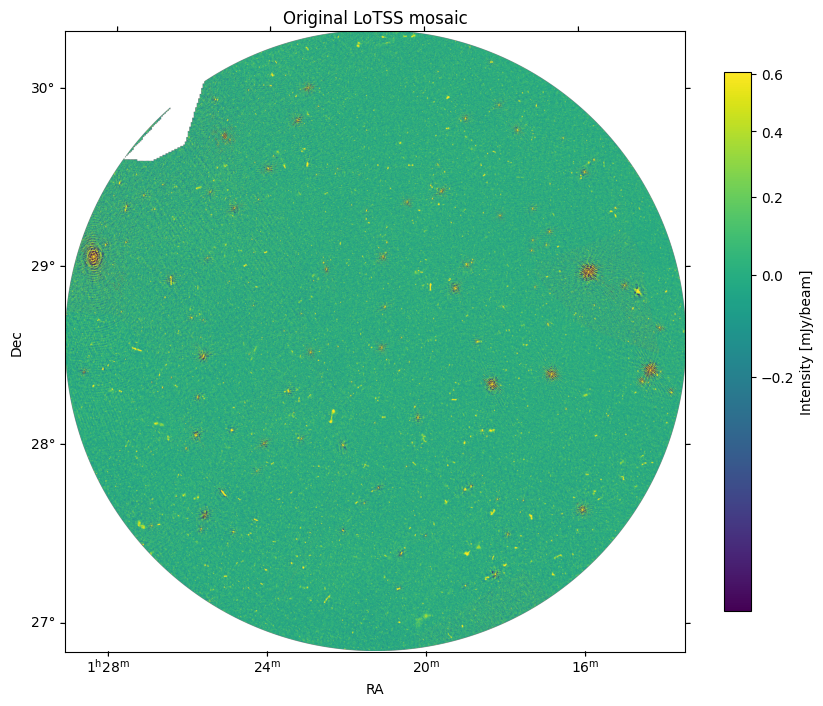

In [240]:
# Set up WCS plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=wcs)
# Normalise the image
norm = ImageNormalize(data*1000, interval=ZScaleInterval(), stretch=SqrtStretch())
im = ax.imshow(data*1000, origin='lower', norm=norm)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_title("Original LoTSS mosaic")
plt.colorbar(im, ax=ax, pad=0.05, shrink=0.7, aspect=20, label='Intensity [mJy/beam]')
plt.savefig("LoTSS_mosaic_ra_dec.png", dpi=300)
plt.show()

In [241]:
# Read catalogues that contain PyBDSF information

# Source catalogue (SRL)
srl_table = Table.read('/workspace/source_catalogue.fits')
srl_df = srl_table.to_pandas()
# Gaussian catalogue (GAUS)
gaus_table = Table.read('/workspace/gaussian_catalogue.fits')
gaus_df = gaus_table.to_pandas()

In [242]:
print("Columns in the source catalogue:", srl_df.columns.values)

Columns in the source catalogue: ['Source_id' 'Isl_id' 'RA' 'E_RA' 'DEC' 'E_DEC' 'Total_flux'
 'E_Total_flux' 'Peak_flux' 'E_Peak_flux' 'RA_max' 'E_RA_max' 'DEC_max'
 'E_DEC_max' 'Maj' 'E_Maj' 'Min' 'E_Min' 'PA' 'E_PA' 'Maj_img_plane'
 'E_Maj_img_plane' 'Min_img_plane' 'E_Min_img_plane' 'PA_img_plane'
 'E_PA_img_plane' 'DC_Maj' 'E_DC_Maj' 'DC_Min' 'E_DC_Min' 'DC_PA'
 'E_DC_PA' 'DC_Maj_img_plane' 'E_DC_Maj_img_plane' 'DC_Min_img_plane'
 'E_DC_Min_img_plane' 'DC_PA_img_plane' 'E_DC_PA_img_plane'
 'Isl_Total_flux' 'E_Isl_Total_flux' 'Isl_rms' 'Isl_mean' 'Resid_Isl_rms'
 'Resid_Isl_mean' 'S_Code']


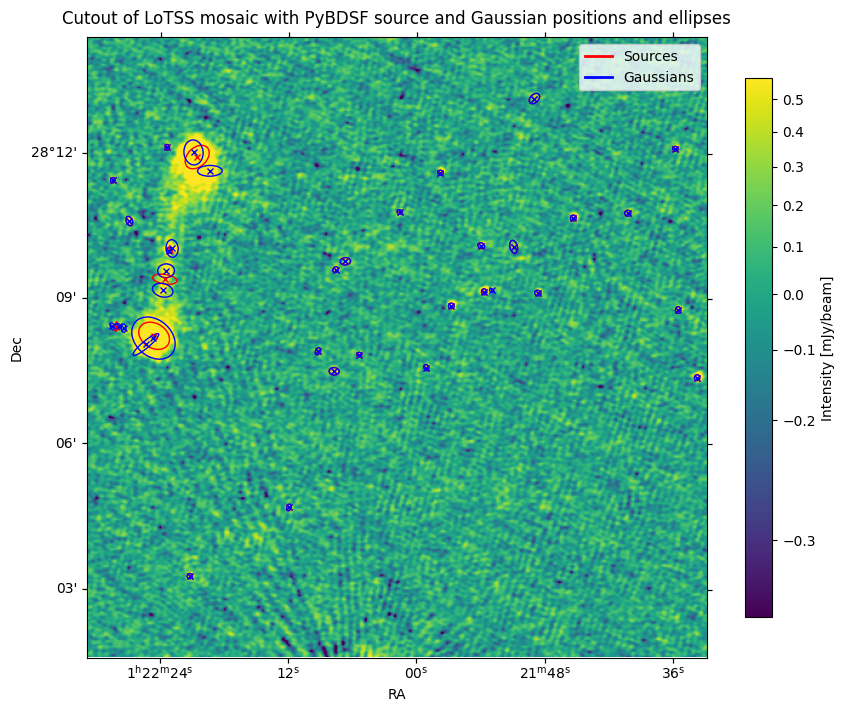

In [243]:
# Zoom in into a region and plot PyBDSF source and Gaussian positions and ellipses 

# --- CUTOUT SETUP ---
cutout_size = 512 #can define a wider area 

ny, nx = data.shape

# Can shift values (in pixels)
shift_x = -400   # positive = right, negative = left
shift_y = -1100  # positive = up, negative = down

# Calculate new central pixel with shift
yc = ny // 2 + shift_y
xc = nx // 2 + shift_x

half = cutout_size // 2
y1, y2 = yc - half, yc + half
x1, x2 = xc - half, xc + half

data_cut = data[y1:y2, x1:x2]
wcs_cut = wcs.slice((slice(y1, y2), slice(x1, x2)))

# --- RA/DEC BOUNDING BOX ---
cutout_corners = [(x1, y1), (x2, y2)]
cutout_world_coords = wcs.wcs_pix2world(cutout_corners, 0)
ra_min, dec_min = cutout_world_coords[0]
ra_max, dec_max = cutout_world_coords[1]

ra_low = min(ra_min, ra_max)
ra_high = max(ra_min, ra_max)
dec_low = min(dec_min, dec_max)
dec_high = max(dec_min, dec_max)

# --- FILTER CATALOGUESS ---
srl_cut = srl_df[
    (srl_df['RA'] >= ra_low) & (srl_df['RA'] <= ra_high) &
    (srl_df['DEC'] >= dec_low) & (srl_df['DEC'] <= dec_high)
]

gaus_cut = gaus_df[
    (gaus_df['RA'] >= ra_low) & (gaus_df['RA'] <= ra_high) &
    (gaus_df['DEC'] >= dec_low) & (gaus_df['DEC'] <= dec_high)
]

# --- PLOT ---
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': wcs_cut})

norm = ImageNormalize(data_cut*1000, interval=ZScaleInterval(), stretch=SqrtStretch())
im = ax.imshow(data_cut*1000, origin='lower', norm=norm)

ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_title("Cutout of LoTSS mosaic with PyBDSF source and Gaussian positions and ellipses", pad=10)

# Add colorbar 
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.05, shrink=0.7, aspect=20)
cbar.set_label('Intensity [mJy/beam]')


# --- OVERLAY SOURCE POSITIONS & ELLIPSES ---
for _, row in srl_cut.iterrows():
    ra, dec = row['RA'], row['DEC']
    maj, min_, pa = row['Maj']*3600, row['Min']*3600, row['PA']

    # Convert RA/DEC to pixel coordinates
    x, y = wcs_cut.wcs_world2pix(ra, dec, 0)

    # Convert FWHM from arcsec → pixels
    arcsec_per_pixel = np.abs(header['CDELT1']) * 3600  # degrees → arcsec
    
    width = maj / arcsec_per_pixel
    height = min_ / arcsec_per_pixel
    #print(f"Maj={maj}, RA={ra}, Dec={dec}, width={width:.2f}, height={height:.2f}, PA={pa}")
    # Draw the ellipse
    ell = Ellipse((x, y), width=width, height=height, angle=pa,
                  edgecolor='red', facecolor='none', lw=1)
    ax.add_patch(ell)
    # mark the center
    ax.plot(x, y, 'rx', markersize=4, label='Sources')

# --- OVERLAY GAUSSIANS ---

for _, row in gaus_cut.iterrows():
    ra, dec = row['RA'], row['DEC']
    maj, min_, pa = row['Maj']*3600, row['Min']*3600, row['PA']
    x, y = wcs_cut.wcs_world2pix(ra, dec, 0)

    width = maj / arcsec_per_pixel
    height = min_ / arcsec_per_pixel

    ell = Ellipse((x, y), width=width, height=height, angle=pa,
                 edgecolor='blue', facecolor='none', lw=1)
    ax.plot(x, y, 'x', color ='blue',  markersize=4, label='Gaussians')
    ax.add_patch(ell)


legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Sources'),
    Line2D([0], [0], color='blue', lw=2, label='Gaussians')
]

ax.legend(handles=legend_elements, loc='upper right')
plt.savefig("LoTS_zoomed_in_ra_dec_results.png", dpi=300)
plt.show()